In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import matplotlib.pyplot as plt 
import random   
import scipy
import scipy.stats

ErrorException: syntax: extra token "as" after end of expression

In [2]:
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

ErrorException: syntax: extra token "scipy" after end of expression

In [3]:

def BiC(dataframe,node):
    n=len(dataframe)
    sk=skew(dataframe.loc[:,node],axis=0,bias=True)
    kur=kurtosis(dataframe.loc[:,node],bias=True,axis=0,fisher=True)
    ncum=(pow(n-1,2))/((n-2)*(n-3))
    bic=(pow(sk,2) + 1)/(kur +3*ncum)
    return bic

ErrorException: syntax: extra token "BiC" after end of expression

In [4]:
def Boolean_file_import(topo_file_name):
    csv_file_name = topo_file_name[:-5] + "_finFlagFreq.csv"
    nodes_file_name = topo_file_name[:-5]  + "_nodes.txt"
    data = pd.read_csv(csv_file_name)

    new_columns = data['states'].str.split('_', expand=True)
    new_columns.columns = np.array(pd.read_csv(nodes_file_name, header=None).T)[0]
    new_columns = new_columns.astype(int)
    df = pd.concat([data, new_columns], axis=1)
    return df

ErrorException: syntax: extra token "Boolean_file_import" after end of expression

In [5]:

def average_finder(dataframe, Team1_Nodes, Team2_Nodes, Average_Team1, Average_Team2):
    dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
    dataframe.loc[:,Average_Team1] = dataframe.loc[:,Team1_Nodes].mean(axis = 1)
    dataframe.loc[:,Average_Team2] = dataframe.loc[:,Team2_Nodes].mean(axis = 1)
    dataframe.loc[:,'frequency'] = dataframe.loc[:,"Avg0"]*10000
    dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
    dataframe = dataframe.sort_values(by='Avg0', ascending=False)

    return dataframe




ErrorException: syntax: extra token "average_finder" after end of expression

In [6]:
def frequency_finder(dataframe):
    dataframe.loc[:,'frequency'] = dataframe.loc[:,"Avg0"]*10000
    dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
    dataframe = dataframe.sort_values(by='Avg0', ascending=False)
    return dataframe

ErrorException: syntax: extra token "frequency_finder" after end of expression

In [7]:
def f1_score_new_any_dimension_threshold_toggle_switch_optimized_boolean(df, Team_0_state,Team_1_state ):
    single_pos = df[((df[Team_0_state] == 1) & (df[Team_1_state] == 0)) | ((df[Team_0_state] == 0) & (df[Team_1_state] == 1))]
    return single_pos.loc[:,'Avg0'].sum()


ErrorException: syntax: extra token "f1_score_new_any_dimension_threshold_toggle_switch_optimized_boolean" after end of expression

In [8]:
def duplicate_rows(df):
    duplicated_rows = []
    for index, row in df.iterrows():
        freq = row['frequency']
        duplicated_rows.append(pd.concat([row] * freq, axis=1).T)
    return pd.concat(duplicated_rows, ignore_index=True)

ErrorException: syntax: extra token "duplicate_rows" after end of expression

In [9]:
import pandas as pd

def duplicate_rows1(df):
    # Use repeat to create a new index for repeated rows
    new_index = df.index.repeat(df['frequency'])
    
    # Use loc to select and duplicate rows according to the new index
    duplicated_df = df.loc[new_index].reset_index(drop=True)
    
    # Drop the 'frequency' column if not needed in the final DataFrame
    duplicated_df = duplicated_df.drop(columns=['frequency'])
    
    return duplicated_df


ErrorException: syntax: extra token "as" after end of expression

In [10]:
def BiC_CC_F1_team_strength_Boolean(folder, TS1 , TS2 , filee ,density,  n_files ,
                            TS1_nodes, TS2_nodes , Self_act_status ,Impurity,start = 0,end=100):
    print(folder)

    global melt_table_complete

    Corr_list = []
    F1_list = []
    TS_list_core = []
    indices = []
    team_size = []
    counts_of_self_act = []
    cols = ['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size',
                                 'Number_of_Self_Activations','Self Activation Status']

    temp_table_complete=pd.DataFrame([[0]*len(cols)]*n_files)
    temp_table_complete.columns = cols
    
    temp_table_complete.loc[:,'Core Density']=density
    temp_table_complete.loc[:,'Self Activation Status']=Self_act_status
    temp_table_complete.loc[:,'Impurity']=Impurity
    temp_table_complete.loc[:,'Team Size']=len(TS1_nodes)



    for i in range(start, end):
        print(i)


        # soln_file = folder+ '/'+ filee  + str(i) + '_solution.dat'
        topo_file =  folder+ '/'+filee+  str(i) +'.topo'
        # Density_20_Network_10N_core

        dataframe = Boolean_file_import(topo_file)

        dataframe = average_finder(dataframe, TS1_nodes, TS2_nodes, TS1,TS2)

        F1_list.append( f1_score_new_any_dimension_threshold_toggle_switch_optimized_boolean(
            dataframe, TS1,TS2 
            ))

        dataframe = duplicate_rows1(dataframe)
        Corr_list.append(stats.spearmanr(dataframe.loc[:,TS1], dataframe.loc[:,TS2])[0])

        
        indices.append(str(density)+ '_'+Self_act_status+'_'+'Network'+ '_' + str(i))
        # topo_dataframe = pd.read_csv(topo_file, sep = '\t')
        # influ=influence(pd.read_csv(topo_file, sep = '\t'), 1,10)
        # Core_A, Core_B =  TS1_nodes, TS2_nodes
        # TS_list_core.append(Team_Strength_finder(influ, Core_A, Core_B))
        team_size.append(len(TS1_nodes))
        # counts_of_self_act.append(self_act_counted(topo_dataframe))
        

    print(Corr_list)
    temp_table_complete.loc[:,'CC AB']= Corr_list
    temp_table_complete.loc[:,'F1']=F1_list

    # temp_table_complete.loc[:,'Team_Strength']=TS_list_core
    temp_table_complete.loc[:,'index']=indices
    # temp_table_complete.loc[:,'Team Size']= team_size
    # temp_table_complete.loc[:,'Number_of_Self_Activations']= counts_of_self_act




    melt_table_complete=pd.concat([melt_table_complete, temp_table_complete])


    
    return melt_table_complete





ErrorException: syntax: extra token "BiC_CC_F1_team_strength_Boolean" after end of expression

In [11]:
melt_table_complete=pd.DataFrame(columns=['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size','Number_of_Self_Activations','Self Activation Status'])
melt_table_complete


ErrorException: syntax: invalid character literal

Figure1

In [25]:
pwd

'/media/user/DataVolume/Sai_Shyam/transfer_from_desk_new_project/New_Project_Prof_Jolly/Work_2024/May 18/All_team_size_100_Density'

In [21]:
BiC_CC_F1_team_strength_Boolean('all_80', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Density_80_Network_10N_core' , 80,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation", 0,0)


BiC_CC_F1_team_strength_Boolean('all_80', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_80_Avg_Density_20_impurity_Network_10N_core' , 80,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",20,0)

BiC_CC_F1_team_strength_Boolean('all_80', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_80_Avg_Density_40_impurity_Network_10N_core' , 80,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",40,0)

BiC_CC_F1_team_strength_Boolean('all_80', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_80_Avg_Density_60_impurity_Network_10N_core' , 80,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",60,0)


BiC_CC_F1_team_strength_Boolean('all_80', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_80_Avg_Density_80_impurity_Network_10N_core' , 80,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",80,0)


BiC_CC_F1_team_strength_Boolean('all_80', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_80_Avg_Density_100_impurity_Network_10N_core' , 80,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",100,0)





all_80
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[-0.9999917433675488, -1.0, -0.9999999513913169, -0.9999999607700496, -1.0, -0.9999937537467204, -0.9999999999999998, -0.9999999999999998, -1.0, -0.9999999513913362, -0.9999975034763282, -0.9999985042703118, -0.9999999724014855, -0.9999997359005632, -0.9999988416529884, -1.0, -1.0, -0.9999996687724084, -0.9999999999999998, -0.999999686994558, -0.9999994282400183, -0.9999984545895139, -0.9999999999999998, -0.9999996116608463, -0.999999988346399, -1.0, -0.9999999145663558, -0.9999993698375679, -0.9999361987423669, -0.9999999999999998, -1.0, -1.0, -0.9999969718311845, -0.9999999513895415, -1.0, -0.999995543091196, -0.9999915370810668, -1.0, -0.9999999999999998, -0.9999999999999998, -0.9999999999999998, -0.999987254500531, -0.9999999688681567, -0.999872347668504, -0.9999311302683823, -1.0, -0.9999999999999998, -0.9999998737752761, -0.9999999999999998, -0.9999998416067329, -1.0, -1.0, -1.0, -0.9999996520706225, -0.9999999999999998,

/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[-0.9549417070443335, -0.9622482585837928, -1.0, -0.7438244601230241, -0.9413299501782144, -0.8294242001556004, -0.9561417070415389, -0.9989425510525485, -0.9260750328479126, -0.9253624407674813, -0.9996961800737942, -0.9999999999999998, -0.9792429849518236, -0.9312421835895899, -1.0, -0.9369390832536836, -0.9285736166213744, -0.8946913515079553, -0.9421082970952414, -1.0, -0.9999576743787317, -1.0, -0.9100058920018744, -0.9438104841419591, -0.9740258216890557, -0.8712572075501782, -0.9999652479463326, -0.9715101904680052, -0.9362989211300554, -0.9999994793769532, -0.9102964350960387, -0.9853876992121628, -1.0, -0.9271932055459357, -0.9863907804347297, -0.9078753091229599, -0.9983038954967305, -0.9999783199211888, -1.0, -0.8479051792989916, -0.9432865249797561, -0.9994897308893447, -0.9175700097533355, -0.999994215749161, -0.9999999999999998, -1.0, -0.9540069116521415, -0.9999075728876866, -0.9655700022571881, -0.9311

/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

[-0.23087214960675106, -0.4077388884032509, -0.35160977326286763, -0.8912274434721429, -0.5323438802509842, -0.9654357266180419, -0.39017238250951536, 0.14806886015534979, -0.5290062739944068, -0.3807832543921515, -0.48453641517365825, 0.42821697035153317, -0.5117236004337249, -0.45359554076071895, -0.3600048013627771, -0.20903985093422964, -0.7037843214322667, 0.9999999999999998, -0.7517335825865876, -0.6846553632636563, -0.02138344123066921, -0.4092850169883192, -0.7218059598036823, 0.0694916255699706, 0.42270844231856297, -0.4659117346908433, -0.011026010038654447, -0.6232199763315138, -0.7588171222632961, -0.6912128577176546, -0.9166190720284482, -0.7782976516020604, -0.9183451694193084, -0.5024305849146146, -0.9986476244274799, -0.681123796448687, -0.307330670982829, -0.7026935415564297, -0.9688016473409221, -0.9855843442382397, 0.2327684725345203, -0.9998995325065435, -0.21359834756535565, 0.0016858494895686522, 0.4820618804167622, -0.8944245743586724, -0.1313899166063742, -0.883

/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

92
93
94
95
96
97
98
99
[-0.4342847377703474, -0.903868764612778, -0.12702747520731106, 0.3008692694452169, -0.6552797970296119, -0.9623067239781911, 0.42289456415667087, -0.9981995164695717, 0.01024008974454138, -0.9219558808196425, 0.01838870684355755, 0.894427151709539, 0.674261767809815, -0.10374206415123306, 0.6969146344677343, 0.09617148515369749, 0.41900594381556133, 0.10428025516179913, 0.32256901588952525, 0.781614671140227, 0.9895895603974585, 0.32206401024178316, 0.28715615085932733, -0.7852700819365838, -0.5404330637843401, -0.012443430464504662, 0.26464511656581197, 0.6510380861015455, -0.9661097008581279, -0.1020237869463324, 0.6727923748012833, 0.21210080283795535, -0.9682122524323277, 0.14509609459503747, -0.03674260144782579, -0.9981998794736698, 0.06592451132650663, 0.9596276985156966, 0.37149571165692596, 0.28604358507612804, 0.9994723115902138, 0.8129085367122414, -0.3139542455320017, 0.21270500684663415, 0.05607654239957457, -0.7566329625498858, 0.3877117652316465,

/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.31886499517375166, 0.9780354982987902, 0.5995203358083071, 0.6763884966176439, 0.9921888555748608, 0.6846190355919662, 0.8063395472283079, 1.0, 0.7670173021991074, 0.9227276591101885, 0.7175007253658032, 0.6726909040699226, 0.9322567718753245, 0.9181641420494301, 0.9999999999999998, 0.7155341231323864, 0.9199425227656551, 0.6512159834011685, 0.7278249828939757, 1.0, 0.8049748329022794, -0.864478658235454, 0.7832907763144832, 0.7196018514381672, 0.7156053426831399, 0.3848207404356512, 0.5081941942279479, 0.40316290290166473, 0.9999999999999998, 0.8944254902245202, -0.9086608095924265, 0.9172358426237397, 0.244974803417004, 0.2843470527346969, 0.8739993021542434, 0.8028591090934862, 0.8252731765306894, 0.46498814203735617, 0.5057864056734184, -0.2191688082001939, 0.8095456891526952, 0.33235318519248763, 0.4702024460651768, 0.330038174817893, 0.42764090775811625, 0.6227985697165653, 0.8122665054815725, 0.49957256936428407, 0.2783637909284

/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.9980507733514661, 1.0, 0.9999999999999999, 0.8732143258295543, 0.9964148555667747, 0.8713453116432538, 0.9952846903280397, 0.8889980122542953, 1.0, 0.9887865036605092, 0.9897904273040862, 0.9999999999999998, 0.9836429070010492, 0.9995995618349035, 0.9514238042351386, 0.9899713104609853, 0.9878444562408286, 0.9001077883799753, 0.9216002994845257, 0.9995056622935695, 0.9860415674439003, 0.9979843993703338, 1.0, 0.8950045006151321, 0.985232240497319, 0.9935877828021233, 0.9200948291854714, 1.0, 0.9210156914114742, 0.8743114387375146, 0.9975670846419756, 0.9857831408380697, 0.8918090776887031, 0.9667094958395367, 0.9965972509537547, 0.9999090399472348, 0.8619107332419296, 0.9990267846690317, -0.985431610908192, 0.8841951750927566, 0.8699913534601843, 0.939576104181149, 0.9934679504009173, 1.0, 1.0, 1.0, 0.9003231499304795, 0.9433850790130849, 0.9994476389260305, 0.9890649418465426, 0.9927974194185851, 0.8429185389347689, 0.9999999999

/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_1357412/1394186667.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

index Type Core Density     CC AB        F1  \
0    80_With Self Activation_Network_0    0           80 -0.999992  0.983737   
1    80_With Self Activation_Network_1    0           80 -1.000000  1.000000   
2    80_With Self Activation_Network_2    0           80 -1.000000  0.997013   
3    80_With Self Activation_Network_3    0           80 -1.000000  0.997160   
4    80_With Self Activation_Network_4    0           80 -1.000000  1.000000   
..                                 ...  ...          ...       ...       ...   
95  80_With Self Activation_Network_95    0           80  0.991174  0.000000   
96  80_With Self Activation_Network_96    0           80  0.982658  0.000000   
97  80_With Self Activation_Network_97    0           80  0.997825  0.000000   
98  80_With Self Activation_Network_98    0           80  0.998951  0.000000   
99  80_With Self Activation_Network_99    0           80  0.999112  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         5                          0   With Self Activation   
1              0         5                          0   With Self Activation   
2              0         5                          0   With Self Activation   
3              0         5                          0   With Self Activation   
4              0         5                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         5                          0   With Self Activation   
96             0         5                          0   With Self Activation   
97             0         5                          0   With Self Activation   
98             0         5                          0   With Self Activation   
99             0         5                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[600 rows x 10 columns]

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.scatterplot(
        y='CC AB',
        x='Team Size',
        data=melt_table_complete,

    color='Red')

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Team Size', fontsize=14, fontweight='bold')
    plt.ylabel('CC AB', fontsize=14, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(range(0,20,2),fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-1.1, 0)

# Perform ANOVA across average indegree per code node
# result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Team Size'] == avg_indegree] for avg_indegree in melt_table_complete['Team Size'].unique()])

# # Display the p-value from ANOVA
# if result.pvalue < 10**-4:
#     plt.text(0.8, 0.8, f'ANOVA \np-value: < 10e-4', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
# else:
#     plt.text(0.8, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# plt.savefig('F1_Score_vs_Percentage_Core_Density.png')
# Show the plot
plt.show()


In [25]:
# melt_table_complete.to_csv("Density_80_Vary_impurity_summarised.csv")

In [24]:
melt_table_complete = pd.read_csv("Density_80_Vary_impurity_summarised.csv")
melt_table_complete 

Unnamed: 0                               index  Type  Core Density  \
0             0   80_With Self Activation_Network_0     0            80   
1             1   80_With Self Activation_Network_1     0            80   
2             2   80_With Self Activation_Network_2     0            80   
3             3   80_With Self Activation_Network_3     0            80   
4             4   80_With Self Activation_Network_4     0            80   
..          ...                                 ...   ...           ...   
595          95  80_With Self Activation_Network_95     0            80   
596          96  80_With Self Activation_Network_96     0            80   
597          97  80_With Self Activation_Network_97     0            80   
598          98  80_With Self Activation_Network_98     0            80   
599          99  80_With Self Activation_Network_99     0            80   

        CC AB        F1  Team_Strength  Team Size  Number_of_Self_Activations  \
0   -0.999991  0.983737              0          5                           0   
1   -1.000000  1.000000              0          5                           0   
2   -1.000000  0.997013              0          5                           0   
3   -1.000000  0.997160              0          5                           0   
4   -1.000000  1.000000              0          5                           0   
..        ...       ...            ...        ...                         ...   
595  0.984698  0.000000              0          5                           0   
596  0.973870  0.000000              0          5                           0   
597  0.994450  0.000000              0          5                           0   
598  0.997986  0.000000              0          5                           0   
599  0.996212  0.000000              0          5                           0   

    Self Activation Status  Impurity  
0     With Self Activation       0.0  
1     With Self Activation       0.0  
2     With Self Activation       0.0  
3     With Self Activation       0.0  
4     With Self Activation       0.0  
..                     ...       ...  
595   With Self Activation     100.0  
596   With Self Activation     100.0  
597   With Self Activation     100.0  
598   With Self Activation     100.0  
599   With Self Activation     100.0  

[600 rows x 11 columns]

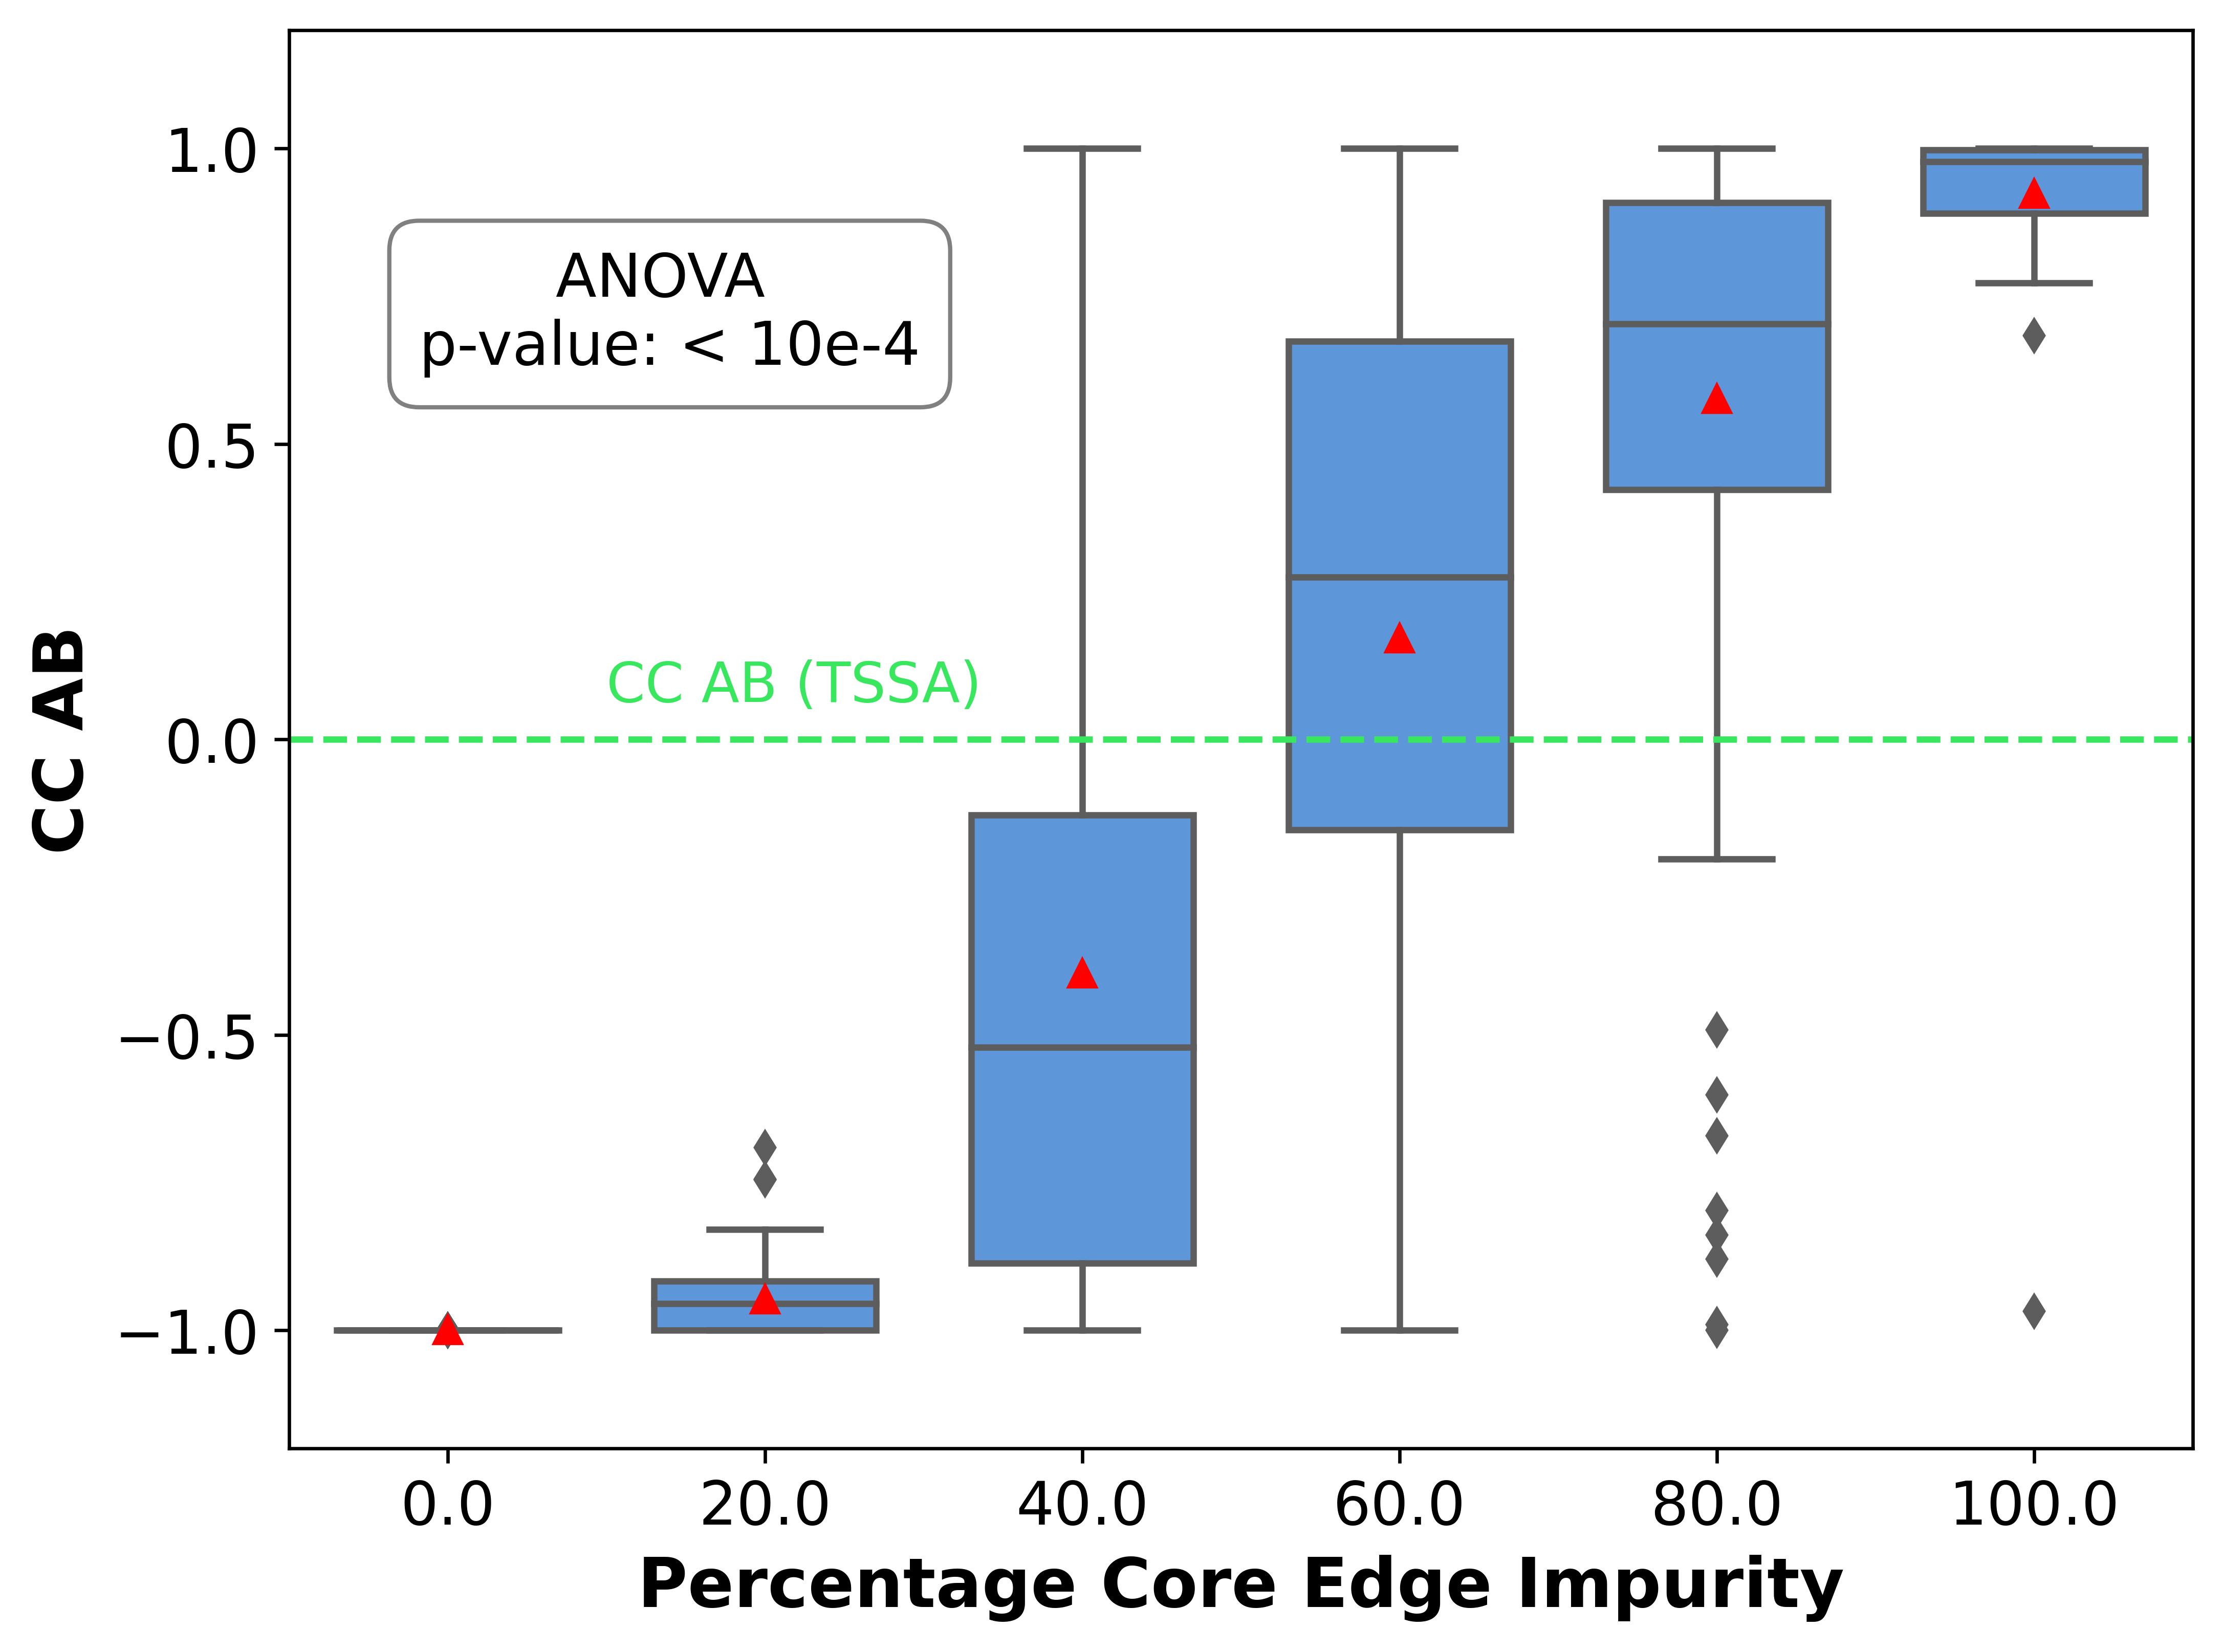

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=600)
plt.ylim(0, -1.04)

# Plot the boxplot
sorted_data = melt_table_complete.sort_values(by='Impurity', ascending=False)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='CC AB',
        x='Impurity',
        data=sorted_data,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=16, fontweight='bold')
    plt.ylabel('CC AB', fontsize=16, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-1.2, 1.2)
    plt.axhline(y=0, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(0.5, 0.09, 'CC AB (TSSA)', color='#39e75f', ha='left', va='center', fontsize=13)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['CC AB'][melt_table_complete['Impurity'] == avg_indegree] 
                          for avg_indegree in melt_table_complete['Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.2, 0.8, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.2, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.savefig('all_plots/CC_AB_vs_Percentage_Core_Impurity.png' , dpi =1000)
# Show the plot
plt.show()


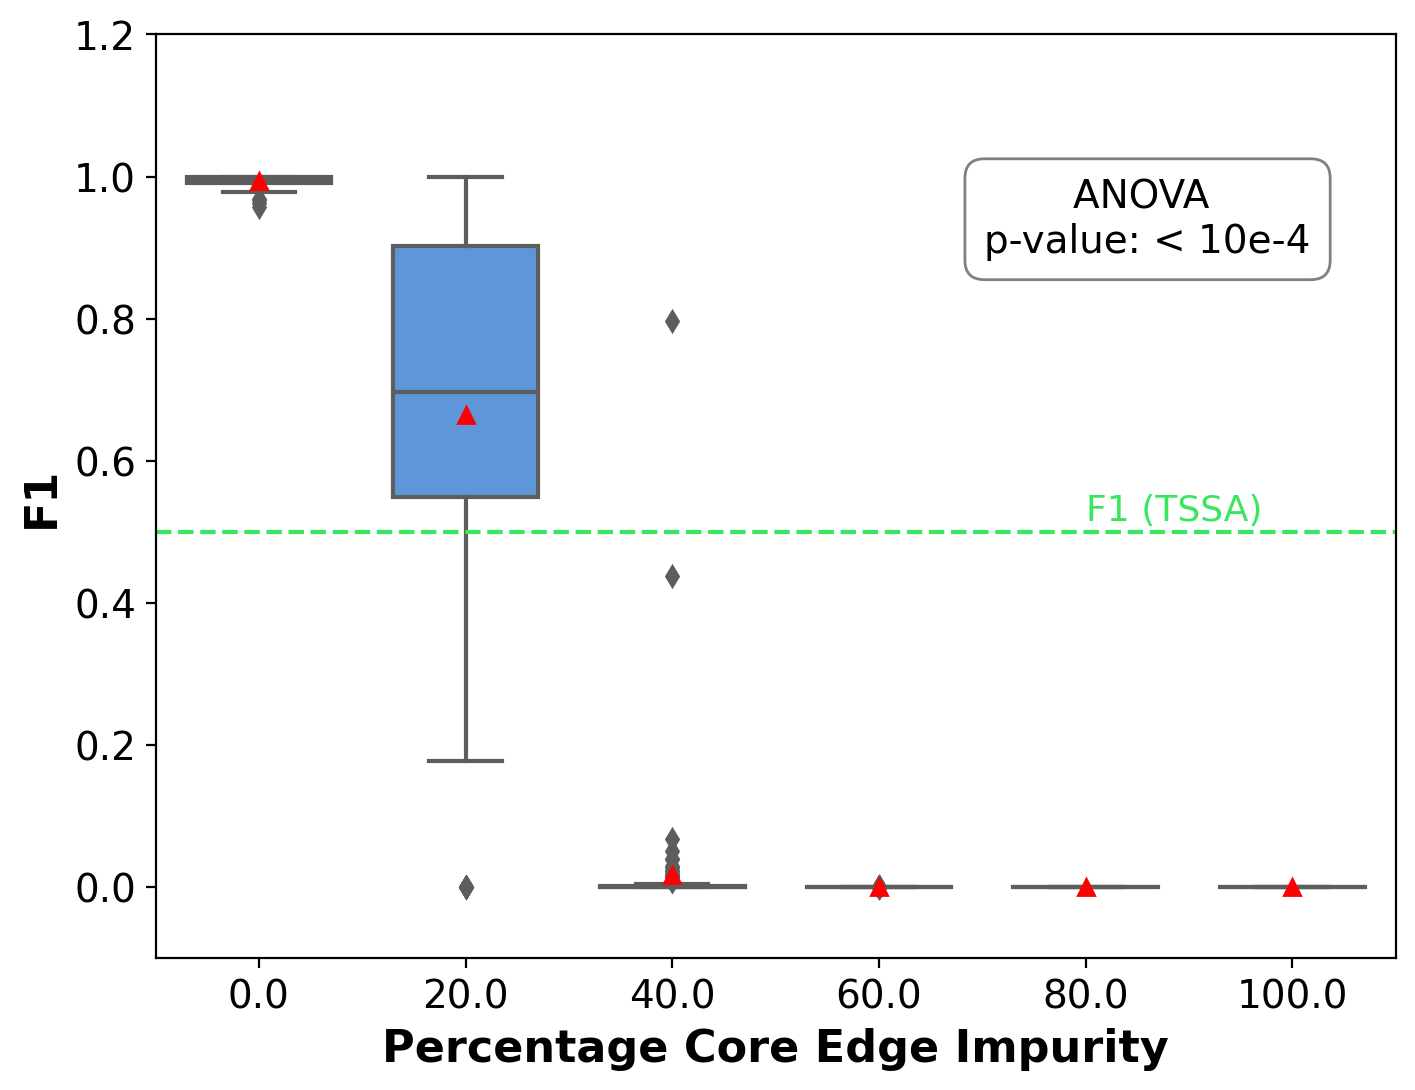

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
sorted_data = melt_table_complete.sort_values(by='Impurity', ascending=False)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1',
        x='Impurity',
        data=sorted_data,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=16, fontweight='bold')
    plt.ylabel('F1', fontsize=16, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.2)
    plt.axhline(y=0.4997, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(4, 0.53, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=13)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Impurity'] == avg_indegree] 
                          for avg_indegree in melt_table_complete['Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.8, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.savefig('all_plots/F1_Score_vs_Percentage_Core_Impurity.png', dpi =1000)


# Show the plot
plt.show()


In [16]:
melt_table_complete_RACIPE = pd.read_csv('Varying_Density_and_Impurity_results_except1.csv')
melt_table_complete_RACIPE = melt_table_complete_RACIPE[melt_table_complete_RACIPE.loc[:,'Core_Density'] =='100% Density']

melt_table_complete_RACIPE = melt_table_complete_RACIPE.replace({
    '100% Impurity': 100,
    '80% Impurity': 80,
    '60% Impurity': 60,
    '40% Impurity': 40,
    '20% Impurity': 20,
    '0% Impurity': 0,

})

melt_table_complete_RACIPE = melt_table_complete_RACIPE.rename(columns={
                                      'F1': 'F1 (Average)',
                                      'F1_Individual_Nodes_Considered': 'F1 (Strict)',
                                      'Team_Strength':'Team Strength',
                                      'Percentage_Impurity':'Impurity'})
melt_table_complete_RACIPE

Unnamed: 0                                    index             Type  \
1900           0  0Indegree100% Density_0 Nodes_0 Edges_0  Lowered Density   
1901           1  0Indegree100% Density_0 Nodes_0 Edges_1  Lowered Density   
1902           2  0Indegree100% Density_0 Nodes_0 Edges_2  Lowered Density   
1903           3  0Indegree100% Density_0 Nodes_0 Edges_3  Lowered Density   
1904           4  0Indegree100% Density_0 Nodes_0 Edges_4  Lowered Density   
...          ...                                      ...              ...   
2805           5  0Indegree100% Density_0 Nodes_0 Edges_5  Lowered Density   
2806           6  0Indegree100% Density_0 Nodes_0 Edges_6  Lowered Density   
2807           7  0Indegree100% Density_0 Nodes_0 Edges_7  Lowered Density   
2808           8  0Indegree100% Density_0 Nodes_0 Edges_8  Lowered Density   
2809           9  0Indegree100% Density_0 Nodes_0 Edges_9  Lowered Density   

      Core_Density Peripheral_Nodes  Peripheral_Edges     BiC A     BiC B  \
1900  100% Density          0 Nodes                 0  0.618681  0.622854   
1901  100% Density          0 Nodes                 0  0.624518  0.616449   
1902  100% Density          0 Nodes                 0  0.620111  0.625756   
1903  100% Density          0 Nodes                 0  0.615781  0.622782   
1904  100% Density          0 Nodes                 0  0.622786  0.628664   
...            ...              ...               ...       ...       ...   
2805  100% Density          0 Nodes                 0  0.802427  0.802140   
2806  100% Density          0 Nodes                 0  0.797534  0.797724   
2807  100% Density          0 Nodes                 0  0.797441  0.797453   
2808  100% Density          0 Nodes                 0  0.800276  0.800345   
2809  100% Density          0 Nodes                 0  0.799757  0.799648   

         CC AB  F1 (Average)  F1 (Strict)  Team Strength  Team Size  \
1900  0.882171      0.000333     0.000000            0.0          5   
1901  0.884495      0.000218     0.000000            0.0          5   
1902  0.888686      0.000364     0.000000            0.0          5   
1903  0.887168      0.000299     0.000000            0.0          5   
1904  0.885719      0.000217     0.000000            0.0          5   
...        ...           ...          ...            ...        ...   
2805 -0.867504      0.808440     0.788350            1.0          5   
2806 -0.868696      0.803762     0.784873            1.0          5   
2807 -0.867470      0.803665     0.784859            1.0          5   
2808 -0.867413      0.806614     0.786772            1.0          5   
2809 -0.867963      0.806029     0.786926            1.0          5   

      Number_of_Self_Activations  indegree Self Activation Status  \
1900                           0         0   With Self Activation   
1901                           0         0   With Self Activation   
1902                           0         0   With Self Activation   
1903                           0         0   With Self Activation   
1904                           0         0   With Self Activation   
...                          ...       ...                    ...   
2805                           0         0   With Self Activation   
2806                           0         0   With Self Activation   
2807                           0         0   With Self Activation   
2808                           0         0   With Self Activation   
2809                           0         0   With Self Activation   

      Percentage Impurity  Impurity  
1900                    0       100  
1901                    0       100  
1902                    0       100  
1903                    0       100  
1904                    0       100  
...                   ...       ...  
2805                    0         0  
2806                    0         0  
2807                    0         0  
2808                    0         0  
2809                    0         0  

[510 

In [ ]:
melt_table_complete_RACIPE

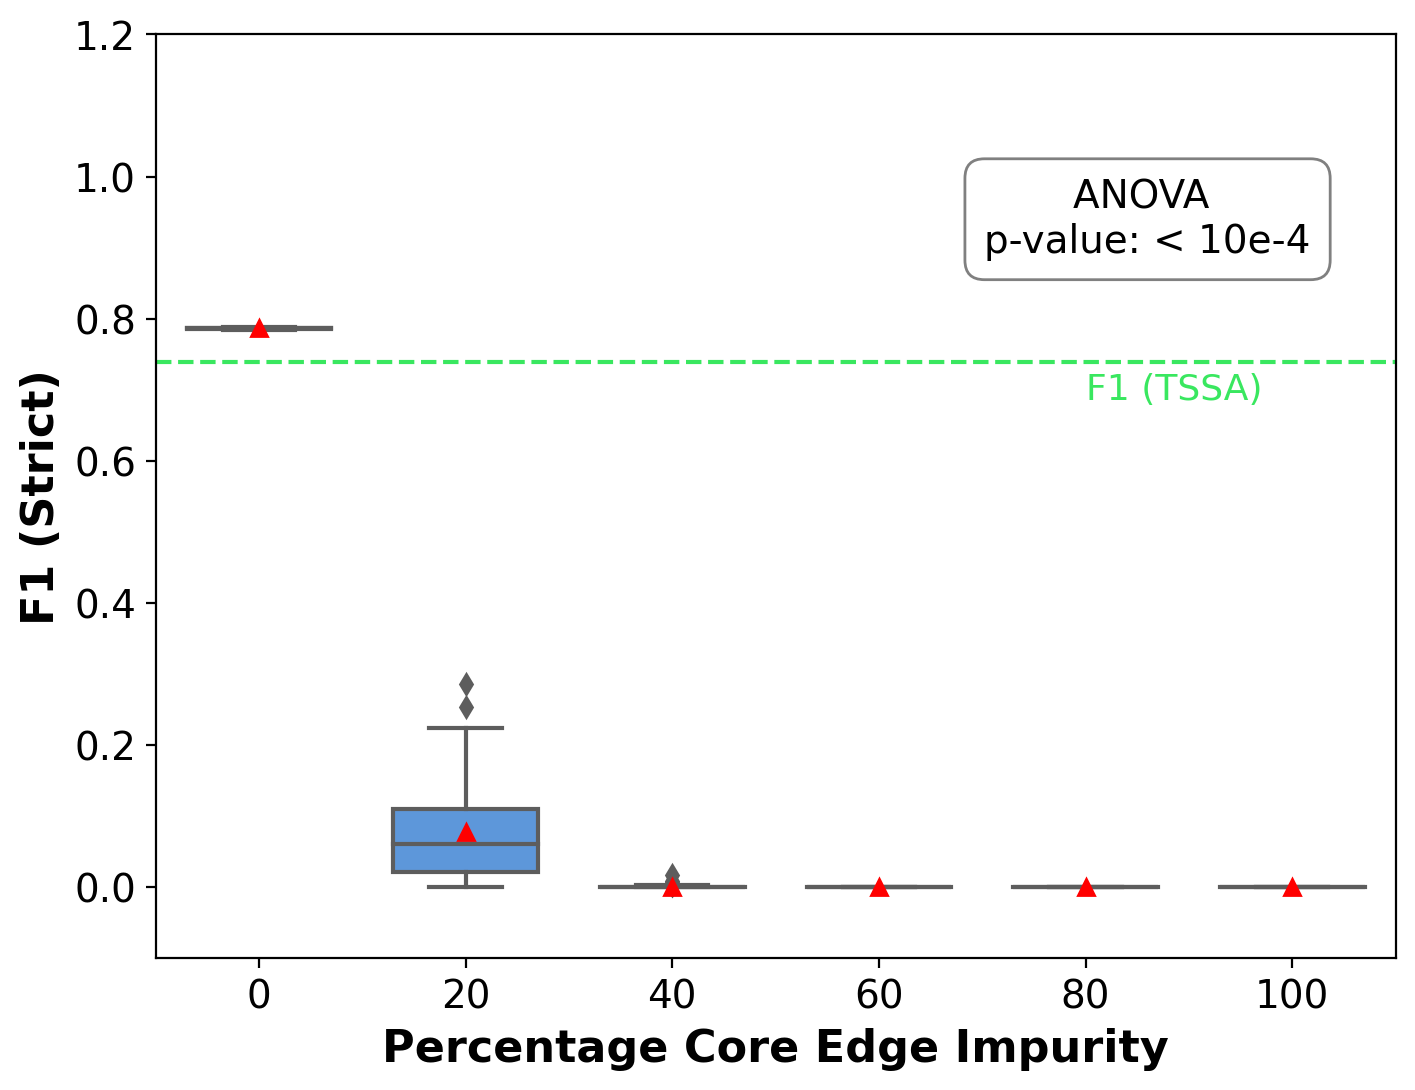

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
sorted_data = melt_table_complete_RACIPE.sort_values(by='Impurity', ascending=False)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1 (Strict)',
        x='Impurity',
        data=sorted_data,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=16, fontweight='bold')
    plt.ylabel('F1 (Strict)', fontsize=16, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.2)
    plt.axhline(y=0.739, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(4, 0.7, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=13)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete_RACIPE['F1 (Strict)'][melt_table_complete_RACIPE['Impurity'] == avg_indegree] 
                          for avg_indegree in melt_table_complete_RACIPE['Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.8, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.savefig('all_plots/F1_Score_vs_Percentage_Core_Impurity_RACIPE.png', dpi =1000)


# Show the plot
plt.show()


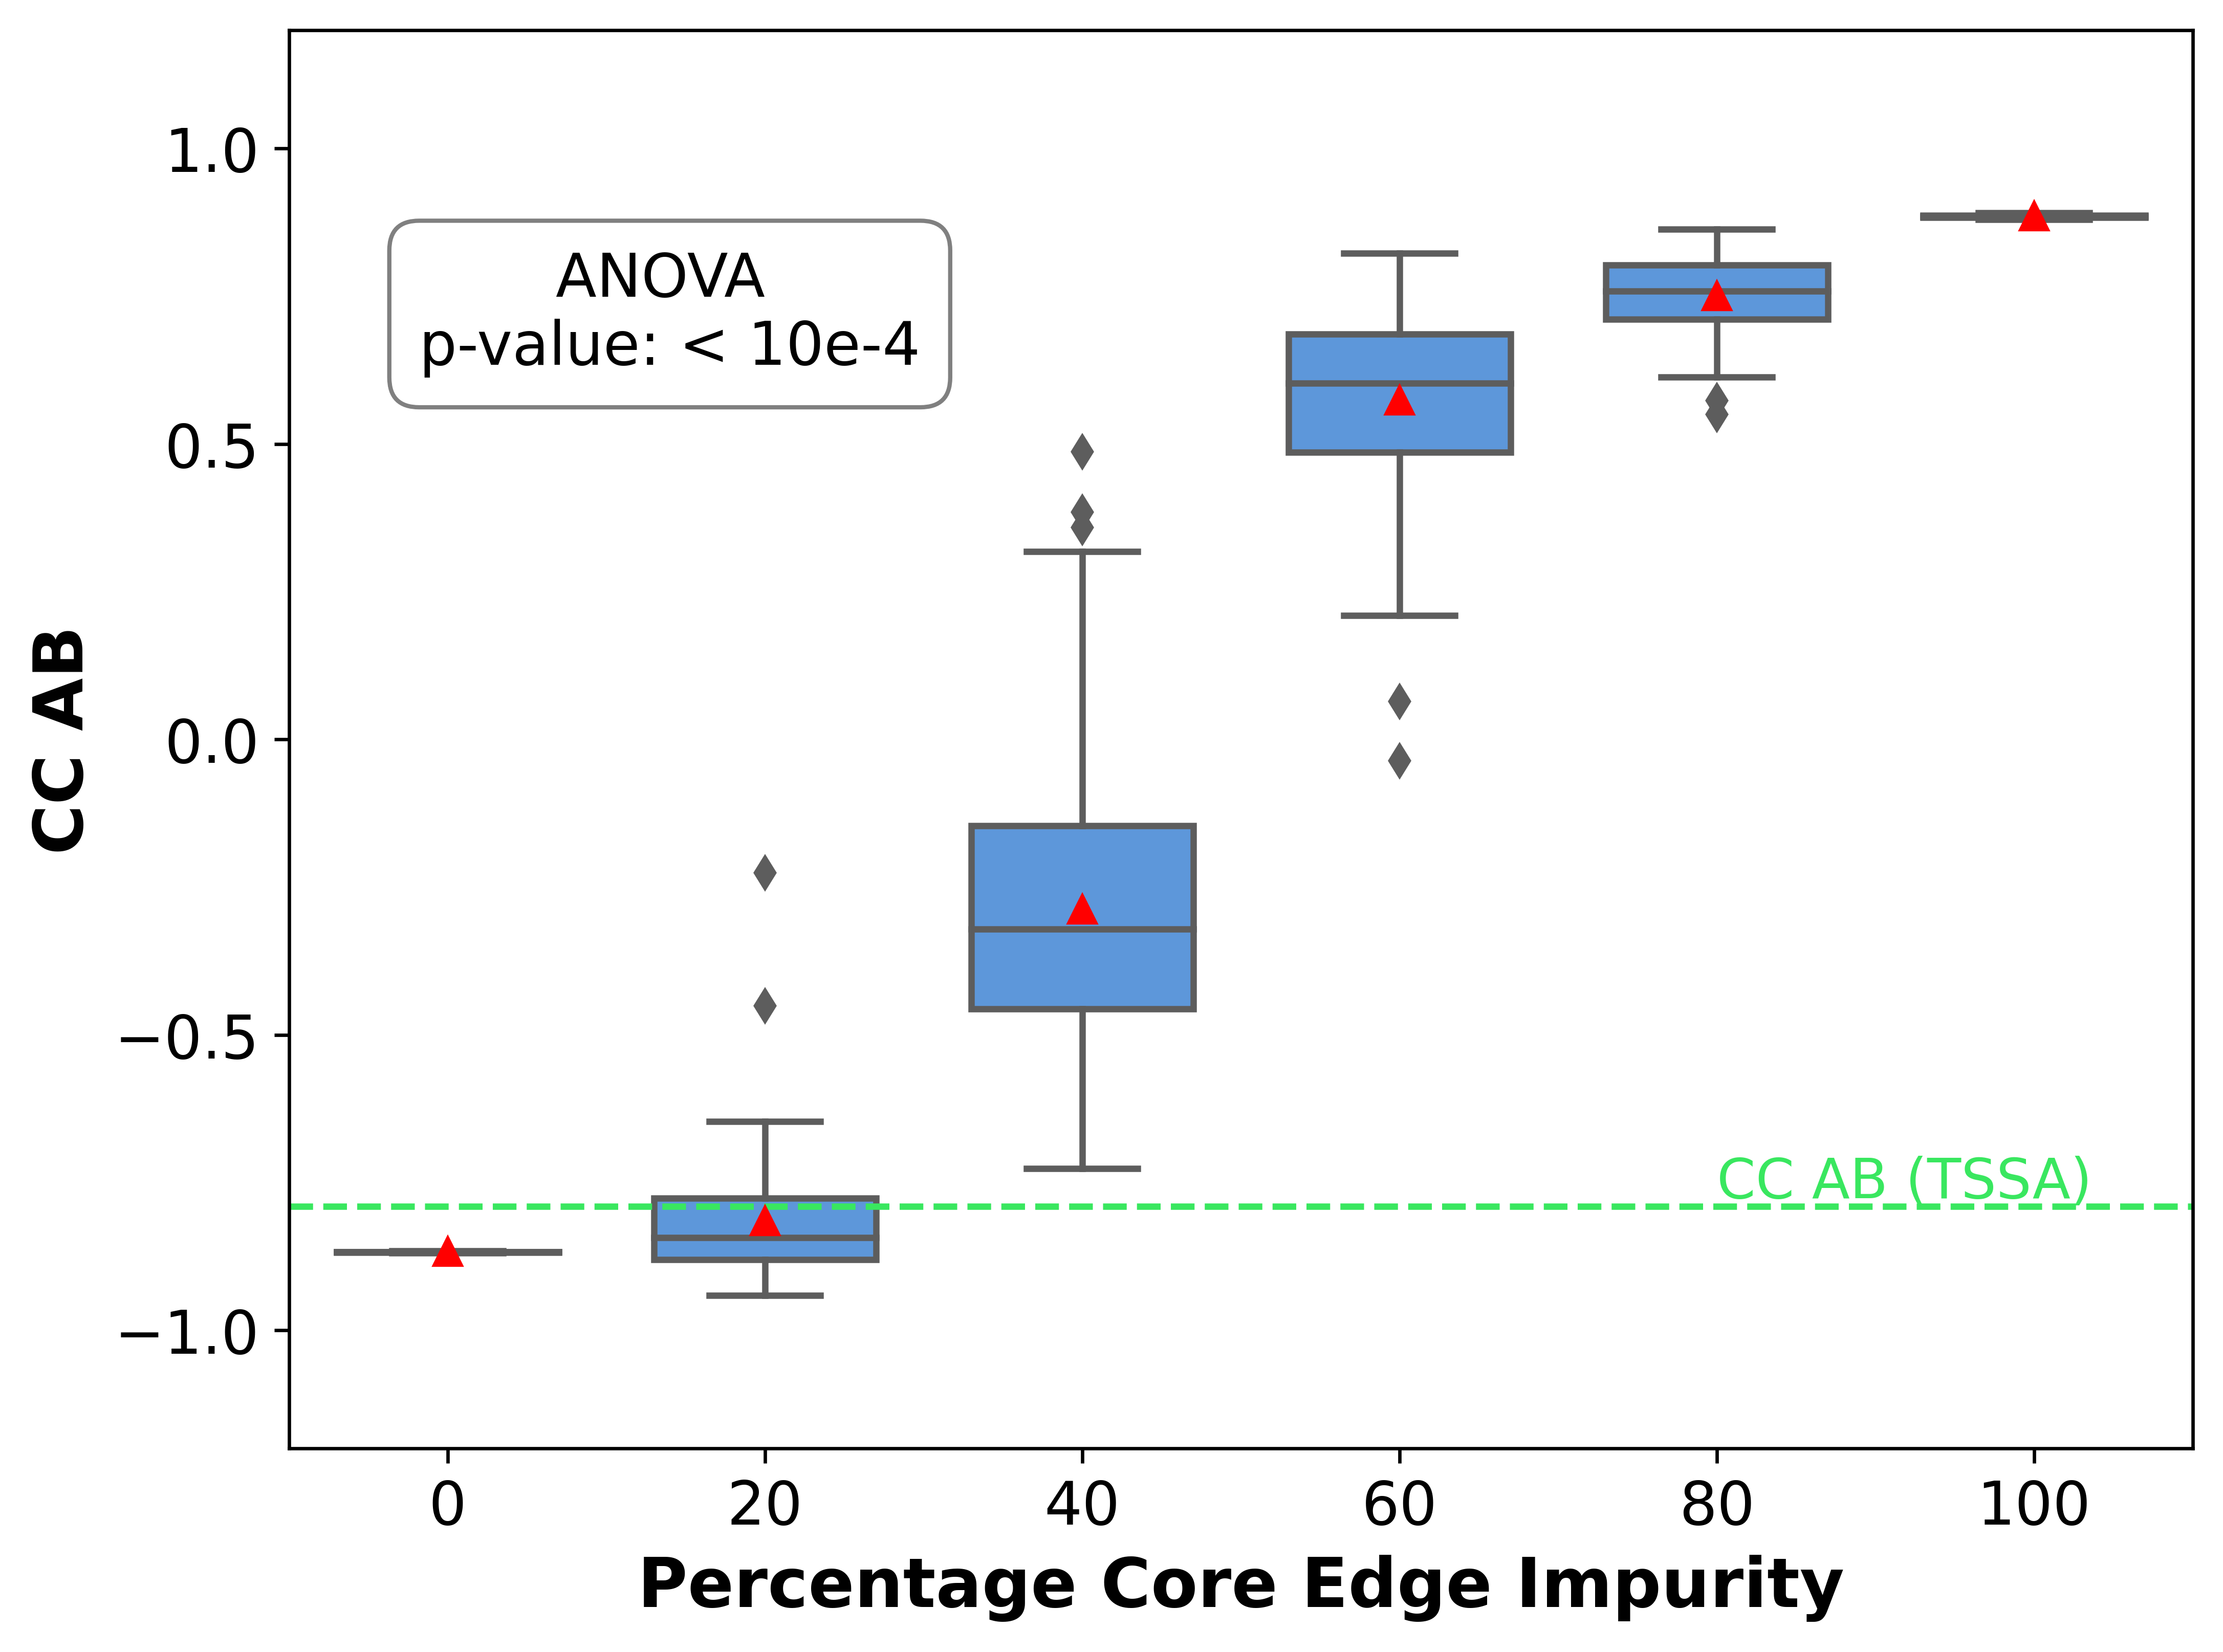

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=600)
plt.ylim(0, -1.04)

# Plot the boxplot
sorted_data = melt_table_complete_RACIPE.sort_values(by='Impurity', ascending=False)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='CC AB',
        x='Impurity',
        data=sorted_data,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=16, fontweight='bold')
    plt.ylabel('CC AB', fontsize=16, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-1.2, 1.2)
    plt.axhline(y=-0.79, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(4, -0.75, 'CC AB (TSSA)', color='#39e75f', ha='left', va='center', fontsize=13)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete_RACIPE['CC AB'][melt_table_complete_RACIPE['Impurity'] == avg_indegree] 
                          for avg_indegree in melt_table_complete_RACIPE['Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.2, 0.8, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.2, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.savefig('all_plots/CC_AB_vs_Percentage_Core_Impurity_RACIPE.png' , dpi =1000)
# Show the plot
plt.show()


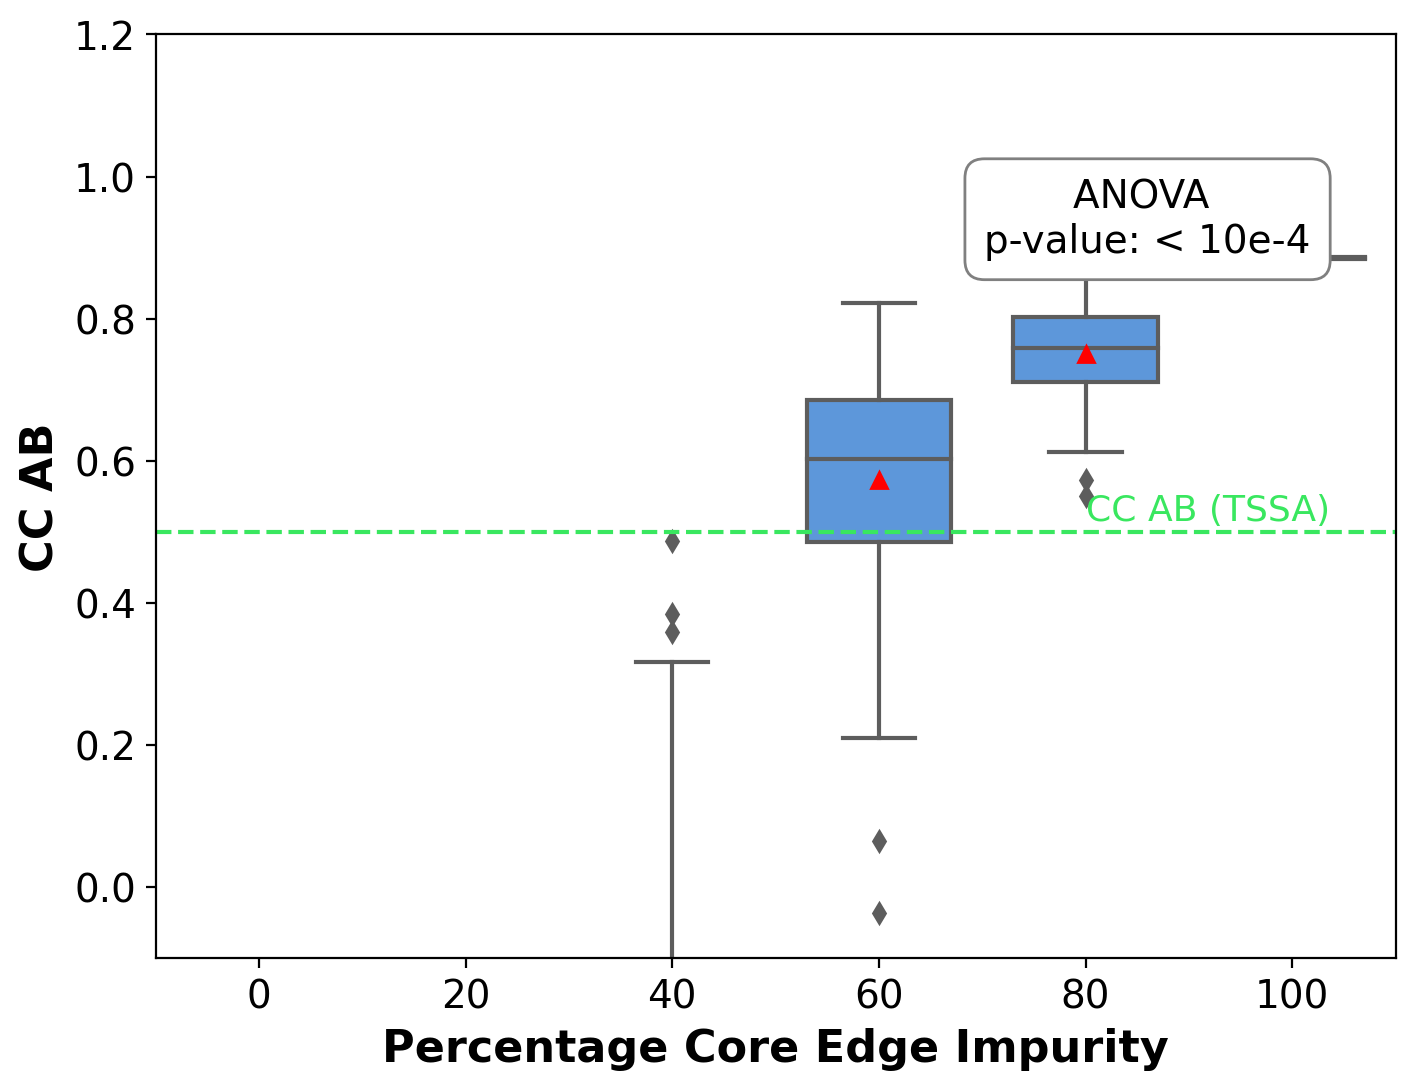

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
sorted_data = melt_table_complete_RACIPE.sort_values(by='Impurity', ascending=False)

with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='CC AB',
        x='Impurity',
        data=sorted_data,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=16, fontweight='bold')
    plt.ylabel('CC AB', fontsize=16, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.2)
    plt.axhline(y=0.4997, linestyle='--', color='#39e75f', label='y=0.55')
    plt.text(4, 0.53, 'CC AB (TSSA)', color='#39e75f', ha='left', va='center', fontsize=13)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete_RACIPE['F1 (Strict)'][melt_table_complete_RACIPE['Impurity'] == avg_indegree] 
                          for avg_indegree in melt_table_complete_RACIPE['Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.8, f'ANOVA \np-value: < 10e-4', fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5',
                       ))
else:
    plt.text(0.8, 0.8, f'ANOVA \np-value: {result.pvalue:.4f}',fontsize =14,
              transform=plt.gca().transAxes, ha='center', va='center', 
              bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
# plt.savefig('all_plots/F1_Score_vs_Percentage_Core_Impurity_RACIPE.png', dpi =1000)


# Show the plot
plt.show()


In [68]:
BiC_CC_F1_team_strength_Boolean('../Team_Size_5/all_60', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Density_60_Network_10N_core' , 60,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation", 0,0)


BiC_CC_F1_team_strength_Boolean('../Team_Size_5/all_60', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_60_Avg_Density_20_impurity_Network_10N_core' , 60,  99 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",20,0)

BiC_CC_F1_team_strength_Boolean('../Team_Size_5/all_60', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_60_Avg_Density_40_impurity_Network_10N_core' , 60,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",40,0)

BiC_CC_F1_team_strength_Boolean('../Team_Size_5/all_60', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_60_Avg_Density_60_impurity_Network_10N_core' , 60,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",60,0)


BiC_CC_F1_team_strength_Boolean('../Team_Size_5/all_60', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_60_Avg_Density_80_impurity_Network_10N_core' , 60,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",80,0)


BiC_CC_F1_team_strength_Boolean('../Team_Size_5/all_60', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_60_Avg_Density_100_impurity_Network_10N_core' , 60,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",100,0)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.92361223934957, 0.9987186798918801, 0.634307950354215, 0.941811162630946, 0.717730788511764, 0.9177528850741904, 0.931552333985932, 0.8493190458639686, 0.8266861650552242, 0.7467972693681901, 0.4650391437139783, 0.05449083736912801, 1.0, 0.6971660748243181, 0.9433423040250887, 0.8054061777463365, 0.2740793701135175, 0.6087119013711076, 0.9069146281443, 0.9810216877129418, 0.8823136032857533, 0.9314285565311374, 0.9300053735684921, 0.7687708956107407, 0.9845719242279176, 0.9810778333709137, 0.999984012676617, 0.9447452064497749, 0.9703462578725445, 0.9484296304515276, 0.6995285308223244, 0.9613012590382092, 0.9779607852231725, 0.6246692084255743, 0.9972837089688407, 0.6428046504066337, 0.8367616950933642, 0.871401661634095, 0.6017851629979505, 0.7425047775577881, 0.81865828976806, 0.579568030302594, 0.878210069159636, 0.7821338127188519, 0.05169453107076282, 0.8354542407879918, 0.8665567967957755, 0.7329953671493677, 0.9129687856283376, 0.945357927287713, 0.9504937338614096, 0.766697

/tmp/ipykernel_492584/2044280194.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0   100_With Self Activation_Network_0    0          100 -0.966283  0.753943   
0   100_With Self Activation_Network_0    0          100 -0.942355  0.678303   
1   100_With Self Activation_Network_1    0          100 -0.917986  0.493267   
2   100_With Self Activation_Network_2    0          100 -0.998236  0.892910   
3   100_With Self Activation_Network_3    0          100 -0.911431  0.714987   
..                                 ...  ...          ...       ...       ...   
95  60_With Self Activation_Network_95    0           60  0.997039  0.000000   
96  60_With Self Activation_Network_96    0           60  0.093582  0.000000   
97  60_With Self Activation_Network_97    0           60  0.980725  0.000000   
98  60_With Self Activation_Network_98    0           60  0.999994  0.000000   
99  60_With Self Activation_Network_99    0           60  0.757194  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
0       20.0  
1       20.0  
2       20.0  
3       20.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[1600 rows x 10 columns]

In [69]:
BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_40', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Density_40_Network_10N_core' , 40,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation", 0,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_40', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_40_Avg_Density_20_impurity_Network_10N_core' , 40,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",20,0)

BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_40', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_40_Avg_Density_40_impurity_Network_10N_core' , 40,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",40,0)

BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_40', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_40_Avg_Density_60_impurity_Network_10N_core' , 40,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",60,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_40', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_40_Avg_Density_80_impurity_Network_10N_core' , 40,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",80,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_40', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_40_Avg_Density_100_impurity_Network_10N_core' , 40,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",100,0)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.8090946794000015, 0.8974818140151054, 0.4646326494573567, 0.596169975281947, -0.9191259388515823, -1.0, 0.8057866084501896, 0.8938292791527006, 0.03832543812629276, 0.7551700873227937, 0.16919039446991713, -0.8697417952656845, -0.6164075038437223, 0.7746345075469028, 1.0, 0.36907047908502516, 0.2065806666641906, 0.2654719982637718, -0.06600064689334527, -0.23777337760144662, -0.9519750895564157, 0.9117354317465755, 0.4492075511090611, -0.6407805774808165, 0.2346914357081497, 0.9999835016230398, 0.5492299683891372, -0.3797803563552057, 0.9994642171289885, -0.35576810248000446, -0.9931083573397309, 0.7416193997795063, 0.1533459723165975, 0.2299006557389189, 0.08467341049297891, 0.6222312394158673, 0.5211842898725069, 0.08249651872102107, -0.12292577613495845, 0.8944278035163348, -0.5741017162542565, 0.9964243087223251, -0.8916541684390961, -0.24473597742613842, -0.43393660326994504, 0.9955635108806147, 0.9952520539013551, 0.8160940647642523, -0.16000798705097422, 0.47969069383288426,

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.5054284014531641, 0.596855436221415, 0.9597554018608313, 0.32627457046143876, 0.9767159953739627, 0.7525472215643444, 0.43460549282601335, 0.8252910928417145, 0.5954004312358333, 1.0, 0.2807853829515402, 0.3707979156761455, 0.8797118884594505, 0.8971695241005093, -0.8912674559907451, 0.5341168460126945, 0.8940321202074125, 0.9793170515935923, 0.3307019633700417, 0.9999999999999999, 0.5099923064031391, 0.9269891605477063, 0.5350092369545245, 0.34513214178185075, -0.9989221036378249, 0.5467892920702253, 0.5815169170172175, 0.12729856805854114, 0.9990656671926508, 0.7454346522349918, 0.958935830510324, 0.7219428610023334, 0.6144715862441559, 0.9620811891192554, 0.3939193940996604, 0.4460875140935714, -0.1814765241361264, 0.8777485531153751, 0.40503183881017335, 0.5942983462810459, 0.2635196650211946, 0.9648291551259675, 0.5725967933960788, 0.6118819773330878, 0.038406093151176095, 0.9930788337769486, 0.6302321730264224, 0.24823274178840937, 0.2180511367231338, 0.8919442486887683, 1.0, 

/tmp/ipykernel_492584/2044280194.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals`

1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.6019409598694851, -0.9674691332147073, 0.8998695216008595, 0.9589089866060625, 0.8500418905690341, 0.8593813682385724, 0.9857301083536023, 0.4406388955898318, 0.3986559782699408, 0.9839424528269849, 0.7567668809602826, 0.9783655840975397, 0.4651836011160388, 0.8155518137296316, 0.8527335418130083, 0.08988656030832412, 0.6298100267446833, 0.5308431784882106, 0.5171049459625766, 0.9693569437999462, 0.7123424369929838, 0.31926771173852797, 0.7400329040734808, 0.8944275559314535, 0.7015701341644012, 0.9057311419502809, 0.8859486742359683, 0.953366449053735, 0.8178283274774139, 0.5010364556049718, 0.9495311825450365, 0.836973435311149, 0.9267859109898038, 0.9999999999999999, 0.9999925076822541, 1.0, -0.1145197442281443, 0.8292176460193064, 1.0, 0.9503702483759408, 0.7518656776348662, 0.9945693888299257, 0.9023469554223443, 0.8711124328367479, 0.9651624715511467, 0.994999975640868, 1.0, 0.8795527740255203, 1.0, 0.9998231141833063, 0.7053188485847953, 0.8566157530252754, 0.2080786886658479

/tmp/ipykernel_492584/2044280194.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0   100_With Self Activation_Network_0    0          100 -0.966283  0.753943   
0   100_With Self Activation_Network_0    0          100 -0.942355  0.678303   
1   100_With Self Activation_Network_1    0          100 -0.917986  0.493267   
2   100_With Self Activation_Network_2    0          100 -0.998236  0.892910   
3   100_With Self Activation_Network_3    0          100 -0.911431  0.714987   
..                                 ...  ...          ...       ...       ...   
95  40_With Self Activation_Network_95    0           40  1.000000  0.000000   
96  40_With Self Activation_Network_96    0           40  0.908793  0.000000   
97  40_With Self Activation_Network_97    0           40  0.948710  0.000000   
98  40_With Self Activation_Network_98    0           40  0.966958  0.000000   
99  40_With Self Activation_Network_99    0           40  0.730765  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
0       20.0  
1       20.0  
2       20.0  
3       20.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[2200 rows x 10 columns]

In [70]:
BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Density_20_Network_10N_core' , 20,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation", 0,0)

BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_20_impurity_Network_10N_core' , 20,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",20,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_40_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",40,0)

BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_60_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",60,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_80_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",80,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_100_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",100,0)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.8927533059209026, 0.6281782469954834, 0.962834870360218, 0.7340043589568775, 0.918466789400685, 0.8684886173078151, 0.6913267416286564, 0.5685538504178105, 0.9274292095813365, 0.8871083456486639, 0.6724562287655912, 0.5668048384370971, 0.9539588249503493, 0.640611903053561, 1.0, 0.08390933130840927, 0.7097082585425207, 0.6824409840288991, 0.8293809565602559, 0.9181890857077637, 0.7411707706697249, 0.3424509360298945, 0.8223444393317583, 0.7226733985792774, 0.8275207146171063, 0.9665056635593782, 0.8979948529866023, 0.8561896600634397, 0.8672853434507651, 0.7804051112920758, 0.6100893640117164, 0.17420095464858046, 0.9021604787583708, 0.9289176078373748, 0.8662380934040619, 1.0, 0.915148766065989, 0.641405069140428, 0.901014395029063, 0.4844032018110279, 0.49208536035656625, 0.54489892030169, 0.945494974041462, 0.629901769640986, -0.0002744519474858378, 0.6872123631606276, 0.7671766265647956, 0.6713778013582536, 0.7432144703389453, 0.5602616456484489, 0.5364194903885197, 0.7107148612

/tmp/ipykernel_492584/2044280194.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0   100_With Self Activation_Network_0    0          100 -0.966283  0.753943   
0   100_With Self Activation_Network_0    0          100 -0.942355  0.678303   
1   100_With Self Activation_Network_1    0          100 -0.917986  0.493267   
2   100_With Self Activation_Network_2    0          100 -0.998236  0.892910   
3   100_With Self Activation_Network_3    0          100 -0.911431  0.714987   
..                                 ...  ...          ...       ...       ...   
95  20_With Self Activation_Network_95    0           20  0.956495  0.000000   
96  20_With Self Activation_Network_96    0           20  0.714352  0.000000   
97  20_With Self Activation_Network_97    0           20  0.627644  0.000000   
98  20_With Self Activation_Network_98    0           20  0.523037  0.000000   
99  20_With Self Activation_Network_99    0           20  0.465991  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
0       20.0  
1       20.0  
2       20.0  
3       20.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[2800 rows x 10 columns]

In [73]:
melt_table_complete.to_csv("5_Team_Size.csv")

In [ ]:
BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Density_20_Network_10N_core' , 20,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation", 0,0)

BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_20_impurity_Network_10N_core' , 20,  100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",20,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_40_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",40,0)

BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_60_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",60,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_80_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",80,0)


BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'TS_20_Avg_Density_100_impurity_Network_10N_core' , 20,  
                                 100 ,
                           ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
                           "With Self Activation",100,0)


In [151]:
melt_table_complete

Unnamed: 0                               index  Type  Core Density  \
0              0  100_With Self Activation_Network_0     0           100   
1              0  100_With Self Activation_Network_0     0           100   
2              1  100_With Self Activation_Network_1     0           100   
3              2  100_With Self Activation_Network_2     0           100   
4              3  100_With Self Activation_Network_3     0           100   
...          ...                                 ...   ...           ...   
2795          95  20_With Self Activation_Network_95     0            20   
2796          96  20_With Self Activation_Network_96     0            20   
2797          97  20_With Self Activation_Network_97     0            20   
2798          98  20_With Self Activation_Network_98     0            20   
2799          99  20_With Self Activation_Network_99     0            20   

         CC AB        F1  Team_Strength  Team Size  \
0    -0.966283  0.753943              0          0   
1    -0.942355  0.678303              0          0   
2    -0.917986  0.493267              0          0   
3    -0.998236  0.892910              0          0   
4    -0.911431  0.714987              0          0   
...        ...       ...            ...        ...   
2795  0.956495  0.000000              0          0   
2796  0.714352  0.000000              0          0   
2797  0.627644  0.000000              0          0   
2798  0.523037  0.000000              0          0   
2799  0.465991  0.000000              0          0   

      Number_of_Self_Activations Self Activation Status  Impurity  
0                              0   With Self Activation       0.0  
1                              0   With Self Activation      20.0  
2                              0   With Self Activation      20.0  
3                              0   With Self Activation      20.0  
4                              0   With Self Activation      20.0  
...                          ...                    ...       ...  
2795                           0   With Self Activation     100.0  
2796                           0   With Self Activation     100.0  
2797                           0   With Self Activation     100.0  
2798                           0   With Self Activation     100.0  
2799                           0   With Self Activation     100.0  

[2800 rows x 11 columns]

In [144]:
melt_table_complete = pd.read_csv("5_Team_Size.csv")

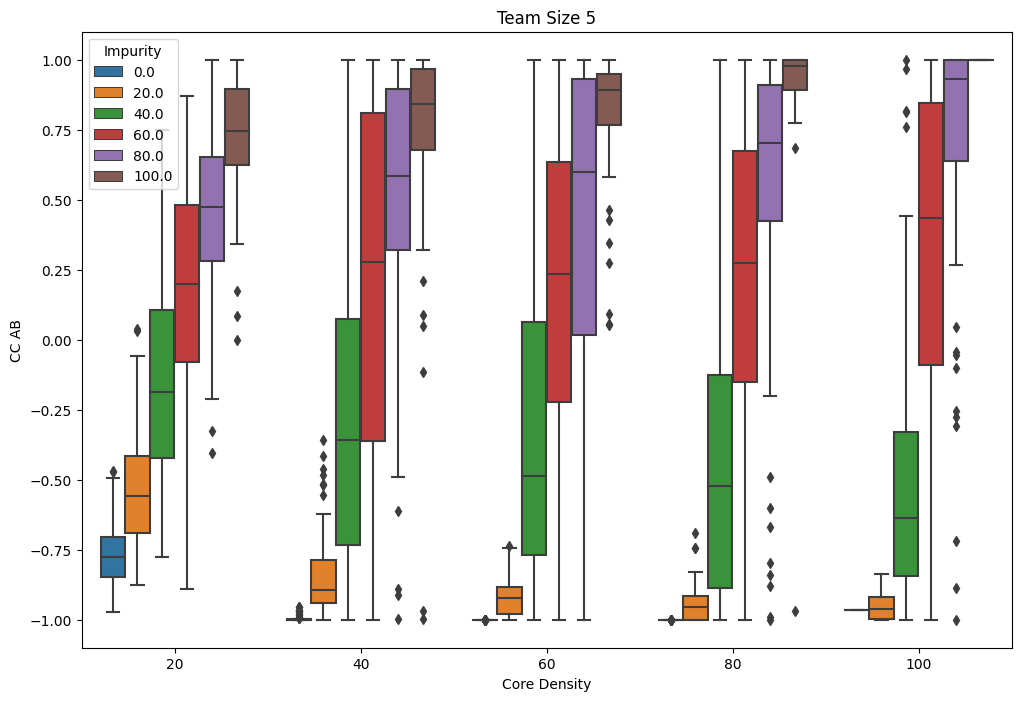

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='CC AB', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 5')

# Show the plot
plt.legend(title='Impurity')
plt.show()


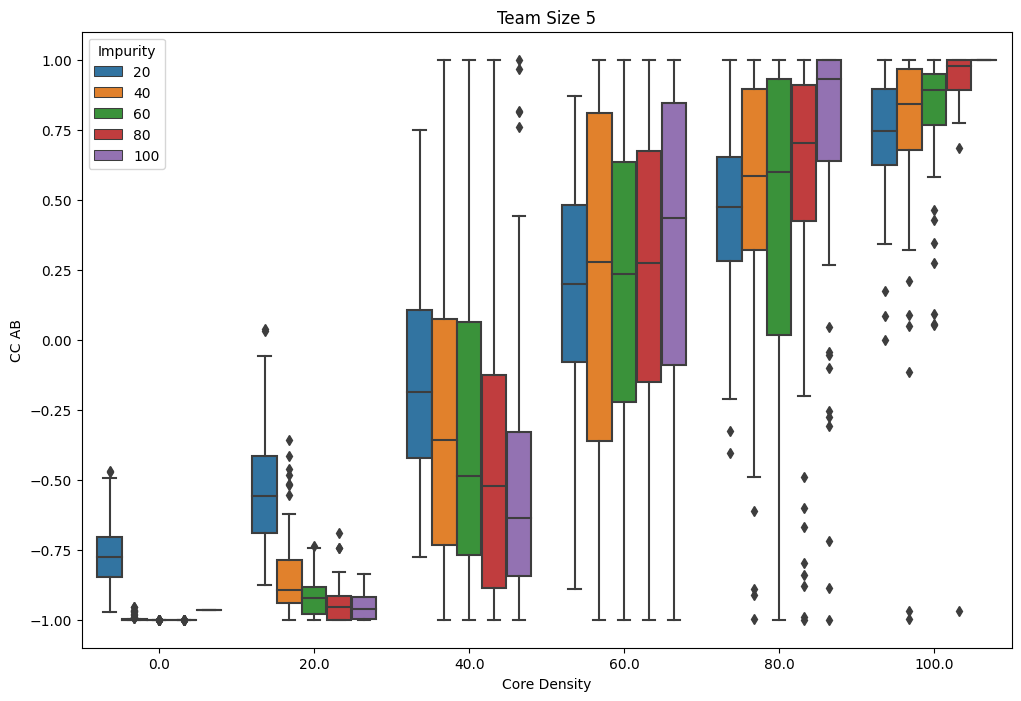

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='CC AB', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 5')

# Show the plot
plt.legend(title='Impurity')
plt.show()


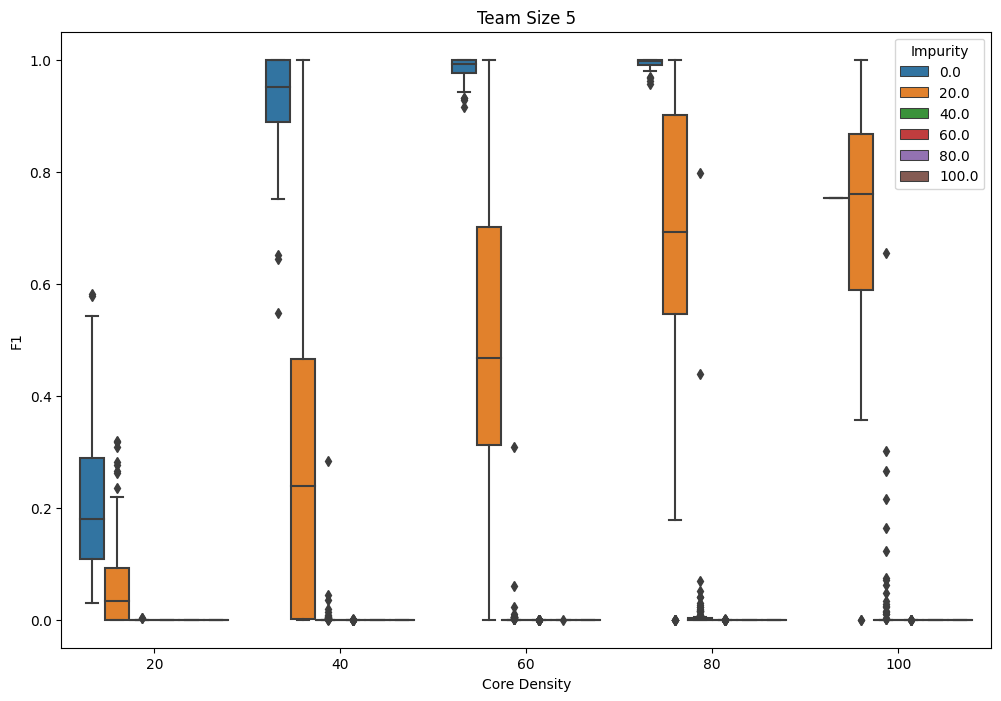

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='F1', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 5')

# Show the plot
plt.legend(title='Impurity')
plt.show()


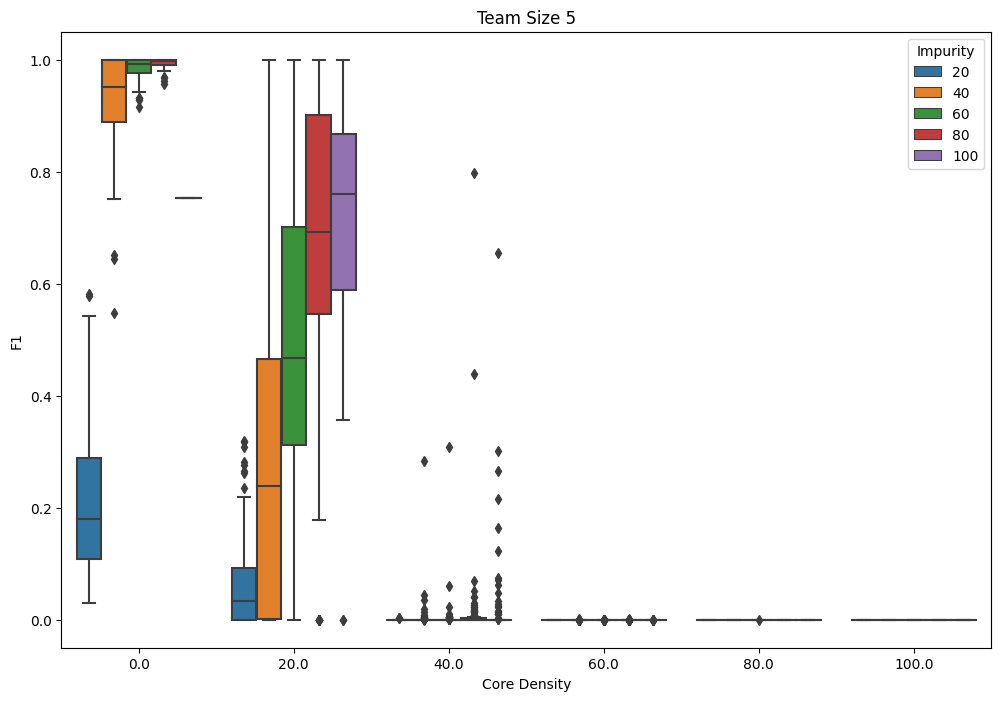

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='F1', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 5')

# Show the plot
plt.legend(title='Impurity')
plt.show()


In [91]:
melt_table_complete=pd.DataFrame(columns=['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size','Number_of_Self_Activations','Self Activation Status'])
melt_table_complete


Empty DataFrame
Columns: [index, Type, Core Density, CC AB, F1, Team_Strength, Team Size, Number_of_Self_Activations, Self Activation Status]
Index: []

In [92]:
BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_4_16/all_4_25', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Team_Size_4_Density_4_16_Impurity_0_4_16_Network_' , 25,  100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_4_16/all_4_25', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Team_Size_4_Density_4_16_Impurity_1_4_16_Network_' , 25,  100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",25,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_4_16/all_4_25', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Team_Size_4_Density_4_16_Impurity_2_4_16_Network_' , 25,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",50,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_4_16/all_4_25', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Team_Size_4_Density_4_16_Impurity_3_4_16_Network_' , 25,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",75,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_4_16/all_4_25', 'Average_00_01_02_03_04' ,
                                 'Average_05_06_07_08_09', 
                                 'Team_Size_4_Density_4_16_Impurity_4_4_16_Network_' , 25,   100 ,
                           ["N00","N01","N02","N03"],["N04","N05","N06","N07"], 
                           "With Self Activation",100,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_5/Density_4_16', 'Average_00_01_02_03_04' ,
#                                  'Average_05_06_07_08_09', 
#                                  'TS_20_Avg_Density_80_impurity_Network_10N_core' , 20,  
#                                  100 ,
#                            ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
#                            "With Self Activation",80,0)


# BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_20', 'Average_00_01_02_03_04' ,
#                                  'Average_05_06_07_08_09', 
#                                  'TS_20_Avg_Density_100_impurity_Network_10N_core' , 20,  
#                                  100 ,
#                            ["N00","N01","N02","N03","N04"],["N05","N06","N07","N08","N09"], 
#                            "With Self Activation",100,0)


Team_Size_4/Density_4_16/all_4_25
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84
85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.7259991372449283, -0.6468057290426807, -0.7582355830591693, -0.8976248824936619, -0.587774510897175, -0.6256285298579287, -0.8808441363315169, -0.8896351662262874, -0.5775075322271244, -0.8760504990164111, -0.8980975753821825, -0.9826499358625521, -0.7411669410952939, -0.40879023941679643, -0.7746818747787049, -0.7660439088353685, -0.7510343539967187, -0.631888931481552, -0.83375613440456, -0.7495830324116628, -0.6295559090710897, -0.5790908059474286, -0.6087713126661852, -0.6472314864667215, -0.4063633929077126, -0.8925902882129405, -0.7741285173508206, -0.7363245703735949, -0.40232366763579974, -0.6053825640326764, -0.7821004657364266, -0.8869552945846265, -0.6262520145656383, -0.8740052695772075, -0.7270592038660887, -0.6117432617378619, -0.5792600039765786, -0.9736717441834863, -0.7802953384835871, -0.8458040761645821, -0.6173358123224327, -0.5821383001769938, -0.5909643643263301, -0.7409438762395144, -0.7405044743971959, -0.4664235652387781, -0.7671941871855489, -0.74343362039

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64
65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85
86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98
99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.3415702579967073, -0.5251809839474247, -0.6380517858502905, 0.22034988032360422, -0.19487230098085934, -0.5132273524364755, -0.8414029336022861, -0.35091203171520563, -0.5279919059343625, -0.33355162133644095, -0.5084900617008985, -0.40062105232893036, -0.3240557344794784, -0.7530532154596472, -0.5183447125529866, -0.6947362459548032, -0.5362633688674597, -0.3471770221214158, 0.07211765175049903, -0.5793730963871337, -0.2609849837003446, -0.3832408810103547, 0.26264588601459005, -0.2850236058744181, -0.7346522901978015, -0.49952027626947587, -0.5895060737992004, -0.5295241521800311, -0.530673971269148, 0.08254007003391355, -0.48663025646156477, -0.6036701911766602, -0.5946138017992039, -0.2482036328086614, -0.33853948309471643, -0.6829949861670145, -0.7425133558781655, -0.8418318632484791, -0.37619212051371254, -0.40907303820475316, -0.3631942449428165, -0.06956458209262528, -0.4280870348662079, -0.39392929228974055, -0.38178552966679347, -0.28710399034366535, -0.11543463969097939, 

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

3


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65
66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

67
68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.8660644897430525, 0.20919451971464667, -0.5917467562198425, -0.7989863441143316, 0.5661736024363356, 0.1720460581610323, -0.2182074651787603, 1.640325936830048e-06, -0.27196076376136247, 0.4517116936195237, -0.10244967011597954, -0.12867109572443672, 0.23165874684424306, -0.3434675886890337, -0.5299490964482422, -0.2692635551633769, 0.4068084462136733, -0.46962494318512776, -0.11131267443996613, 0.34419691838861133, -0.1631886297525347, 0.4798720944883478, 0.18700351133342022, 0.4794715561101622, -0.036465012875341485, 0.171578004549863, -0.05627772281398316, 0.4009316253489099, -0.7227853922323353, -0.9552654006798679, -0.8743555228076711, -0.02803737065822821, -0.04937884984397304, -0.18994149346043854, 0.11749755306614358, -0.42586528292823916, 0.3436739291774975, -0.2530910522807106, 0.3891497446364419, 0.104943968440745, -0.27070398883729285, -0.18207309347162318, 0.23662009146569013, 0.6996327284588902, -0.346257379123885, -0.12555896406671724, -0.23037070522282513, 0.1932857

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11
12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40
41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67
68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.18675605096834186, 0.8576742003353087, 0.8704282016743684, 0.43205634322298486, 0.5010378198665688, 0.9114469236321061, 0.5679421185160081, 0.022761945743699254, 0.14370462384652688, 0.8997565137081294, -0.505328671724873, 0.7200581203598246, 0.7759743175381809, 0.49997196739408084, 0.37184487900702556, 0.5417598358317285, -0.2415962137729742, 0.563474393801479, 0.5685578168801448, 0.4059980741944118, 0.4433286632991077, 0.06756618609734771, 0.6005291990172497, 0.5859497052380254, 0.5370477898423984, 0.7657978873332915, 0.5879115599469616, 0.030145941647560244, 0.030727301595548324, 0.7122648309994806, 0.7584398339492867, 0.1504243420787217, 0.9238045899179111, 0.9721766880313246, 0.4343441717017277, 0.22136161446443453, 0.9045106345664047, 0.44388725709039456, 0.2843820160218858, 0.6909194268400859, 0.22262907652120725, 0.6095925294676046, 0.47950195490343894, 0.6602517667197073, 0.701043244881844, -0.04948514751359746, 0.7373137099925864, 0.07222786517576041, 0.8685408578831785, 0

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals`

2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40
41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.839262876417757, 0.6169319622963768, 1.0, 0.6957380250840128, 0.8099381195922372, 0.6711463657542007, 0.6468550886128497, 0.9509491972990264, 0.8182716053684411, 0.8089923398313517, 0.761059015670594, 0.7441275015228294, 0.6656849969102925, 0.4559907070664053, 0.9556956071129071, 0.5619213120460356, 1.0, 0.7807018088030856, 0.639133369787924, 0.41728451218581236, 1.0, 0.7235418586732816, 0.9044242154103952, 0.9999999999999999, 0.8016802242352782, 0.8770759110623564, 0.8068687652674427, 1.0, 0.9999999999999998, 0.872520846585193, 0.910128910639974, 0.43285508427903, 0.9999999999999999, 0.7997211353229168, 0.8147619120552351, 0.8916355036762883, 0.9409684392550118, 0.6701991851541605, 0.7889879641760394, 0.6194467797258195, 0.7017446734024833, 1.0, 0.6534908739237285, 0.6645828661310551, 0.41957621097472775, 0.8001463598236613, 0.7608378066332098, 1.0, 0.583255131290015, 0.7014058820332437, 0.9999999999999999, 0.667124639027322, 0.7256806263540124, 0.9999999999999998, 1.0, 0.816938240

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0     25_With Self Activation_Network_1    0           25 -0.725999  0.230607   
1     25_With Self Activation_Network_2    0           25 -0.646806  0.144610   
2     25_With Self Activation_Network_3    0           25 -0.758236  0.337317   
3     25_With Self Activation_Network_4    0           25 -0.897625  0.525820   
4     25_With Self Activation_Network_5    0           25 -0.587775  0.174193   
..                                  ...  ...          ...       ...       ...   
95   25_With Self Activation_Network_96    0           25  0.715648  0.000000   
96   25_With Self Activation_Network_97    0           25  0.715018  0.000000   
97   25_With Self Activation_Network_98    0           25  0.695205  0.000000   
98   25_With Self Activation_Network_99    0           25  0.832715  0.000000   
99  25_With Self Activation_Network_100    0           25  1.000000  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[500 rows x 10 columns]

In [93]:
BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_8_16/all_4_50', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07', 
                                 'Team_Size_4_Density_8_16_Impurity_0_8_16_Network_' , 50,  100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_8_16/all_4_50', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_8_16_Impurity_2_8_16_Network_' , 50,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",25,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_8_16/all_4_50','Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_8_16_Impurity_4_8_16_Network_' , 50,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",50,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_8_16/all_4_50', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_8_16_Impurity_6_8_16_Network_' , 50,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",75,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_8_16/all_4_50', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_8_16_Impurity_8_8_16_Network_' , 50,   100 ,
                           ["N00","N01","N02","N03"],["N04","N05","N06","N07"], 
                           "With Self Activation",100,1,101)


Team_Size_4/Density_8_16/all_4_50
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.9999383778034899, -0.9988520653199936, -0.9115356984561243, -0.9999831542027946, -0.9994054949008804, -0.9999271935293376, -1.0, -1.0, -0.9680425555753067, -0.9986378508282102, -1.0, -1.0, -0.998557857320241, -0.9999963606100444, -0.9979230219901739, -1.0, -0.9999999999999999, -1.0, -0.9031466718678683, -0.9999802073928953, -0.9999632891095629, -0.9996352807603339, -1.0, -0.9999378724836667, -1.0, -0.9986354080479666, -0.9996858730248424, -1.0, -0.988997995385426, -1.0, -0.9071230868582179, -0.9996488555806367, -0.9994439653642868, -0.9220755544859016, -0.9999999999999999, -0.9999999999999999, -0.9859607805764107, -0.9680732192974406, -0.8999912136576449, -0.9999999999999999, -0.9719325098330022, -0.9982320265727523, -0.9999999999999999, -0.9999073995128086, -0.9998185224633449, -0.9150016674063198, -0.998874538658328, -0.9988965559326138, -1.0, -1.0, -0.9996917170473028, -1.0, -1.0, -0.9972974509486436, -0.9645330208803922, -0.9999999999999999, -0.9241208694688242, -0.999999999999

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31
32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.17634578142259313, -0.9500366071507035, -0.30035358292271686, -0.7999675955949134, -0.5600867445203758, -0.9373061558789987, -0.9999985005717672, -0.8741618043851977, -0.9142190740170418, -0.9032790493442806, -0.7955824140043266, -0.9999993579707929, -0.7759374804595035, -0.2151583886880334, -0.8078867297486048, -0.9564250771347209, -0.9993325619147021, -0.7641919263371997, -0.8283776054272409, -0.8951962353488858, -0.5463022585647581, -0.6946998285989675, -0.8028374239328039, -0.8896435791825705, -0.868468484664896, -0.9095575780449718, -0.8162976694429314, -0.2916617540238142, -0.7479919000991275, 0.43769713888241324, -0.12549694967890665, -0.9999418421087666, -0.5935062781724306, -0.35659323617032956, -0.9571311742371718, -0.8498747472115488, -0.7136624814461149, -0.8825318073496579, -0.6273548216377064, -0.6015172186080409, -0.7627042649489068, -0.6443809339758487, -0.5134261009334717, -0.880989280564539, -4.357837802343315e-05, -0.4435921180972325, -0.8944008047167049, -0.8163

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

3
4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18
19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

20
21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34
35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38
39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42
43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45
46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48
49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54
55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

75
76
77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81
82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

83
84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95
96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[nan, 0.6177256320598103, nan, -7.523699007841267e-06, 0.47403615261116017, -0.670790286012607, -0.04893183799841806, -0.914605246613668, -0.08631942143365812, -0.006927026371978643, 0.5121120722503184, 0.6924386607380593, 0.39097192827237415, 0.515513057919013, 0.5932324156367329, -0.5019894840520948, 0.47861389088903744, -0.8872575490893048, 1.0, -0.47768946531579853, -0.21427883098818287, 0.25400576564463606, -0.014627523916186064, 0.5044613580756427, 0.36268970392497907, 6.546893110793932e-06, -0.9999999999999998, 0.0009776662579004313, 0.8738216430475432, 0.2255545584285152, -0.004246002258639349, 0.14879031176560004, -0.04532816386999756, nan, -0.48133657421150766, -0.23983327967876633, -0.7712919646983927, nan, 0.9662629964277473, 0.9332132737510686, 0.2510764791786235, nan, 0.147839274619878, 0.9999999999999999, -0.7139785781973277, -0.20168323239709798, 1.0, nan, -0.4510271450070194, 0.5604074488196265, -0.11200693515222307, 0.8822654284692946, 0.8296122819002238, -0.597366024

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2
3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5
6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8
9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

10
11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

12


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19
20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22
23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26
27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30
31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37
38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49
50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

51
52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56
57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64
65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88
89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99
100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

[0.5532047093517138, nan, 0.0017494156734278842, -9.876098302165327e-06, 0.6858952573436052, -0.3914302006208965, 0.24330724303127246, 0.5814095391783968, 0.08505376337777877, 0.7354376890181537, 0.3221941618926916, 0.3271595321039642, 9.632549263848707e-06, 0.48266018708578634, 0.9752133765292221, 0.9988139223997196, 0.006723928422492529, 0.9915332871542547, nan, 0.3629255149088594, 0.01280830947746905, nan, 0.45304430783499305, 0.5895314988695165, 0.678005306838407, nan, 0.5339147160994008, nan, 0.5033528750528558, 0.9999434972314433, 0.4692344754522757, -0.008671064415826154, 0.8439262953099114, -0.0069990314663721425, 0.9999724952794979, -0.11606363313143504, nan, 0.004750487970702849, 0.6614962148098745, 0.4528430718065041, 0.8443337666139665, 1.0, 0.27849039651137614, 0.8118725589456868, 0.6570376511465263, 0.4752101036914743, 0.6347197707448101, 0.7072977922722121, 0.030080579301617512, 1.0, 0.822675399274791, 0.7236068084828361, 0.9999955077277667, 0.005710797726466196, 0.46256

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13
14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16
17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

18
19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25
26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

31


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37
38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56
57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79
80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91
92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.670549763037976, 0.8636884370232056, 0.9380980673693726, 0.9999999999999999, 0.6707660408895854, 0.7182945608426444, 0.40561482232111706, 0.657091540873116, 0.6690187545542661, 0.007065343711631441, 1.0, 0.6024741223365381, nan, 0.9140085973967667, 0.8458686975533346, nan, 1.0, 0.6757467484283027, 0.9999999999999999, 0.9073349427853887, 0.6896041226885692, 0.7028996653055766, 0.9077732941300696, 0.9999434809582813, 0.896258159529778, 0.6331454887154432, 0.8621431451704317, nan, 0.8164965809286446, 1.0, 0.9998246293294776, 1.0, -9.87597497472696e-06, 0.6246198309248853, 0.6540943219117157, 0.9103398801584357, 0.6854629807195329, 0.9993729224581149, 0.21879074911054122, 0.08310889802931623, 0.9733947706544595, 0.9999431423296012, 0.7149815779143636, 0.9981585946428249, 0.37559792031296013, 0.7881105184263534, 0.7683758627111082, 0.8426135818407025, 0.8963158782956037, 0.687555614513303, 0.9996672984976086, 0.466547201083247, 0.8793898801364237, 0.9999297777143645, 0.1200367309738601, 

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0     25_With Self Activation_Network_1    0           25 -0.725999  0.230607   
1     25_With Self Activation_Network_2    0           25 -0.646806  0.144610   
2     25_With Self Activation_Network_3    0           25 -0.758236  0.337317   
3     25_With Self Activation_Network_4    0           25 -0.897625  0.525820   
4     25_With Self Activation_Network_5    0           25 -0.587775  0.174193   
..                                  ...  ...          ...       ...       ...   
95   50_With Self Activation_Network_96    0           50  0.999993  0.000000   
96   50_With Self Activation_Network_97    0           50  0.999875  0.000000   
97   50_With Self Activation_Network_98    0           50  0.641090  0.000000   
98   50_With Self Activation_Network_99    0           50  0.999982  0.000000   
99  50_With Self Activation_Network_100    0           50  0.484775  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[1000 rows x 10 columns]

In [94]:
BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_12_16/all_4_75', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07', 
                                 'Team_Size_4_Density_12_16_Impurity_0_12_16_Network_' , 75,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_12_16/all_4_75', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_12_16_Impurity_3_12_16_Network_' ,75,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",25,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_12_16/all_4_75','Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_12_16_Impurity_6_12_16_Network_' ,75,    100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",50,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_12_16/all_4_75', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_12_16_Impurity_9_12_16_Network_' , 75,  100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",75,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_12_16/all_4_75', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_12_16_Impurity_12_12_16_Network_' , 75,   100 ,
                           ["N00","N01","N02","N03"],["N04","N05","N06","N07"], 
                           "With Self Activation",100,1,101)


Team_Size_4/Density_12_16/all_4_75
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4
5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79
80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-1.0, -1.0, -1.0, -1.0, -1.0, -0.9999953747268545, -0.9999999999999999, -1.0, -1.0, -0.9999956576538488, -0.9999962862338708, -1.0, -0.9995982640158847, -0.9999696970843728, -0.9999693527188723, -1.0, -0.9998919226372732, -0.9999932299464352, -1.0, -1.0, -0.999929571051296, -1.0, -1.0, -0.9999878556757469, -1.0, -1.0, -0.9999866187857228, -1.0, -0.9999667492425041, -0.9996791440494596, -0.9999999999999999, -0.9999972777221852, -0.9999784309826162, -1.0, -1.0, -0.9999761464699856, -0.9999925969297982, -0.9999968688627988, -0.9999999999999999, -0.9999727950719478, -1.0, -0.999997550100622, -0.9991361327866353, -1.0, -0.9998517003924251, -1.0, -0.9999880497776348, -1.0, -0.9999801366629343, -0.9999566230947059, -0.9999928919259294, -0.9999999999999999, -0.9999990466562513, -0.9999683158623953, -0.9999999999999999, -1.0, -1.0, -0.9999918399696132, -1.0, -1.0, -0.9999876733622646, -1.0, -0.9999914047476347, -0.9999999999999999, -0.999940665764686, -1.0, -1.0, -1.0, -0.9999055991486814, -0.

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

19


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56
57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59
60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86
87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

88
89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.0, -0.975200012461826, -0.8049461998003177, -0.9399801719128356, -0.8259656929049302, -0.8278628509252582, -0.933958442461271, -0.5787462643820618, -0.8858245320929704, -0.8149581007523969, -0.8944266527534969, -0.9458349645287131, -0.656220225620139, -0.905017372313366, -0.851363633148104, -0.9232484902341873, -0.9999984978478262, -0.9225109162910062, -0.8944255261334972, -0.5817187953219544, -0.7175443604401617, -0.93702355668233, -0.6288826586338123, -0.9747539892951097, -0.7051265010813804, -0.767780601778673, -0.7287127935828192, -0.9794128209901612, -0.972468878175883, -0.9273053105959773, -1.0, -0.8254752465208718, -0.9999999999999999, -0.9528974423989016, -0.9124862678659955, -0.9999999999999999, -0.8628245813262034, -0.9997036574900946, -0.04332779931174529, -0.6605543914396237, -0.8944284804825358, -0.9999999999999993, -0.22607705031175868, -1.0, -0.880163989261222, -0.8177758791833039, -0.9153735074375934, -0.7504252364463448, -0.9407294171112244, -0.8917659171069158, -0.

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23
24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

25
26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32
33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

34
35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37
38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

59
60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

61
62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64
65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

66
67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76
77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79
80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92
93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-4.954007460200739e-06, 0.5390655230113763, 0.44785853747371174, -0.022644676584363654, -0.6608706444638369, -0.9999825004221675, -0.6093225753354415, -0.9999544684726486, -0.012907628493302598, -0.1958348251804126, -2.2784798550577843e-06, 0.24622158803689095, -0.3070123378560075, -0.11875735615726017, 3.8426359941682495e-08, -0.0010026500218060974, -1.963137908270383e-05, 0.0007660309662461631, -0.5490173347274986, 0.03991015143863129, -0.6968629339865839, -0.000776767544596639, -0.0259423387317341, nan, -0.3051832153882679, 0.3155560675275674, 0.24358757020672467, nan, 0.07152049015131447, 0.45653743820665094, -0.6258110690940356, 0.7683653584578607, 0.2697130961484747, nan, 0.11206231087031275, 0.47243860136712784, nan, 0.30886597266736593, 0.9947739012344721, 0.00014197273544283397, 0.2986849935164132, 0.5506538954378689, 0.19044966088331866, -0.2147170303399203, -0.060035565489834894, 0.0053057324172030434, -0.0008337661169755886, -0.1796794231523091, -0.11127589691003821, 0.414

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7
8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30
31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

32
33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36
37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

38
39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41
42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

43
44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72
73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76
77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

78
79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

80
81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93
94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.001152991142269035, 1.0, 0.33817429750282724, 0.708235989365837, 0.7793599144381848, 0.3402363450958842, nan, -0.25619309802079676, 0.39393858430164386, 0.5164596847441143, 0.16107858436828137, 0.27129833836991735, 1.0, 0.008530470150697559, 0.9987356602828341, 3.3574766647613917e-06, 0.07229383198563943, 0.9885152684089623, 0.4170773565828933, 0.9334716510391987, 0.9011190372544201, 0.9268050678319301, -0.05741907012969328, 0.5578495019211807, 0.8737884192254223, 0.37751765994131303, -0.06708144351500099, nan, 0.9999969998986074, nan, nan, 0.7724772592711735, 1.0, 0.9999970004514664, 0.05182408487205178, nan, -0.023618434782723626, nan, 0.891943152876722, 0.8675887435649834, nan, 0.3868138590221989, nan, 0.7824894552059706, 1.0, 0.9677227348637063, 0.15162550946168532, 0.010981900640250092, 0.44234793334383077, 0.748785941473134, 0.9999083427283174, 1.0, 0.2695659058347253, 0.7369869234283011, 0.03399669460465839, -0.004831579875419645, 0.999992780375505, 0.5258209985649386, 0.6028

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5
6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31
32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[1.0, 0.9999928498982922, 0.7849994673401802, 0.9991351383204331, nan, 0.7900934979276443, 0.9998684096291116, 0.6704528502599584, 0.999928431783595, 0.8599633474902976, 0.9999942701932667, 0.9997373781929165, 0.9999954999987155, 0.9963042551073874, 0.9752443312815613, 0.863524539016907, 0.9990925017081604, 0.9998305297168633, 0.9994008868035861, 0.9998360094209724, 0.9107434877660395, 0.6582678504688076, 0.928453885573047, 0.999980216758832, 0.9251357066793828, 0.9999059549338125, 0.8791222233131216, 0.8751133084527681, 1.0, 0.9148312524124963, nan, 0.9999999999999999, 0.9998577834980826, 0.6556980702022798, 0.9368960001661518, 0.8381931568013615, 0.7642744756048426, 1.0, 0.7047565364617373, 0.9997423293690838, 0.8987353324894956, 1.0, 0.9143471545763492, 0.9307201295796411, 0.9985976549017326, 0.6940036574198508, 1.0, 0.989651514975821, 1.0, 1.0, 0.9989959423819371, 0.8498251995398141, 0.9931986897830151, 0.27341032791716297, 0.843094000893841, 0.7419044298953826, 0.9999940058249918,

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0     25_With Self Activation_Network_1    0           25 -0.725999  0.230607   
1     25_With Self Activation_Network_2    0           25 -0.646806  0.144610   
2     25_With Self Activation_Network_3    0           25 -0.758236  0.337317   
3     25_With Self Activation_Network_4    0           25 -0.897625  0.525820   
4     25_With Self Activation_Network_5    0           25 -0.587775  0.174193   
..                                  ...  ...          ...       ...       ...   
95   75_With Self Activation_Network_96    0           75  0.828611  0.000000   
96   75_With Self Activation_Network_97    0           75  0.843318  0.000000   
97   75_With Self Activation_Network_98    0           75  0.778570  0.000000   
98   75_With Self Activation_Network_99    0           75  0.944829  0.000000   
99  75_With Self Activation_Network_100    0           75  0.673615  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[1500 rows x 10 columns]

In [96]:
BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_16_16/all_4_100', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07', 
                                 'Team_Size_4_Density_16_16_Impurity_0_16_16_Network_' , 100,  1,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation", 0,1,2)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_16_16/all_4_100', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_16_16_Impurity_4_16_16_Network_' ,100,    100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",25,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_16_16/all_4_100','Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_16_16_Impurity_8_16_16_Network_' , 100,    100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",50,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_16_16/all_4_100', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_16_16_Impurity_12_16_16_Network_' , 100,   100 ,
                           ["N00","N01","N02","N03"],["N04", "N05","N06","N07"], 
                           "With Self Activation",75,1,101)




Team_Size_4/Density_16_16/all_4_100
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.9446079743586627]
Team_Size_4/Density_16_16/all_4_100
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.7882966400438775, -0.9465670956785709, -0.612710594321594, -0.8556437619780751, -0.8370872709141653, -0.6923973455596735, -0.5998258488704007, -0.6135218093400624, -0.7395464535746401, -0.940204735053836, -0.7367802323096102, -0.9247957725004173, -0.8662239579532425, -0.8704155602565308, -0.7830317294651068, -0.840182551636646, -0.8757908455345301, -0.8935163987672967, -0.8695121934447099, -0.9598181813189447, -0.9766932573564538, -0.8791938658011991, -0.8818837834159162, -0.8954855760249171, -0.8594849459589813, -0.9465894775882538, -0.7637806048255426, -0.762504166022072, -0.9712787740598485, -0.8889611021845729, -0.9578624390770074, -0.750438373652006, -0.9807980218834943, -0.6362561356842377, -0.9011846236003105, -0.9186192762375153, -0.8413220602899837, -0.8855386413641954, -0.7974610532038378, -0.7978706847199247, -0.9957072093358963, -0.8560679685383369, -0.930306308443421, -0.8006817836916283, -0.9371025650079134, -0.9228097196352808, -0.7960039737397415, -0.919585621788624

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11
12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22
23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26
27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

59
60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

61
62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71
72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89
90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94
95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97
98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

99
100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

[-1.0, -0.7239669317520377, -0.4713301324007009, -1.0, -0.9116458557295284, 0.5023087899905778, -9.944823261090422e-07, 0.5987825064221878, 0.07736373432819955, -4.097772924899228e-06, nan, 0.7668982864025884, 0.48625125457288265, 0.11700624524752007, -0.24008250638092726, 0.005493406574210497, 0.002444074050219369, 0.32620803653315544, -0.8356789149202869, 0.2443184307790985, 0.8666522405980323, nan, -0.7593206255000449, -0.5775960585861775, -0.02661857137670767, nan, 2.2835788605844197e-06, -0.43599295431517815, 0.2342735780331924, 0.20763235255494059, 0.24596242336586144, 0.3537035848685405, 0.4062404215016217, -0.13122071657706535, -0.40595169808216913, 0.47587649739543125, -0.34110916194004004, 0.4162889964934432, 0.29372711987985917, -0.1275505145152988, -0.8210363660776872, -0.29358535691068305, 1.0, -0.14508562169333925, -0.2903936504798512, 0.01461300354654296, 0.4480603037269954, -0.12137834095833701, 0.8232646494713785, -0.002532430845894235, 0.7844384083698099, 0.5305450231

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3
4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6
7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

8
9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17
18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

19
20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24
25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

26
27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

33
34
35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

36
37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

38
39
40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43
44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

50
51
52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

53
54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62
63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75
76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78
79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94
95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97
98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.9873439711126722, 0.5487490104574043, nan, 1.0, 0.4831997862714062, nan, nan, 0.3971742277910245, 1.0, 0.46076840615765885, 1.0, 0.6946581792130927, 0.22997993362177216, 1.0, 0.7455119119787161, 0.9999544950953817, nan, nan, 0.7376398868315128, 0.6476814525737847, 0.2776035556676676, 1.0, 0.9999999999999999, nan, nan, 0.9986963364337242, 0.001226794686280074, nan, 0.7355263877864159, 0.578124570979791, 0.11990239919924857, nan, 0.47992654471003376, nan, 0.9652113046158518, nan, nan, nan, 0.9999999999999998, 0.3867134609378252, 0.36544146973260094, 0.4451392597309321, nan, 0.6137724031523285, 0.418732542228794, 0.37097669275821393, 0.5100723406191883, 0.2975471646697287, nan, 0.6257058498499207, nan, nan, 1.0, 0.9995372662437012, 0.999998495230305, 0.9999999999999998, nan, 0.9999999999999998, 0.3746842394059307, 0.9649489703168409, 1.0, nan, 0.6338120270862931, 0.4381675182304193, 0.4503297321406723, 0.25330133231559726, 0.3651216104577195, 0.4350523555262745, 0.13081052194586407, 0.

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


FileNotFoundError: [Errno 2] No such file or directory: 'Team_Size_4/Density_16_16/all_4_100/Team_Size_4_Density_16_16_Impurity_16_16_16_Network_2_finFlagFreq.csv'

In [100]:
BiC_CC_F1_team_strength_Boolean('Team_Size_4/Density_16_16/all_4_100', 'Average_00_01_02_03' ,
                                 'Average_04_05_06_07',
                                 'Team_Size_4_Density_16_16_Impurity_16_16_16_Network_' , 100,   1 ,
                           ["N00","N01","N02","N03"],["N04","N05","N06","N07"], 
                           "With Self Activation",100,1,2)

Team_Size_4/Density_16_16/all_4_100
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[1.0]


/tmp/ipykernel_492584/1941344423.py:55: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'CC AB']= Corr_list
/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB  \
0      25_With Self Activation_Network_1    0           25 -0.725999   
1      25_With Self Activation_Network_2    0           25 -0.646806   
2      25_With Self Activation_Network_3    0           25 -0.758236   
3      25_With Self Activation_Network_4    0           25 -0.897625   
4      25_With Self Activation_Network_5    0           25 -0.587775   
..                                   ...  ...          ...       ...   
96   100_With Self Activation_Network_97    0          100       NaN   
97   100_With Self Activation_Network_98    0          100  1.000000   
98   100_With Self Activation_Network_99    0          100  0.000460   
99  100_With Self Activation_Network_100    0          100  0.620778   
0     100_With Self Activation_Network_1    0          100  1.000000   

          F1 Team_Strength Team Size Number_of_Self_Activations  \
0   0.230607             0         0                          0   
1   0.144610             0         0                          0   
2   0.337317             0         0                          0   
3   0.525820             0         0                          0   
4   0.174193             0         0                          0   
..       ...           ...       ...                        ...   
96  0.000000             0         0                          0   
97  0.000000             0         0                          0   
98  0.000000             0         0                          0   
99  0.000000             0         0                          0   
0   0.000000             0         0                          0   

   Self Activation Status  Impurity  
0    With Self Activation       0.0  
1    With Self Activation       0.0  
2    With Self Activation       0.0  
3    With Self Activation       0.0  
4    With Self Activation       0.0  
..                    ...       ...  
96   With Self Activation      75.0  
97   With Self Activation      75.0  
98   With Self Activation      75.0  
99   With Self Activation      75.0  
0    With Self Activation     100.0  

[1802 rows x 10 columns]

In [ ]:
#TS 3

In [101]:
melt_table_complete.to_csv('Team_Size4.csv')


In [154]:
melt_table_complete = pd.read_csv("Team_Size4.csv")

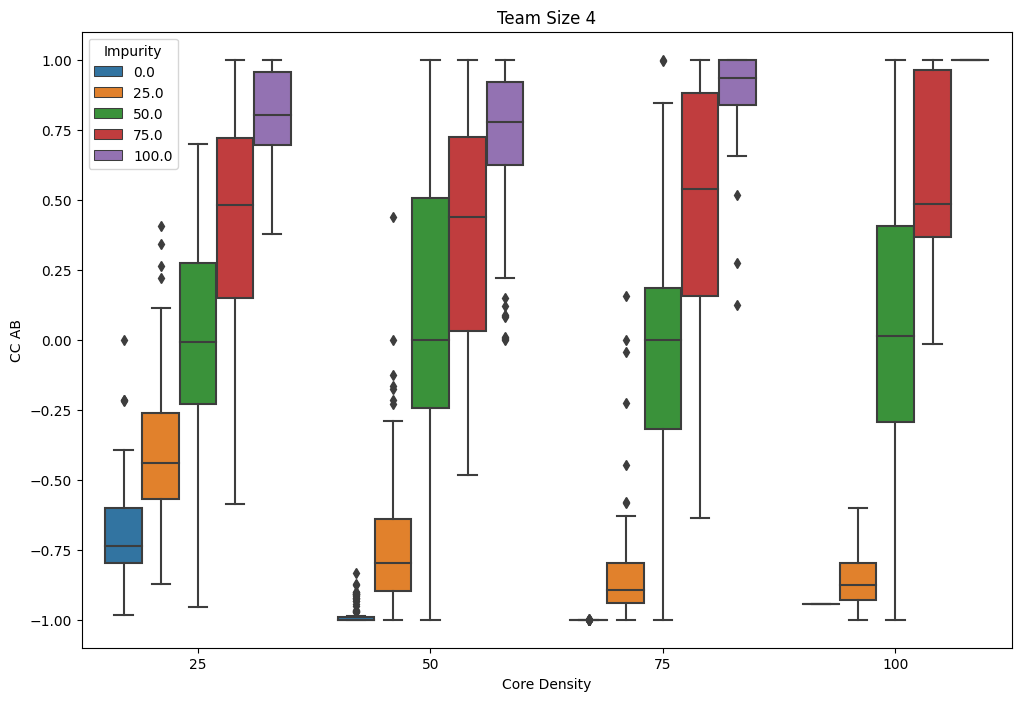

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='CC AB', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 4')

# Show the plot
plt.legend(title='Impurity')
plt.show()


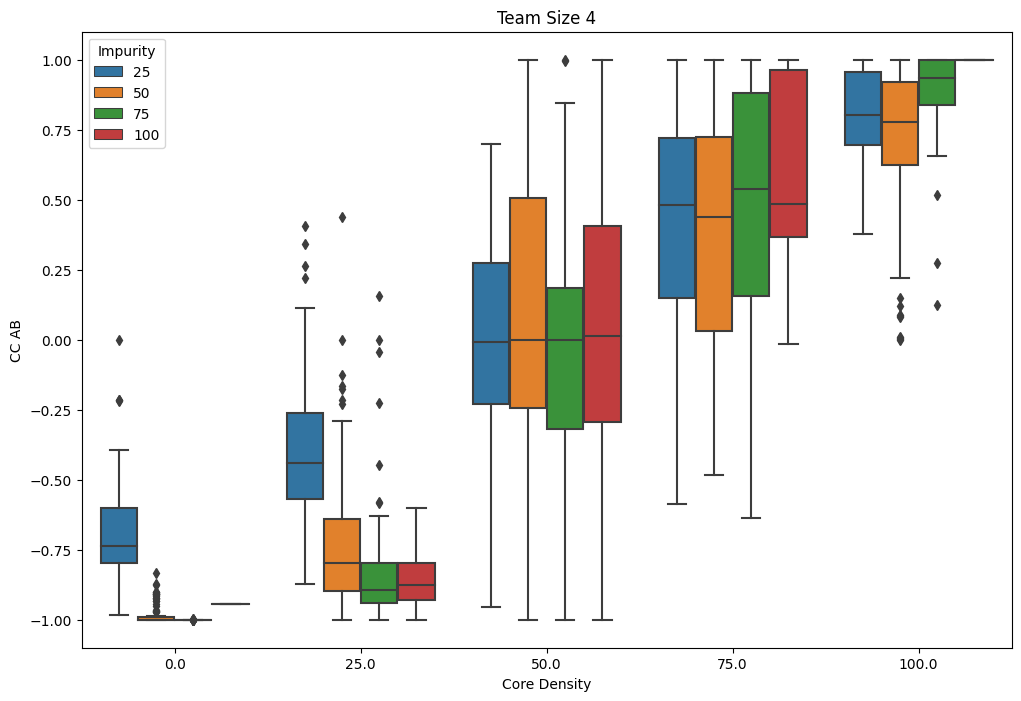

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='CC AB', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 4')

# Show the plot
plt.legend(title='Impurity')
plt.show()


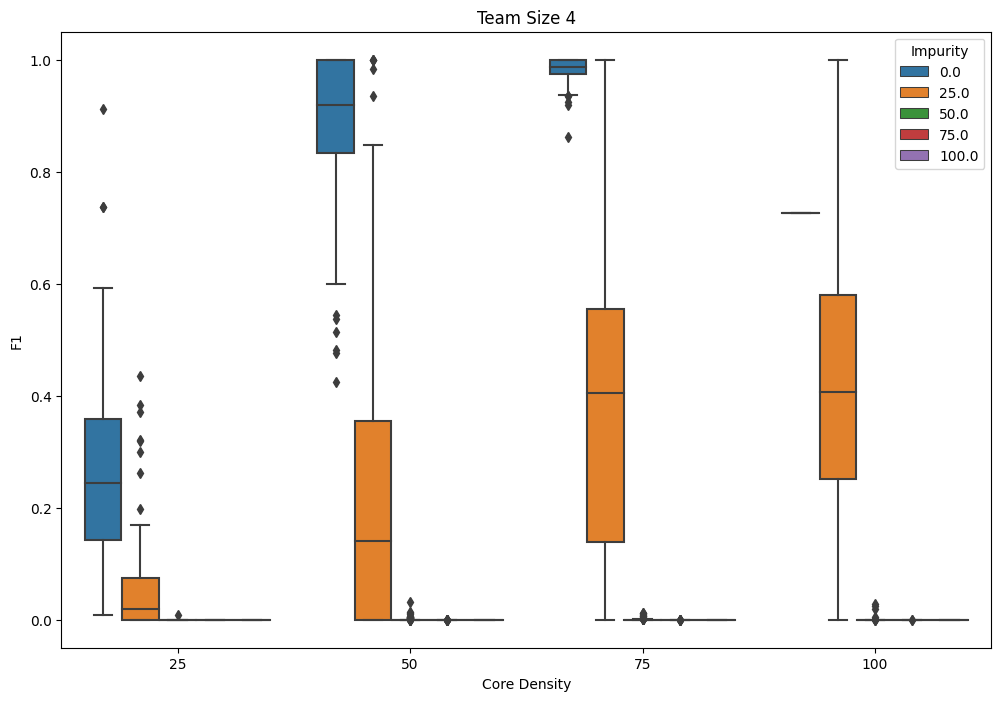

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='F1', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 4')

# Show the plot
plt.legend(title='Impurity')
plt.show()


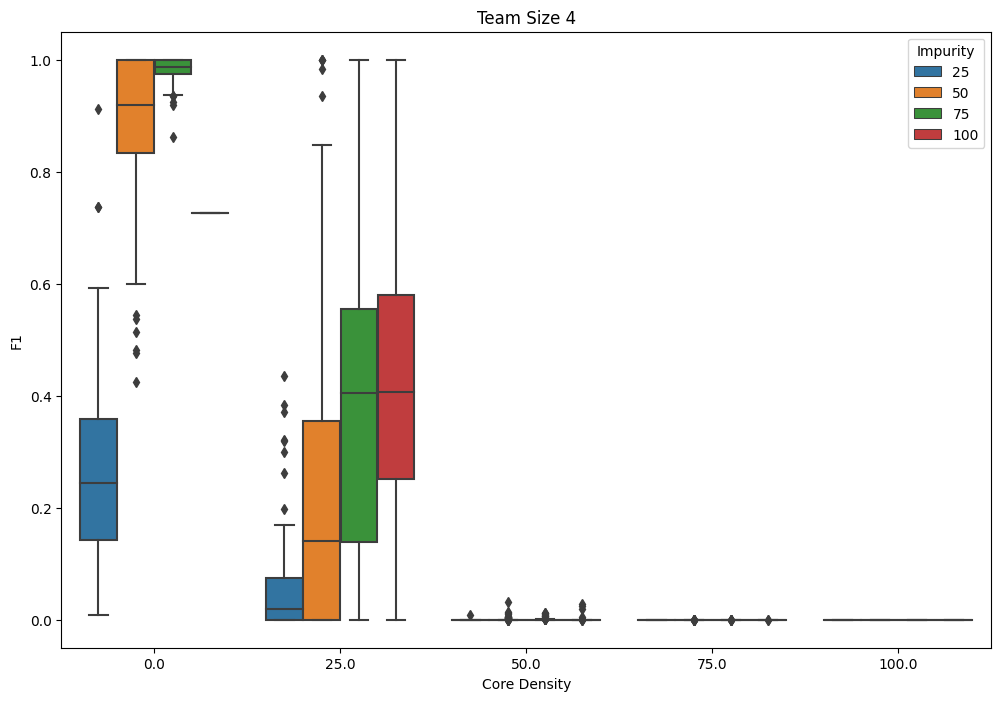

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='F1', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 4')

# Show the plot
plt.legend(title='Impurity')
plt.show()


In [119]:
melt_table_complete=pd.DataFrame(columns=['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size','Number_of_Self_Activations','Self Activation Status'])
melt_table_complete


Empty DataFrame
Columns: [index, Type, Core Density, CC AB, F1, Team_Strength, Team Size, Number_of_Self_Activations, Self Activation Status]
Index: []

In [120]:
BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_50/all_50', 'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_50_Impurity_00_Network_' , 50,  16 ,
                           ["N00","N01"],["N02","N03"], 
                           "With Self Activation", 0,1,17)

BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_50/all_50',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_50_Impurity_50_Network_' ,50,    16 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",50,1,17)


BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_50/all_50',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_50_Impurity_100_Network_' ,50,    16 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",100,1,17)





Team_Size_2/Density_50/all_50
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2
3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

6
7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

8
9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

10
11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12
13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16
[-0.37682165552458563, -0.7121359566719956, -0.714203198894176, -0.37791140642576, -0.37739575753345445, -0.37572546651491007, 0.00012471605229878133, -0.37784469370920587, -0.0003507694254322069, -0.3760135549923874, -0.0026647750207863447, -0.3772143678536755, 0.000717362741415706, -0.3785027418138478, -0.7484757513475037, -0.7493150393260577]
Team_Size_2/Density_50/all_50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

1
2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3
4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

5
6
7
8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

9
10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

11
12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

13
14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

15
16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.0004792643317823109, -0.4998755135190026, 0.7192123177065074, nan, -0.7082255009957786, -0.24957018923158353, 1.0, -0.5696468759605199, nan, -0.0028653718213359157, nan, -0.3166049980681629, nan, nan, -1.0, -0.31796642040892203]
Team_Size_2/Density_50/all_50
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2
3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

4
5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

6
7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

8
9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11
12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

13
14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

15
16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0]


/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0    50_With Self Activation_Network_1    0           50 -0.376822  0.374663   
1    50_With Self Activation_Network_2    0           50 -0.712136  0.749590   
2    50_With Self Activation_Network_3    0           50 -0.714203  0.750383   
3    50_With Self Activation_Network_4    0           50 -0.377911  0.376457   
4    50_With Self Activation_Network_5    0           50 -0.377396  0.375563   
5    50_With Self Activation_Network_6    0           50 -0.375725  0.373153   
6    50_With Self Activation_Network_7    0           50  0.000125  0.124547   
7    50_With Self Activation_Network_8    0           50 -0.377845  0.374747   
8    50_With Self Activation_Network_9    0           50 -0.000351  0.125107   
9   50_With Self Activation_Network_10    0           50 -0.376014  0.373647   
10  50_With Self Activation_Network_11    0           50 -0.002665  0.126083   
11  50_With Self Activation_Network_12    0           50 -0.377214  0.375610   
12  50_With Self Activation_Network_13    0           50  0.000717  0.124970   
13  50_With Self Activation_Network_14    0           50 -0.378503  0.374570   
14  50_With Self Activation_Network_15    0           50 -0.748476  0.874237   
15  50_With Self Activation_Network_16    0           50 -0.749315  0.874657   
0    50_With Self Activation_Network_1    0           50 -0.000479  0.124917   
1    50_With Self Activation_Network_2    0           50 -0.499876  0.249977   
2    50_With Self Activation_Network_3    0           50  0.719212  0.000000   
3    50_With Self Activation_Network_4    0           50       NaN  0.000000   
4    50_With Self Activation_Network_5    0           50 -0.708226  0.501583   
5    50_With Self Activation_Network_6    0           50 -0.249570  0.124800   
6    50_With Self Activation_Network_7    0           50  1.000000  0.000000   
7    50_With Self Activation_Network_8    0           50 -0.569647  0.187557   
8    50_With Self Activation_Network_9    0           50       NaN  0.000000   
9   50_With Self Activation_Network_10    0           50 -0.002865  0.126267   
10  50_With Self Activation_Network_11    0           50       NaN  0.000000   
11  50_With Self Activation_Network_12    0           50 -0.316605  0.186843   
12  50_With Self Activation_Network_13    0           50       NaN  0.000000   
13  50_With Self Activation_Network_14    0           50       NaN  0.000000   
14  50_With Self Activation_Network_15    0           50 -1.000000  1.000000   
15  50_With Self Activation_Network_16    0           50 -0.317966  0.187797   
0    50_With Self Activation_Network_1    0           50  1.000000  0.000000   
1    50_With Self Activation_Network_2    0           50  1.000000  0.000000   
2    50_With Self Activation_Network_3    0           50  1.000000  0.000000   
3    50_With Self Activation_Network_4    0           50  1.000000  0.000000   
4    50_With Self Activation_Network_5    0           50  1.000000  0.000000   
5    50_With Self Activation_Network_6    0           50  1.000000  0.000000   
6    50_With Self Activation_Network_7    0           50  1.000000  0.000000   
7    50_With Self Activation_Network_8    0           50  1.000000  0.000000   
8    50_With Self Activation_Network_9    0           50  1.000000  0.000000   
9   50_With Self Activation_Network_10    0           50  1.000000  0.000000   
10  50_With Self Activation_Network_11    0           50  1.000000  0.000000   
11  50_With Self Activation_Network_12    0           50  1.000000  0.000000   
12  50_With Self Activation_Network_13    0           50  1.000000  0.000000   
13  50_With Self Activation_Network_14    0           50  1.000000  0.000000   
14  50_With Self Activation_Network_15    0           50  1.000000  0.000000   
15  50_With Self Activation_Network_16    0           50  1.000000  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0      

In [121]:
BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_75/all_75', 'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_75_Impurity_00_Network_' , 75,  100 ,
                           ["N00","N01"],["N02","N03"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_75/all_75',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_75_Impurity_33_Network_' ,75,   100 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",33,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_75/all_75',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_75_Impurity_66_Network_' ,75,    100 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",66,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_75/all_75',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_75_Impurity_100_Network_' ,75,    100 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",100,1,101)





Team_Size_2/Density_75/all_75
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2
3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

4
5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

6
7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

8
9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

10
11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

12
13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

14
15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

16
17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

18
19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

20
21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

22
23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

24
25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30
31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33
34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

35
36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

37
38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41
42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

43
44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

45
46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

47
48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

49
50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54
55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

56
57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

60
61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62
63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65
66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

67
68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

79
80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

86
87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

88
89
90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-1.0, -0.7142990343776519, -1.0, -1.0, -1.0, -1.0, -0.8453818787878221, -0.9008437595068153, -0.4025557470991805, -1.0, -0.9999999999999999, -0.9018360505425919, -1.0, -0.400517346099812, -0.5040280981688549, -0.8287240918575163, -0.9999999999999999, -1.0, -1.0, -1.0, -0.8289854121399378, -1.0, -1.0, -0.5091654211539817, -0.5084055054416076, -0.6172631183190002, -0.844747692662152, -0.9259278535849319, -0.9008119168666157, -0.8281394097689847, -1.0, -0.5071051141753935, -1.0, -0.9014886733834122, -1.0, -0.8446981010498174, -0.40158430332206496, -0.9999999999999999, -0.5065525123104342, -0.8297832388555973, -1.0, -1.0, -0.8291093122201897, -0.9260360812757793, -1.0, -0.9999999999999999, -0.9999999999999998, -1.0, -0.9266027001404296, -0.8453033386725455, -0.3980182186403322, -0.7495224106160943, -0.39645092200010607, -0.39674933337745977, -1.0, -0.7502756168619501, -1.0, -0.39920173150077237, -0.9999999999999999, -1.0, -0.9250644099518506, -1.0, -0.6168897849563524, -0.4000600001651394

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7
8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

9
10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14
15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22
23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

24
25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

26
27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30
31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33
34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

35
36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

37
38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

39
40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

41
42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

43
44
45
46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

47
48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

49
50


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

51
52
53
54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

55
56
57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

59
60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

61
62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

63
64
65
66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

67
68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

69
70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

71
72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

75
76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

77
78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

79
80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

81
82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

83
84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

85
86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

87
88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

89
90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

91
92


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

93
94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

95
96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

97
98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

99
100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

[-0.8108328205549609, -0.49909136849173014, -1.0, -0.7670934224762779, -0.7074289209761034, -0.2950424349202918, nan, -1.0, nan, -0.6971789573758947, -0.4046818871858054, -0.3391891842202749, -1.0, nan, -0.14456972057437267, -0.476742388338858, -1.0, -0.6121138436057602, -0.4994815481207892, -0.725734345553853, -0.5771831269317502, -0.4310525238531511, -1.0, -0.4337132273719577, -0.7060803881259775, 0.6779471640407558, -0.6795708431888798, nan, -0.2865952183065688, -0.46674336852595877, -0.9999999999999999, -1.0, -1.0, -0.20821508000976366, -0.5596860388261549, -0.34758533649727735, -1.0, -0.33848024140014954, -0.5349429066139538, -1.0, -1.0, nan, -0.3593467910440847, -0.43029125135478546, -0.4062268370086756, -0.9999999999999999, nan, nan, -0.3520909513165505, nan, -1.0, -0.6549812884843846, -0.5001906882215926, nan, 0.0009682340316982393, -0.3384219086220363, nan, -0.8024167898591491, -0.5894374463811551, -0.6977895339691579, -0.40918455398588716, nan, nan, -0.5163417359422335, -1.0,

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

3
4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

5
6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

7
8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

9
10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

11
12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

13
14


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

15
16


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

17
18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

19
20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

21
22
23
24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

25
26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

27
28
29
30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

31
32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

33
34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

35
36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

37
38
39
40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

41
42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

43
44


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

45
46
47
48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

49
50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

51
52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

53
54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

55
56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

59
60
61
62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

63
64


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

65
66
67
68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

69
70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

71
72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

75
76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

77
78
79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82
83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

84
85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

89
90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94
95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

96
97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98
99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

100
[0.9999999999999998, 1.0, 0.8080864447911627, 7.757152433698158e-08, 0.3815344704132456, 0.6343454435170658, 0.0721541215247583, 0.3330551698715507, 0.14749180479394522, 0.8086646322879586, 0.43312461115698303, nan, nan, nan, nan, 0.5621626438883305, 0.4997894272313194, 0.05486435250905877, 0.9999999999999999, nan, 0.6066266099496819, 0.14357345509682348, 1.0, 0.3649523815373936, nan, nan, nan, 0.3387509576635671, -0.02219238448498505, 0.10645205638012303, 0.8405821445243574, 0.5365825663156996, 0.3806767374826808, 0.5597636887158147, 0.7069886453354497, nan, nan, 0.12395353927798045, 0.3657735476007204, 0.40925109777518826, 0.6150666033181736, nan, -1.069414299975893e-06, nan, 0.4578581934919656, 0.46270628357585764, 0.3608847199934916, -0.001605775694504556, 0.2471265850180158, 1.0, -0.06275704575210037, 0.11933672224010367, nan, 0.43332281014763974, 6.126796599208645e-06, -1.1662090853610875e-05, nan, nan, nan, 0.053763258028781465, 1.0, nan, nan, nan, nan, 0.053809916445392424,

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

2
3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5
6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

7
8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13
14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

15
16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18
19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

20
21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

23
24


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37
38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44
45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

46
47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

48
49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

50
51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

52
53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70
71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

72
73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97
98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

99
100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

[nan, 0.8878327014693278, 0.5669979557225617, 0.8856261181298004, nan, 0.6399841756460487, 0.8865740744455278, 0.9999999999999999, 0.8236200365830135, 0.9999999999999998, 1.0, 0.6390010196733766, nan, nan, 0.8878409250753587, 0.6406335763967903, 0.8910378723931724, nan, 0.5908434741152335, 1.0, 1.0, 0.846126543534329, nan, 0.8557229104599668, 0.6519436991878718, 0.5878949171534401, 0.8232696947664803, nan, 0.8329377435747737, 0.6418220881395276, 0.6364714696703213, 0.6677999045251608, 0.847130702980331, 0.9999999999999998, 0.8912460259597339, 1.0, nan, 0.640907458169021, 0.6215237084133031, 0.8334429335366027, 1.0, 1.0, 0.5652642728683736, nan, 0.6408774976601506, nan, 0.9999999999999999, nan, 0.8852895309804012, 0.5866474362013727, nan, 0.9999999999999999, 0.887257732224239, 0.6325980188039402, 1.0, 0.6396694719704952, 0.8335414180523059, 0.9999999999999999, 0.5676493695377381, 0.8457109381434694, 0.9999999999999998, 0.6660446270219095, 0.6526539147475031, 0.8546515124703333, 0.999999

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0     50_With Self Activation_Network_1    0           50 -0.376822  0.374663   
1     50_With Self Activation_Network_2    0           50 -0.712136  0.749590   
2     50_With Self Activation_Network_3    0           50 -0.714203  0.750383   
3     50_With Self Activation_Network_4    0           50 -0.377911  0.376457   
4     50_With Self Activation_Network_5    0           50 -0.377396  0.375563   
..                                  ...  ...          ...       ...       ...   
95   75_With Self Activation_Network_96    0           75  0.639976  0.000000   
96   75_With Self Activation_Network_97    0           75       NaN  0.000000   
97   75_With Self Activation_Network_98    0           75  0.634161  0.000000   
98   75_With Self Activation_Network_99    0           75  0.566687  0.000000   
99  75_With Self Activation_Network_100    0           75  1.000000  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[448 rows x 10 columns]

In [122]:
BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_100/all_100', 'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_100_Impurity_00_Network_' , 100,  1 ,
                           ["N00","N01"],["N02","N03"], 
                           "With Self Activation", 0,1,2)

BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_100/all_100',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_100_Impurity_25_Network_' ,100,   100 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",25,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_100/all_100',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_100_Impurity_50_Network_' , 100,    100 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",50,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_100/all_100',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_100_Impurity_75_Network_' , 100,    100 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",75,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_2/Density_100/all_100',  'Average_00_01' ,
                                 'Average_02_03', 
                                 'Team_Size_2_Density_100_Impurity_100_Network_' , 100,    1 ,
                          ["N00","N01"],["N02","N03"],
                           "With Self Activation",100,1,2)





Team_Size_2/Density_100/all_100
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.6650310874773121]
Team_Size_2/Density_100/all_100
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.739717830094864, -0.5494746222280443, -0.555435692085472, -0.37326294992696507, -0.19762881188776302, -0.29733465881413407, -0.4723860494174075, -0.8022905785527535, -0.37712904153037896, -0.25093972987449603, -0.9008485450079108, -0.4675591000355768, -0.4669841992818822, -0.5465570010184094, -0.7498878732256805, -0.7507326991340072, -0.2958411212486591, -0.5525939406730818, -1.0, -1.0, -0.46766536197463077, -0.6934152067859961, -1.0, -0.499322603993217, -0.7902234480517881, -0.7498909217859323, -0.8661955349561211, -1.0, -0.7079838975594573, -0.1971529322627982, -0.3761664704765669, -0.47545209077257794, -0.7499404339310602, -0.22132922795721732, -0.25080538021376586, -0.7192437592918411, -0.408461705295681, -0.7072255053395746, -1.0, -0.46754739973717574, -0.6608818797306327, -0.6938408836042345, -0.1675692881240669, -0.9999999999999999, -1.0, -0.46756960143338694, -0.3771410250036591, -0.7410480284941956, -0.7285900911887679, -0.7899089137362272, -0.901473221019849, -0.866039508

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

3
4
5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14
15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

16
17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21
22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24
25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

26
27
28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33
34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39
40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

41
42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

43
44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46
47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

48
49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51
52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

53
54
55
56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61
62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

68


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

69
70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78
79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

80
81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

82
83
84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94
95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

96


/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].asty

97
98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[nan, nan, nan, -1.096154502927461e-06, 1.0, -0.4993616602394619, 2.1926817270246877e-06, 0.0004157818099458515, -0.3144539794298214, 0.10848038272967536, -3.2833601573551555e-08, 3.7768671425399062e-06, 0.003736429697671169, nan, 0.5010933988409236, nan, -0.4998267598703193, -2.499105579723973e-06, 0.16754874202743336, -7.343156188353773e-06, nan, 1.1465777579973171e-05, -0.0050991346442355685, nan, nan, -3.413269884805628e-06, nan, 0.002730272173539504, 0.001082664345886434, -3.1550400512189694e-06, 0.5002485758769033, 2.854630387017014e-07, nan, 0.5977283467377357, -0.37581005746116947, 0.47528725137307604, -1.0, -5.084607421834297e-06, nan, -0.3140117800368755, nan, nan, -0.4714759265516486, 4.899751027936569e-07, 1.1203713260106189e-06, nan, nan, 0.0019718493732187683, -0.37408184464232047, -0.11138900986325823, nan, nan, nan, -0.14587307487003306, nan, -0.0006136440329757478, nan, -0.00030101673856498004, 2.7289196271243693e-08, 1.581789289063369e-06, nan, 0.14632989407458455, 1.

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2
3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

4
5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

6
7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9
10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12
13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17
18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

19
20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22
23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31
32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

33
34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42
43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

44
45
46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

47
48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50
51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

52
53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

54
55
56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63
64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

65
66
67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82
83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

84
85
86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

87
88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92
93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98
99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/home/user/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(war

100
[1.0, nan, 0.49942763133410784, nan, nan, 0.3326934010587471, -3.055373548848552e-06, 1.0, nan, 5.475485528369545e-07, 0.5446244684130794, nan, 1.0, 1.2096048664283743e-07, 0.5422464388287064, 0.3542566643745463, nan, 0.9999999999999998, nan, 0.5454466694071181, 0.5012935386775735, nan, 0.45024196528194277, 0.4477426275437513, 0.333771838569911, 1.0, 1.0, 1.0, 1.3042068373485713e-06, 1.0, nan, nan, -5.2267887495318505e-06, 0.5007928639549412, 0.3519812132617638, -8.673882844610971e-07, 1.0, 1.0, -7.188355073892188e-06, 4.46923804441657e-06, 1.0, nan, nan, 0.49967635578298536, nan, 1.0, nan, 0.9999999999999998, 0.9999999999999999, nan, 0.40272176870929327, nan, nan, 0.4004671664415291, nan, nan, 0.49864353667322303, 1.0, 0.49996417075769334, 1.0, 0.2740379905011597, 0.5343427496224131, nan, nan, 0.40087822119722005, nan, 1.0, 0.2718455732466838, 0.27238691241138335, 0.3542999128214918, 1.0, 0.9999999999999999, nan, -2.9493171820533175e-06, 1.3060831180707075e-05, 0.5351928395595714,

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[1.0]


/tmp/ipykernel_492584/1941344423.py:55: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'CC AB']= Corr_list
/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB  \
0      50_With Self Activation_Network_1    0           50 -0.376822   
1      50_With Self Activation_Network_2    0           50 -0.712136   
2      50_With Self Activation_Network_3    0           50 -0.714203   
3      50_With Self Activation_Network_4    0           50 -0.377911   
4      50_With Self Activation_Network_5    0           50 -0.377396   
..                                   ...  ...          ...       ...   
96   100_With Self Activation_Network_97    0          100  1.000000   
97   100_With Self Activation_Network_98    0          100       NaN   
98   100_With Self Activation_Network_99    0          100       NaN   
99  100_With Self Activation_Network_100    0          100  0.543422   
0     100_With Self Activation_Network_1    0          100  1.000000   

          F1 Team_Strength Team Size Number_of_Self_Activations  \
0   0.374663             0         0                          0   
1   0.749590             0         0                          0   
2   0.750383             0         0                          0   
3   0.376457             0         0                          0   
4   0.375563             0         0                          0   
..       ...           ...       ...                        ...   
96  0.000000             0         0                          0   
97  0.000000             0         0                          0   
98  0.000000             0         0                          0   
99  0.000000             0         0                          0   
0   0.000000             0         0                          0   

   Self Activation Status  Impurity  
0    With Self Activation       0.0  
1    With Self Activation       0.0  
2    With Self Activation       0.0  
3    With Self Activation       0.0  
4    With Self Activation       0.0  
..                    ...       ...  
96   With Self Activation      75.0  
97   With Self Activation      75.0  
98   With Self Activation      75.0  
99   With Self Activation      75.0  
0    With Self Activation     100.0  

[750 rows x 10 columns]

In [159]:
melt_table_complete = pd.read_csv("Team_Size2.csv")

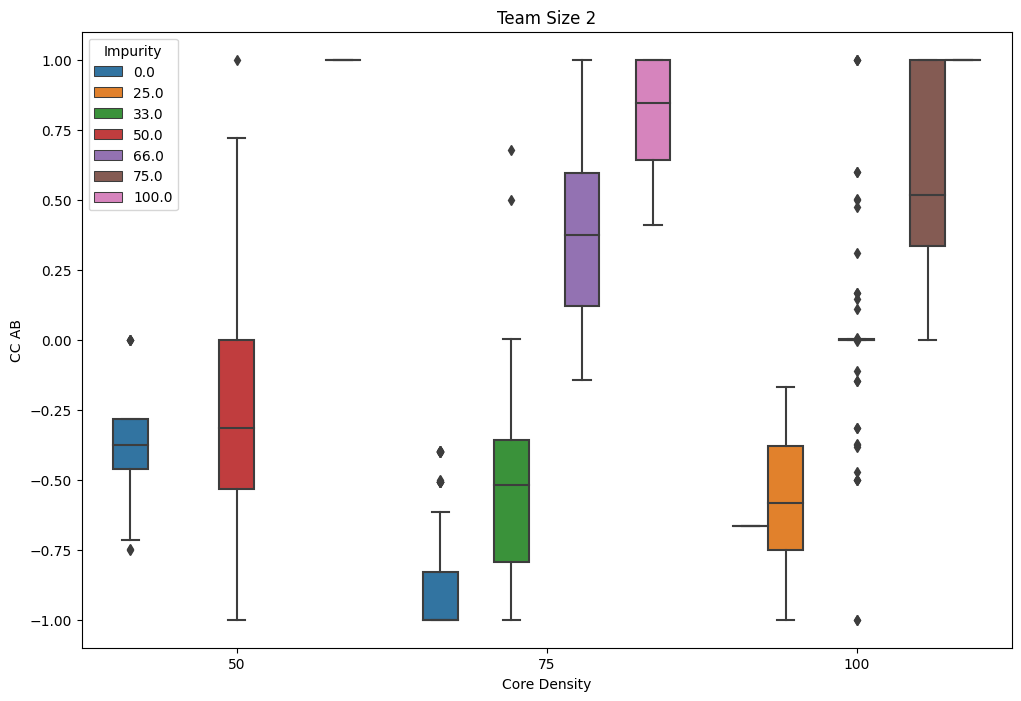

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='CC AB', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 2')

# Show the plot
plt.legend(title='Impurity')
plt.show()


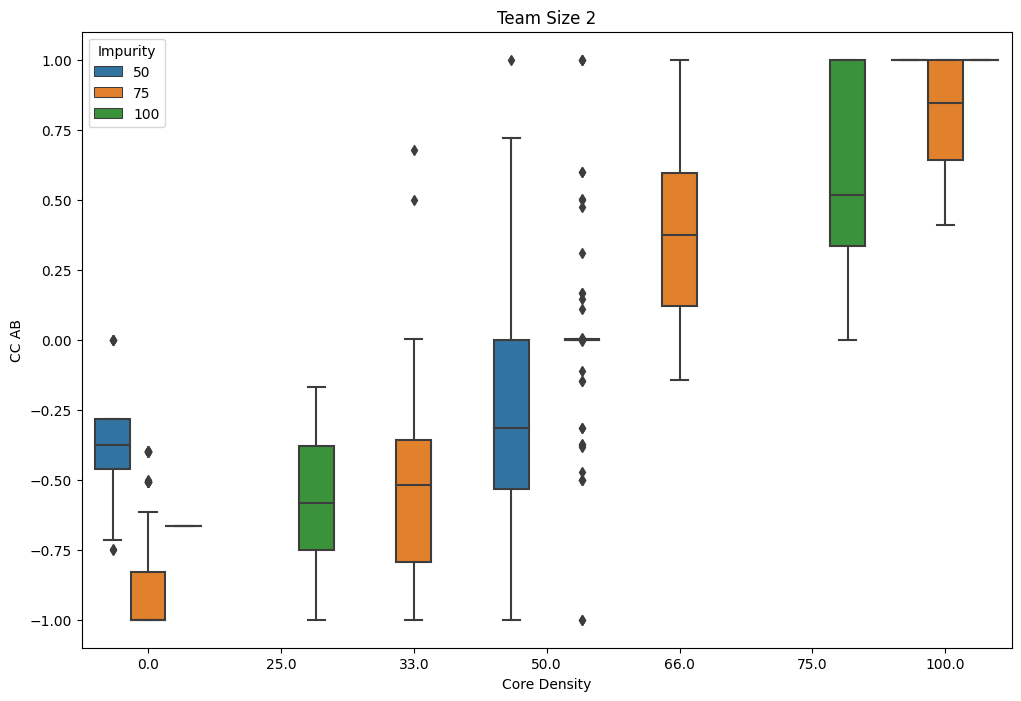

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='CC AB', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 2')

# Show the plot
plt.legend(title='Impurity')
plt.show()


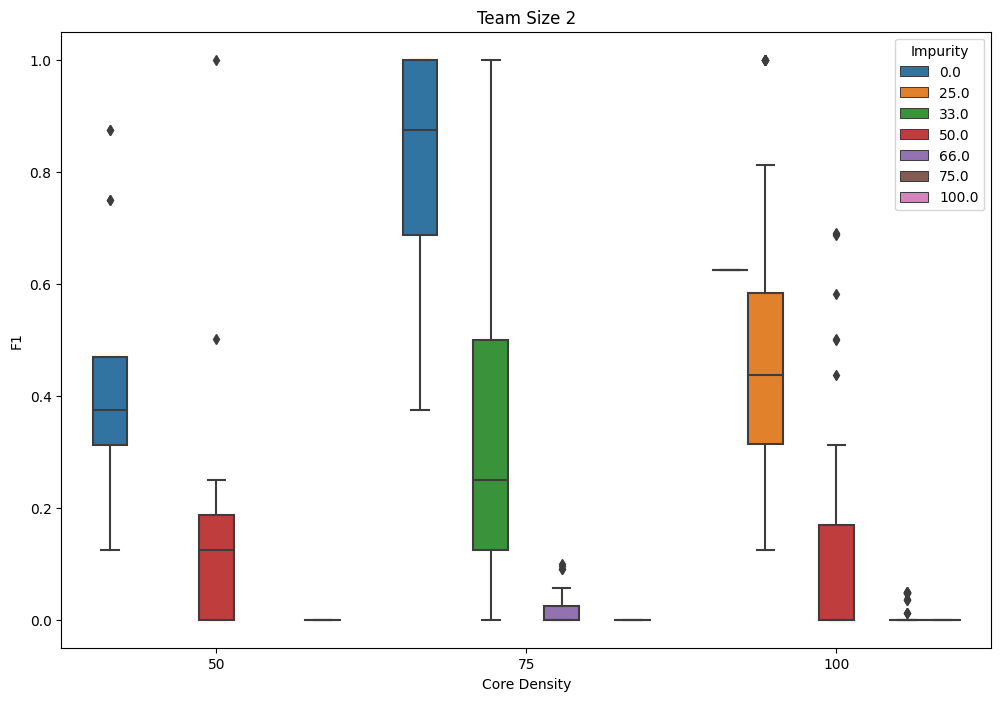

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='F1', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 2')

# Show the plot
plt.legend(title='Impurity')
plt.show()


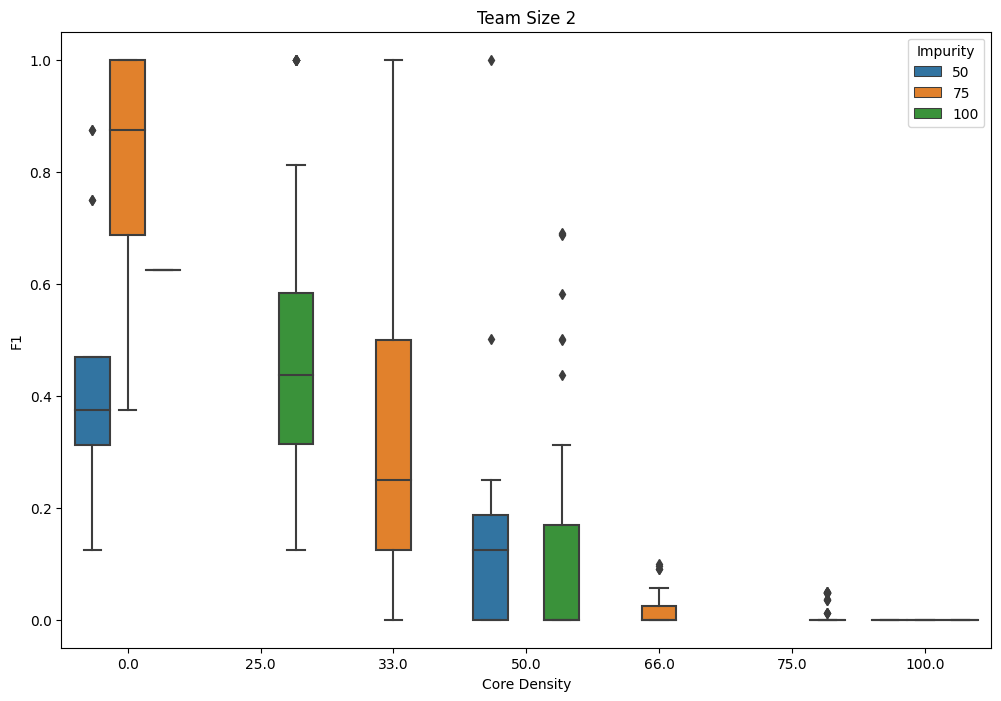

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='F1', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 2')

# Show the plot
plt.legend(title='Impurity')
plt.show()


In [131]:
melt_table_complete.to_csv('Team_Size2.csv')

In [192]:
melt_table_complete=pd.DataFrame(columns=['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size','Number_of_Self_Activations','Self Activation Status'])
melt_table_complete


Empty DataFrame
Columns: [index, Type, Core Density, CC AB, F1, Team_Strength, Team Size, Number_of_Self_Activations, Self Activation Status]
Index: []

In [193]:
BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_3_9/all_3_33', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_3_9_Impurity_0_3_9_Network_' , 33,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_3_9/all_3_33','Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_3_9_Impurity_1_3_9_Network_' ,  33,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",33,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_3_9/all_3_33','Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_3_9_Impurity_2_3_9_Network_' ,  33,   100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",66,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_3_9/all_3_33', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_3_9_Impurity_3_3_9_Network_' ,  33,    100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",100,1,101)




Team_Size_3/Density_3_9/all_3_33
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

88


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.5710789615011462, -0.8897365595393534, -0.7795207956998108, -0.7640845115840117, -0.9376017569372189, -0.9377539412163434, -0.5358828548029642, -0.49948448238113563, -0.270907211277458, -0.269877927231342, -0.5017062381914638, -0.9248860555711017, -0.7473464939041118, -0.2717170648820652, -0.7407105305875158, -0.7497025520457476, -0.9257840225970734, -0.2730058436476604, -0.273535192208657, -0.7620433553741315, -0.780861230210481, -0.5527083885149783, -0.5985556396927295, -0.49804150444471285, -0.7633610476639702, -0.9367599506984707, -0.2742300266637844, -0.7488287798000959, -0.7807765642440606, -0.49883167148358426, -0.7624690556377284, -0.7656191235682596, -0.9258974687423301, 0.0019085527287168943, -0.9369020347118019, -0.5530047333359734, -0.6011775500638831, -0.7393085257635637, -0.2692831292831113, -0.5030627260072363, -0.5527151436648767, -0.2742778334398801, -0.7799183987841188, -0.7673290263833419, -0.7786839617736366, -0.7713741162656202, -0.57001993981199, -0.5369378951

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

19


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.317020243100547, 0.3471469025307963, -0.255528719435397, -0.18252540838744613, -0.0020789750079148127, -0.4507789003827926, 0.001130573660121512, -0.639269006322348, -0.7705098085184792, -0.9302362831417889, 0.9274081703198888, 0.002001534366848377, -0.3306473000469717, -0.9058312689345284, -0.8974388802801027, -0.3117748705759538, -0.4721078888022038, 4.1726477394776786e-05, 0.0012010299514163144, 0.6278328784707553, -0.48648844034446026, -0.37938350769487805, 0.0010345859556361043, -0.10214825752710488, -0.48751584964848554, -0.9044146359102019, -0.16051465397121, -0.2756462488802265, -0.38854699030217565, -0.2435466661564739, -0.18228577356198739, 0.12411836934476439, -0.657497532454372, -0.0007812263637457595, 0.12027633880514017, -0.44846589719776025, -0.3503789290151568, -0.4378658869533383, -0.33671961125127503, -0.5836073549069889, -0.1006236916321022, 0.9092825441707891, 0.249265527975053, 0.27420420626758935, 0.9628982991829352, -0.4810772700839693, -0.3313516759823041, -

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

98
99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.2973422766290931, 0.9233113900788271, 0.7619470917386647, 0.3109388510310342, -0.022471301411535208, 0.0015997708209471166, 0.6667545480373229, 0.6621167761371056, -1.0, -0.46801211186656827, 0.3889867777975957, -0.07508870765373528, -0.7346374457411065, -0.35928607494865705, -0.4185751421339682, 1.0, 0.09771424855492197, 0.7510012302026979, 0.4463008189951798, -0.3112356058641322, -0.9151869315680405, 0.27124513666740313, 0.9173398601008081, 0.5724867932023364, 0.19401483545463627, 0.47250490556992414, -0.7567619206483057, -1.0, -0.1156700967286824, 0.5508164329345195, -0.12931465630354919, 0.6882480170678376, 0.2948342043803735, -0.4415385229895529, -0.20678673268624212, 0.0002974982559450147, 0.6581034370595339, 0.7116070459130708, 0.3272074832800895, 0.0003831731439299893, 0.9656444147259908, 0.22643889889662105, -0.3976065603661161, -0.4242401218265065, 0.745675518061318, 0.527863132960537, 0.5588148524589911, 1.0, -0.8442216592377834, 0.8944272399750773, 0.2870266929325554, -0

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals`

2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92
93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98
99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 0.8311060586589212, 0.8289177337941008, 0.12371772308321109, 0.8986186198737022, 1.0, 0.8319077457816465, 1.0, 1.0, 0.8297756106863102, 1.0, 1.0, 0.42461559017559947, 0.8304905116309464, 0.8307354922248945, 0.5478444140504425, 0.6989741265325005, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.8311218959352304, 0.8979866887973259, 0.9999999999999999, 0.8304494659277302, 0.42663172397520743, 0.8318107319708835, 0.6413968823109921, 1.0, 0.6444183423596179, 1.0, 1.0, 0.831578062079047, 1.0, 1.0, 0.9999999999999999, 1.0, 0.5475981433467595, 0.9999999999999998, 0.4293744038451817, 0.49229448280242305, 1.0, 0.9999999999999998, 0.8322702736062517, 0.8300971274920512, 1.0, 0.9999999999999999, 1.0, 0.494745776680857, 1.0, 0.8316565020323613, 0.12596573138262124, 1.0, 1.0, 0.9999999999999998, 0.12806078061692758, 1.0, 1.0, 0.5491747844798872, 1.0, 1.0, 0.12867139831141408, 1.0, 1.0, 0.8307351856154694, 1.0, 0.42471488529068885, 0.4

/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB        F1  \
0     33_With Self Activation_Network_1    0           33 -0.571079  0.239973   
1     33_With Self Activation_Network_2    0           33 -0.889737  0.618320   
2     33_With Self Activation_Network_3    0           33 -0.779521  0.520997   
3     33_With Self Activation_Network_4    0           33 -0.764085  0.494423   
4     33_With Self Activation_Network_5    0           33 -0.937602  0.968800   
..                                  ...  ...          ...       ...       ...   
95   33_With Self Activation_Network_96    0           33  1.000000  0.000000   
96   33_With Self Activation_Network_97    0           33  0.831600  0.000000   
97   33_With Self Activation_Network_98    0           33  1.000000  0.000000   
98   33_With Self Activation_Network_99    0           33  0.131421  0.000000   
99  33_With Self Activation_Network_100    0           33  1.000000  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[400 rows x 10 columns]

In [194]:
BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_5_9/all_3_55', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_5_9_Impurity_0_5_9_Network_' , 55,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_5_9/all_3_55','Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_5_9_Impurity_1_5_9_Network_' ,55,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",20,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_5_9/all_3_55','Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_5_9_Impurity_2_5_9_Network_' ,  55,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",40,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_5_9/all_3_55', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_5_9_Impurity_3_5_9_Network_' ,   55,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",60,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_5_9/all_3_55', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_5_9_Impurity_4_5_9_Network_' ,   55,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",80,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_5_9/all_3_55', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_5_9_Impurity_5_5_9_Network_' ,  55,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",100,1,101)






Team_Size_3/Density_5_9/all_3_55
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3
4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28
29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32
33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

34
35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

36
37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

38
39
40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42
43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46
47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

48
49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52
53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59
60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

76
77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83
84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

85
86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88
89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-1.0, -0.9483973158423099, -0.9999999999999999, -0.9149869655800728, -1.0, -0.9107869867729226, -1.0, -1.0, -0.9999999999999999, -0.994451744939409, -0.9304042308596119, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9008064347715983, -0.9920889985082189, -0.9885990737909073, -0.693070696730623, -1.0, -0.99007104077345, -0.9999999999999999, -1.0, -0.7966742626872726, -0.9214199865418536, -1.0, -0.945016555003078, -0.7138553193574746, -1.0, -0.9309356214626449, -1.0, -1.0, -0.9008353946647608, -1.0, -0.9998270691691282, -0.9088344271058102, -0.9772323460748932, -0.9984734044248718, -1.0, -1.0, -0.9999999999999999, -1.0, -0.6551132744977712, -0.9999999999999998, -0.99413319664082, -1.0, -1.0, -0.932275919426631, -1.0, -0.8990713981767546, -0.9077718758268014, -0.8795403085183071, -0.9935815779771401, -0.9985429264729613, -0.8973028703793304, -1.0, -0.9493677045403394, -0.9288215027051672, -1.0, -0.8901570065686003, -1.0, -0.9126112741032253, -0.9939157584700181, -0.9999999999999999, -0.99963913490862

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4
5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10
11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

12
13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53
54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60
61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

62
63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

64
65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

66
67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

68
69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

75
76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

77
78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

79
80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

81
82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.9057679852023124, -0.9999999999999999, -1.0, -0.7497614573261973, -0.9966617345397465, -1.0, -0.9999999999999999, -0.8601320914407427, -1.0, -0.9997395007725095, -0.9017951119033232, -0.9272989469102848, -1.0, -1.0, -1.0, -1.0, -0.885620185946391, -0.9999999999999999, -1.0, -0.9153617186839377, -0.9267409225328441, -0.9268079327036431, -0.9613012911139128, -0.8864853477324313, -1.0, -0.9994471971107324, -0.9999384572376139, -0.9988533231762267, -1.0, -1.0, -0.9999999999999999, -0.9431443427762789, -0.9377353300143715, -0.6485086205187318, -0.9233112373128134, -0.7928369696575444, -0.9995801936693633, -0.9920245356709355, -0.9971146319553116, -1.0, -0.9974125432677781, -0.9088452659156118, -0.9999999999999999, -0.9966516114387038, -1.0, -0.8354163643846014, -0.7390259289565833, -1.0, -0.9954174318446606, -0.9964219712143146, -0.9970593934209192, -0.9999999999999999, -0.79925440917689, -0.9983160278266463, -0.9999419798662512, -0.9914582401712946, -0.8927321079447738, -1.0, -0.899810

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17
18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26
27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29
30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32
33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.748217862916102, -0.9010377841357559, -0.8944281301060398, -0.8169220123781813, -0.5529065344263323, -0.8708934204451892, -1.0, -0.5754584370668419, -0.8175490425922719, -0.6230227381775271, -0.7014538690819477, -0.33537459802554326, -0.9349163338075619, -0.9420481641162813, -0.8234401648034103, -0.9360546040229301, -0.9999999999999999, -0.8653515575558665, -0.9817474452211935, -0.671418060177447, -0.7379212488454409, -0.8947584891341919, -0.879074409239005, -0.8768880642971676, -0.878395084787397, -0.7618082809546824, -0.6355356448673002, -0.9999999999999998, -0.9102934480718604, -0.902108329332309, -0.8478563191832453, -0.5050574195270204, -0.8015262545807612, -0.9268742307792209, -0.5849961986332678, -0.761389957254829, -0.9999999999999999, -0.9999999999999999, -1.0, -0.6548769454190821, -0.7754047408502351, -0.6620332979851983, -1.0, -0.6058200252607363, -0.9017662622575361, -0.5445514409698211, -1.0, -1.0, -0.7079847101619977, -0.5823798081332009, -0.9660022303864763, -0.91870

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.9177450027184096, -0.956457370306681, -0.43052961345352975, -0.4326680403222372, -0.6365166737873892, -0.9167945436105831, -0.4476552359535363, -0.9044886747649725, -0.9219824444759723, -0.6390486134190213, 0.0443032046056121, -0.8430614167113141, -0.8756949525572744, -0.8968950781702962, -0.9115933399423418, -0.9999999999999999, -0.7586808922326275, -0.7784781489068997, -0.46392646309472646, -1.0, -1.0, -0.8146452118507814, -0.9028309140505765, -0.6847824450523603, -0.7065845680854042, -0.9195473951746224, -0.7059363732617414, -0.9996840664283058, -0.7265334178347287, -0.8494761077674379, -0.9999999999999999, -0.8686344871307571, -0.15267063985713172, -0.6965287342939741, -1.0, -1.0, -1.0, -0.7046960395513467, -1.0, -0.6335377929719467, -1.0, -1.0, -0.8078752591401597, -0.8052880819910075, -0.9999999999999999, -0.894620379301459, -0.31826397926658473, -0.17958959603757643, -1.0, -0.7494064629602282, -0.67422216911472, -0.7894687773044372, -0.6427911108840602, -0.4826454257628202, 

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

82


/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.661919909188688, -0.34786021222012753, -0.06709577687453314, -0.9116660766521263, -1.0, 1.0, -0.5372274639289836, 0.38024529459926554, -0.6841791262704989, 0.9999999999999999, -0.9999999999999999, 0.9905065459638572, -0.5071690018320024, 0.9541431125887827, -0.38394795195145287, 0.9999999999999999, -0.3302088449814138, -0.1713112058102156, -0.841400246705998, -0.12706413471276645, 0.900977061842661, 0.7565399396740939, 0.08591306313185809, -0.4358527965943118, -0.8977456121653217, -0.20035298626996081, -0.35981035995391103, -0.9999999999999999, -0.8944279516496227, 0.91138249358592, -0.0018530571447829096, 0.04386563073564311, -0.8864616836921999, -0.906516931880362, -0.8614536044027804, 1.0, 1.0, 0.9999999999999999, 0.25780807929231164, -0.8001458761555198, -0.9608713307591152, -0.052608807189172185, 0.6353734728678231, -0.7753947230376914, -1.0, 0.8894972069068926, -0.9086504121463516, -0.40649781047317196, -0.38940264329395263, -0.6558799384911931, -0.9109256896269404, -0.291194

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.39532328663002986, -1.0, -0.590438853350467, -0.49084811868376993, -0.8470368095541978, -1.0, 0.9999999999999999, -0.782590368490145, -0.06812741124831667, 0.472500000944567, 0.8162851534778096, -0.6068519221340527, 0.9999999999999999, -0.3429770132163912, -0.09570596155844453, -0.29974032531699674, 0.1798447289220366, -0.5424151256932845, -0.3773858319786942, -0.8285103269710836, 0.9999999999999999, -0.6626360738367573, -0.4283629029291801, -0.2663837065492421, 0.9012608377315441, -0.1926668581579928, 0.2933383850362859, -0.11137737639359031, -0.9999999999999999, -0.4998886977784695, -0.8229834861300902, -0.7492391604784634, -0.9127706470209139, 0.16614383820017772, -0.590675324811746, -0.4170169357937088, 0.2476711073923554, -0.48830517197895873, -0.9999955074419743, -0.4362607966096081, -0.9022287398851504, -0.9999999999999999, 0.16727428435792263, -0.3268301543675796, -0.9748954785307807, 0.41599679991324157, -0.2698654850585531, 0.563634408588631, -0.25395391136460194, 1.0, -0

index Type Core Density     CC AB        F1  \
0     33_With Self Activation_Network_1    0           33 -0.571079  0.239973   
1     33_With Self Activation_Network_2    0           33 -0.889737  0.618320   
2     33_With Self Activation_Network_3    0           33 -0.779521  0.520997   
3     33_With Self Activation_Network_4    0           33 -0.764085  0.494423   
4     33_With Self Activation_Network_5    0           33 -0.937602  0.968800   
..                                  ...  ...          ...       ...       ...   
95   55_With Self Activation_Network_96    0           55 -0.501769  0.000000   
96   55_With Self Activation_Network_97    0           55 -0.936309  0.000000   
97   55_With Self Activation_Network_98    0           55 -0.821821  0.077287   
98   55_With Self Activation_Network_99    0           55 -1.000000  0.000000   
99  55_With Self Activation_Network_100    0           55 -0.881995  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[1000 rows x 10 columns]

In [195]:
BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_77', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_7_9_Impurity_0_7_9_Network_' , 77,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation", 0,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_77','Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_7_9_Impurity_1_7_9_Network_' ,  77,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",14,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_77','Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_7_9_Impurity_2_7_9_Network_' ,  77,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",29,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_77', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_7_9_Impurity_4_7_9_Network_' ,   77,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",57,1,101)


BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_77', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_7_9_Impurity_6_7_9_Network_' ,    77,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",86,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_77', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_7_9_Impurity_7_7_9_Network_' ,   77,  100 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",100,1,101)






Team_Size_3/Density_7_9/all_3_77
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7
8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

9
10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

11
12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19
20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22
23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

24
25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

26
27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29
30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

31
32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

33
34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36
37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39
40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

41
42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

43
44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

45
46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

47
48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

49
50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

51
52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

53
54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

55
56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

57
58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

59
60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

61
62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

63
64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

65
66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69
70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

71
72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

73
74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either 

75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-1.0, -0.9995375314813878, -0.9966290181524539, -1.0, -1.0, -1.0, -0.9995575545060291, -1.0, -0.9972812175064106, -0.999802972753829, -1.0, -1.0, -0.9999380830093207, -1.0, -1.0, -1.0, -0.9999407805976869, -0.9997707028011668, -0.9995329553743688, -1.0, -0.9999414533294922, -0.9997650900266604, -1.0, -1.0, -1.0, -0.9995452785413416, -0.9999999999999999, -0.8698708361283151, -1.0, -0.9999396542944333, -0.9999422905933989, -1.0, -0.9064957470848124, -0.999548080481582, -1.0, -1.0, -0.9970641064979159, -0.9999407635114005, -0.9982420736556341, -0.9998586586956678, -0.99899782662745, -1.0, -0.9998317793734763, -0.9631215723682643, -0.9297982359050173, -0.9999999999999999, -0.9999404513527331, -1.0, -1.0, -0.9991362099925821, -0.9999999999999999, -0.9999999999999999, -0.9999378038323142, -0.9625903959055185, -0.9999999999999999, -0.9999999999999999, -0.9999999999999999, -0.9995072789740312, -0.9996523014400299, -0.9999419557056994, -1.0, -0.999801959736486, -0.9999433679190718, -0.99982917

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-0.9983007436166289, -0.9999999999999999, -0.9995200700052584, -0.9280602411749166, -1.0, -0.9996726943701185, -1.0, -0.8286496490733645, -0.9999432957536166, -0.9978236507262076, -0.9999999999999999, -0.9995446628670386, -0.9930300488894103, -0.9967837384482382, -1.0, -0.8056320637797142, -0.9967061435895801, -1.0, -0.9712814279443893, -1.0, -1.0, -1.0, -0.9996402515897405, -0.9995389516014671, -1.0, -0.8755411801750597, -1.0, -0.9999442209210228, -1.0, -0.9999999999999999, -0.9995568125484459, -0.9995514258940077, -1.0, -1.0, -0.9999398815887728, -0.9995356322329515, -0.9999999999999999, -0.9910872612121449, -0.9995495972288088, -1.0, -0.9999400302990614, -0.998594023532694, -0.9999999999999999, -0.9999393785050374, -0.9961809359105455, -0.916308439410974, -0.9995402410202696, -0.9997794513685416, -0.8933274934799829, -1.0, -1.0, -0.9997541674072552, -0.9273107169877085, -1.0, -1.0, -1.0, -0.9997676081616804, -0.9995170768551656, -0.9987634920070477, -0.9997498237850867, -1.0, -0.82

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[-1.0, -0.9086826241324774, -0.9035837484814487, -0.9999599899172484, -0.8950906760462213, -0.9251748148998558, -0.9366194890909136, -0.9182267863340985, -0.764677994510541, -1.0, -1.0, -0.9490190745473988, -0.9345402571510532, -0.8086750632912865, -0.9299124174935712, -0.899740181060959, -0.8469629818628122, -0.8991220156560815, -0.9102617771722968, -0.9261161701510687, -1.0, -1.0, -0.8419095836998309, -0.9226445943522197, -0.8482140485057275, -1.0, -0.7055741941834944, -0.7895335618094667, -0.9892884292328944, -0.9874273714138673, -0.9251336525693322, -1.0, -0.9642768043171781, -0.9255354418041679, -0.9026874935149246, -0.8946369000234635, -1.0, -1.0, -0.8452486841734891, -0.951078424398202, -1.0, -0.9999999999999999, -0.9051187860676779, -0.8778218282907804, -0.8937817573580065, -0.9641100826029873, -0.9031699845369923, -0.9860301980223919, -0.9999999999999999, -0.8874157002897337, -0.9111642692966484, -0.9356194543263402, -0.8343751252182608, -0.5647211781426136, -0.934616450768844

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.11435584006521252, -1.0, -0.12040018131852225, 0.0012479474827755991, -0.999869578749937, 0.34946774750729287, 0.402631634331934, -0.3239692658864505, 0.617470281249844, 1.0, -0.9134770856874195, 0.6530426407713945, -0.4357081128593444, 0.9997349294032442, -0.9999429891539737, -0.3164819594391926, 0.65394675175622, -0.7332718844850054, 0.22979424161765932, -0.9999985019101632, 1.0, -0.21094823544892222, 0.37322162316978125, -0.12539068355548452, -0.9416154534121368, -0.3886193680938819, 0.21424858717607323, -0.42298997451463416, -0.08105482480760337, -0.8937824195622459, -0.6032325154102868, 0.051229789835836884, -0.17295256145486756, 0.8968955055896196, -1.0, -0.7537968147835418, -0.0060925669495876964, -0.8966936407903906, 0.20696493522146062, -1.0, -1.0, -0.8951145773650221, -0.7158466413902379, -0.40007050092425656, -0.3269967451629648, 0.3873732821969575, -1.0, -1.0, -0.2675067792660008, -0.4245218718733177, -0.7845010806447991, 1.0, 1.0, 1.0, -0.6923290878202849, 1.0, 0.229760

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.8944243587893519, 0.898567699761673, -0.13906650316091096, 0.011536564333279738, -0.9999999999999999, 0.6382364948504686, 0.6889703067217716, -0.6624406722581698, 0.9180178038558456, 0.9999999999999999, -0.11557745287476733, 0.45621439119811036, -0.017297193956598463, -1.0, -0.017612847262565838, -0.5870267207993045, -0.02735260330001133, 0.0012722798302592076, -0.2883234335644149, 0.0657790802398108, -0.4777122483120926, 0.9999805032018563, 0.9999999999999999, 0.5726557373107973, -0.3273442025138227, 0.530744414890812, -0.3471988125975399, 1.0, 1.0, 0.2661103066820462, 0.9999999999999999, -1.0, -0.5601089494782463, 0.5548622940147305, -0.971251134256455, 0.3972997110189689, 0.9999999999999999, -0.9999864978965356, 0.5606340609100888, -0.2777117133179562, -0.9999999999999999, 0.2813419562272633, -0.3710541443580684, 0.27829763546829867, -0.9003174096390429, -0.9999940000059586, -0.5071342242289577, 2.005891440536624e-05, 0.16881686381665045, 0.5630299417601856, 0.3836246026999052, 0

/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


2


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


3


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


4


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


5


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


6


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


7


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


8


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


9


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


10


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


11


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


12


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


13


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


14


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


15


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


16


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


17


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


18


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


19


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


20


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


21


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


22


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


23


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


24


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


25


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


26


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


27


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


28


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


29


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


30


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


31


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


32


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


33


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


34


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


35


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


36


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


37


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


38


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


39


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


40


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


41


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


42


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


43


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


44


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


45


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


46


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


47


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


48


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


49


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


50


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


51


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


52


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


53


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


54


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


55


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


56


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


57


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


58


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


59


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


60


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


61


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


62


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


63


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


64


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


65


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


66


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


67


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


68


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


69


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


70


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


71


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


72


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


73


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


74


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


75


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


76


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


77


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


78


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


79


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


80


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


81


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


82


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


83


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


84


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


85


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


86


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


87


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


88


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


89


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


90


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


91


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


92


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


93


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


94


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


95


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


96


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


97


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


98


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


99


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


100


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[0.5479190636728617, 0.6571119893930611, 0.15222746973558404, 0.5224734378975635, -0.4989336259083263, 0.2036117497916762, -0.9999999999999999, 0.9999999999999999, 1.0, 0.43703630131897697, -0.0018520130299712737, 0.36108784235705316, 0.29625751556163504, 0.5617237568178914, 0.41625306074799606, 0.8983424235301629, 0.9999999999999999, 0.16935928090128397, 0.11875625773741003, 0.6575505316570898, 0.35901057680229914, 1.0, 0.9999999999999999, -0.7294784826812626, 0.1335425148197749, 0.6160784315180078, -0.20563892183888993, 0.6287771884704412, 0.7669149639615084, 0.7524921767514299, -0.4184294879528374, 0.8887709273487542, 0.45187558873384087, 0.9999985047643052, 0.21097684467994196, 0.8942870288851087, -1.0, 0.1379602724654946, 1.0, -0.31854719996994646, 1.0, 0.9999999999999999, 0.24245030649346372, 1.0, -1.0, 0.29435943227221184, 1.0, 0.9999999999999999, 1.0, 1.0, 0.10605608923758293, 0.0025175416638448726, -0.06492656738609916, 0.24999875715483336, 0.7827890217519072, 1.0, -0.38182371

index Type Core Density     CC AB        F1  \
0     33_With Self Activation_Network_1    0           33 -0.571079  0.239973   
1     33_With Self Activation_Network_2    0           33 -0.889737  0.618320   
2     33_With Self Activation_Network_3    0           33 -0.779521  0.520997   
3     33_With Self Activation_Network_4    0           33 -0.764085  0.494423   
4     33_With Self Activation_Network_5    0           33 -0.937602  0.968800   
..                                  ...  ...          ...       ...       ...   
95   77_With Self Activation_Network_96    0           77  0.656680  0.004533   
96   77_With Self Activation_Network_97    0           77  0.419718  0.000000   
97   77_With Self Activation_Network_98    0           77  1.000000  0.000000   
98   77_With Self Activation_Network_99    0           77  1.000000  0.000000   
99  77_With Self Activation_Network_100    0           77  0.086453  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
4              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

    Impurity  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
95     100.0  
96     100.0  
97     100.0  
98     100.0  
99     100.0  

[1600 rows x 10 columns]

In [197]:
melt_table_complete

index Type Core Density     CC AB  \
0      33_With Self Activation_Network_1    0           33 -0.571079   
1      33_With Self Activation_Network_2    0           33 -0.889737   
2      33_With Self Activation_Network_3    0           33 -0.779521   
3      33_With Self Activation_Network_4    0           33 -0.764085   
4      33_With Self Activation_Network_5    0           33 -0.937602   
..                                   ...  ...          ...       ...   
95   100_With Self Activation_Network_96    0          100  0.631415   
96   100_With Self Activation_Network_97    0          100  1.000000   
97   100_With Self Activation_Network_98    0          100  1.000000   
98   100_With Self Activation_Network_99    0          100 -1.000000   
99  100_With Self Activation_Network_100    0          100 -1.000000   

          F1 Team_Strength Team Size Number_of_Self_Activations  \
0   0.239973             0         0                          0   
1   0.618320             0         0                          0   
2   0.520997             0         0                          0   
3   0.494423             0         0                          0   
4   0.968800             0         0                          0   
..       ...           ...       ...                        ...   
95  0.000000             0         0                          0   
96  0.000000             0         0                          0   
97  0.000000             0         0                          0   
98  0.000000             0         0                          0   
99  0.000000             0         0                          0   

   Self Activation Status  Impurity  
0    With Self Activation       0.0  
1    With Self Activation       0.0  
2    With Self Activation       0.0  
3    With Self Activation       0.0  
4    With Self Activation       0.0  
..                    ...       ...  
95   With Self Activation      77.0  
96   With Self Activation      77.0  
97   With Self Activation      77.0  
98   With Self Activation      77.0  
99   With Self Activation      77.0  

[2001 rows x 10 columns]

In [204]:
# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_9_9_Impurity_0_9_9_Network_' , 100,  1 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation", 0,1,2)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_9_9_Impurity_1_9_9_Network_' , 100,   100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",11,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_9_9_Impurity_3_9_9_Network_' ,100, 100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation", 33,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_9_9_Impurity_5_9_9_Network_' ,  100,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",55,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_9_9_Impurity_7_9_9_Network_' , 100,    100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",77,1,101)

BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
                                 'Average_03_04_05', 
                                 'Team_Size_3_Density_9_9_Impurity_9_9_9_Network_' ,   100,  1 ,
                           ["N00","N01","N02"],["N03","N04","N05"], 
                           "With Self Activation",100,1,2)





Team_Size_3/Density_9_9/all_3_100
1


/tmp/ipykernel_492584/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_492584/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)


[1.0]


/tmp/ipykernel_492584/1941344423.py:55: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'CC AB']= Corr_list
/tmp/ipykernel_492584/1941344423.py:56: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp_table_complete.loc[:,'F1']=F1_list


index Type Core Density     CC AB  \
0      33_With Self Activation_Network_1    0           33 -0.571079   
1      33_With Self Activation_Network_2    0           33 -0.889737   
2      33_With Self Activation_Network_3    0           33 -0.779521   
3      33_With Self Activation_Network_4    0           33 -0.764085   
4      33_With Self Activation_Network_5    0           33 -0.937602   
..                                   ...  ...          ...       ...   
96   100_With Self Activation_Network_97    0          100  1.000000   
97   100_With Self Activation_Network_98    0          100  1.000000   
98   100_With Self Activation_Network_99    0          100 -1.000000   
99  100_With Self Activation_Network_100    0          100 -1.000000   
0     100_With Self Activation_Network_1    0          100  1.000000   

          F1 Team_Strength Team Size Number_of_Self_Activations  \
0   0.239973             0         0                          0   
1   0.618320             0         0                          0   
2   0.520997             0         0                          0   
3   0.494423             0         0                          0   
4   0.968800             0         0                          0   
..       ...           ...       ...                        ...   
96  0.000000             0         0                          0   
97  0.000000             0         0                          0   
98  0.000000             0         0                          0   
99  0.000000             0         0                          0   
0   0.000000             0         0                          0   

   Self Activation Status  Impurity  
0    With Self Activation       0.0  
1    With Self Activation       0.0  
2    With Self Activation       0.0  
3    With Self Activation       0.0  
4    With Self Activation       0.0  
..                    ...       ...  
96   With Self Activation      77.0  
97   With Self Activation      77.0  
98   With Self Activation      77.0  
99   With Self Activation      77.0  
0    With Self Activation     100.0  

[2002 rows x 10 columns]

In [202]:
# melt_table_complete = melt_table_complete.iloc[:-1,:]


In [ ]:
# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_0_7_9_Network_' , 77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation", 0,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_0_7_9_Network_' , 77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation", 0,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_0_7_9_Network_' , 77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation", 0,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_1_7_9_Network_' ,  77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",14,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_2_7_9_Network_' ,  77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",29,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_4_7_9_Network_' ,   77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",57,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_9_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_6_7_9_Network_' ,    77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",86,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_7_7_9_Network_' ,   77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",100,1,101)


#                                  'Team_Size_3_Density_7_9_Impurity_1_7_9_Network_' ,  77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",14,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100','Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_2_7_9_Network_' ,  77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",29,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_4_7_9_Network_' ,   77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",57,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_6_7_9_Network_' ,    77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",86,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_7_7_9_Network_' ,   77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",100,1,101)





#                                  'Team_Size_3_Density_7_9_Impurity_1_7_9_Network_' ,  77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",14,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100','Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_2_7_9_Network_' ,  77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",29,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_4_7_9_Network_' ,   77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",57,1,101)


# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_6_7_9_Network_' ,    77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",86,1,101)

# BiC_CC_F1_team_strength_Boolean('Team_Size_3/Density_7_9/all_3_100', 'Average_00_01_02' ,
#                                  'Average_03_04_05', 
#                                  'Team_Size_3_Density_7_9_Impurity_7_7_9_Network_' ,   77,  100 ,
#                            ["N00","N01","N02"],["N03","N04","N05"], 
#                            "With Self Activation",100,1,101)






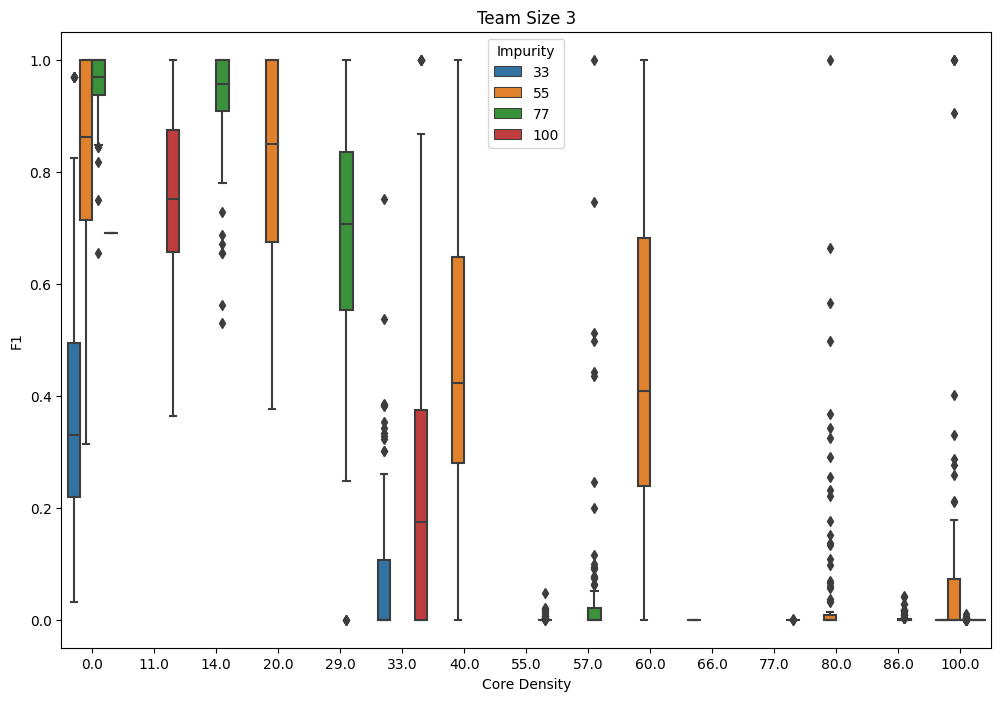

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='F1', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 3')

# Show the plot
plt.legend(title='Impurity')
plt.show()


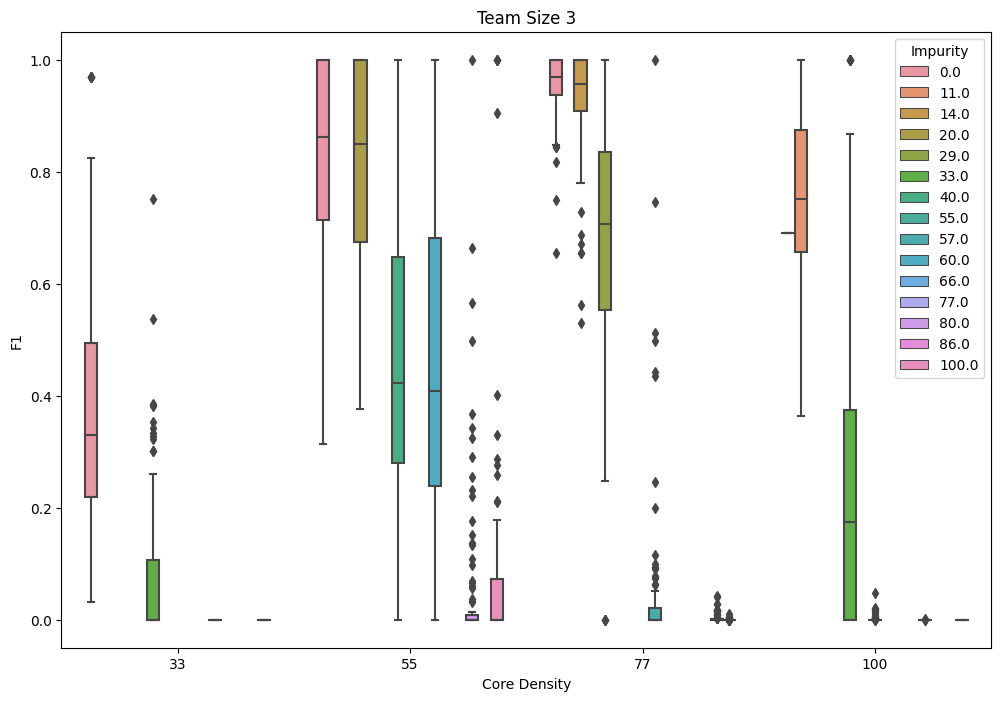

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='F1', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('F1')
plt.title('Team Size 3')

# Show the plot
plt.legend(title='Impurity')
plt.show()


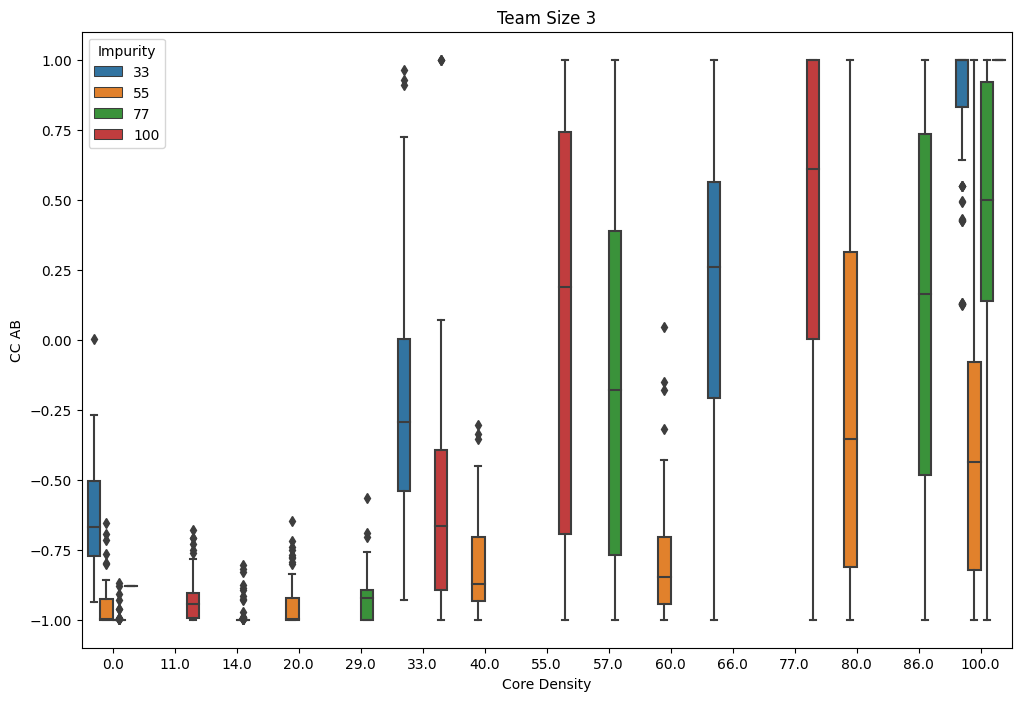

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, hue='Core Density', y='CC AB', x='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 3')

# Show the plot
plt.legend(title='Impurity')
plt.show()


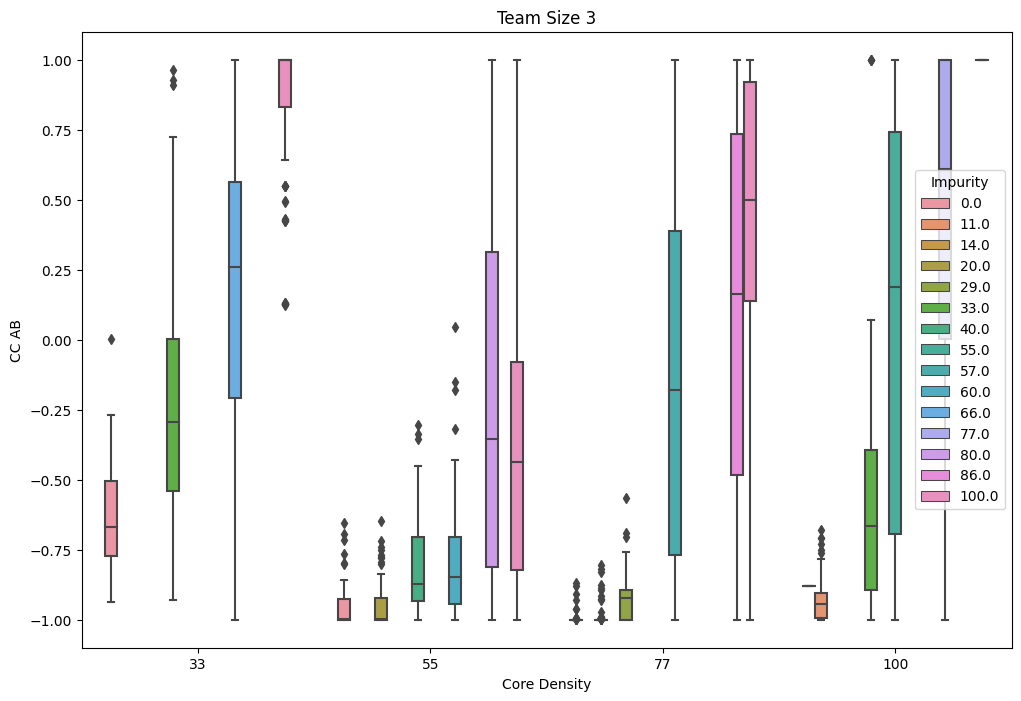

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=melt_table_complete, x='Core Density', y='CC AB', hue='Impurity')

# Add labels and title
plt.xlabel('Core Density')
plt.ylabel('CC AB')
plt.title('Team Size 3')

# Show the plot
plt.legend(title='Impurity')
plt.show()


In [219]:
melt_table_complete.to_csv("team_size3.csv")

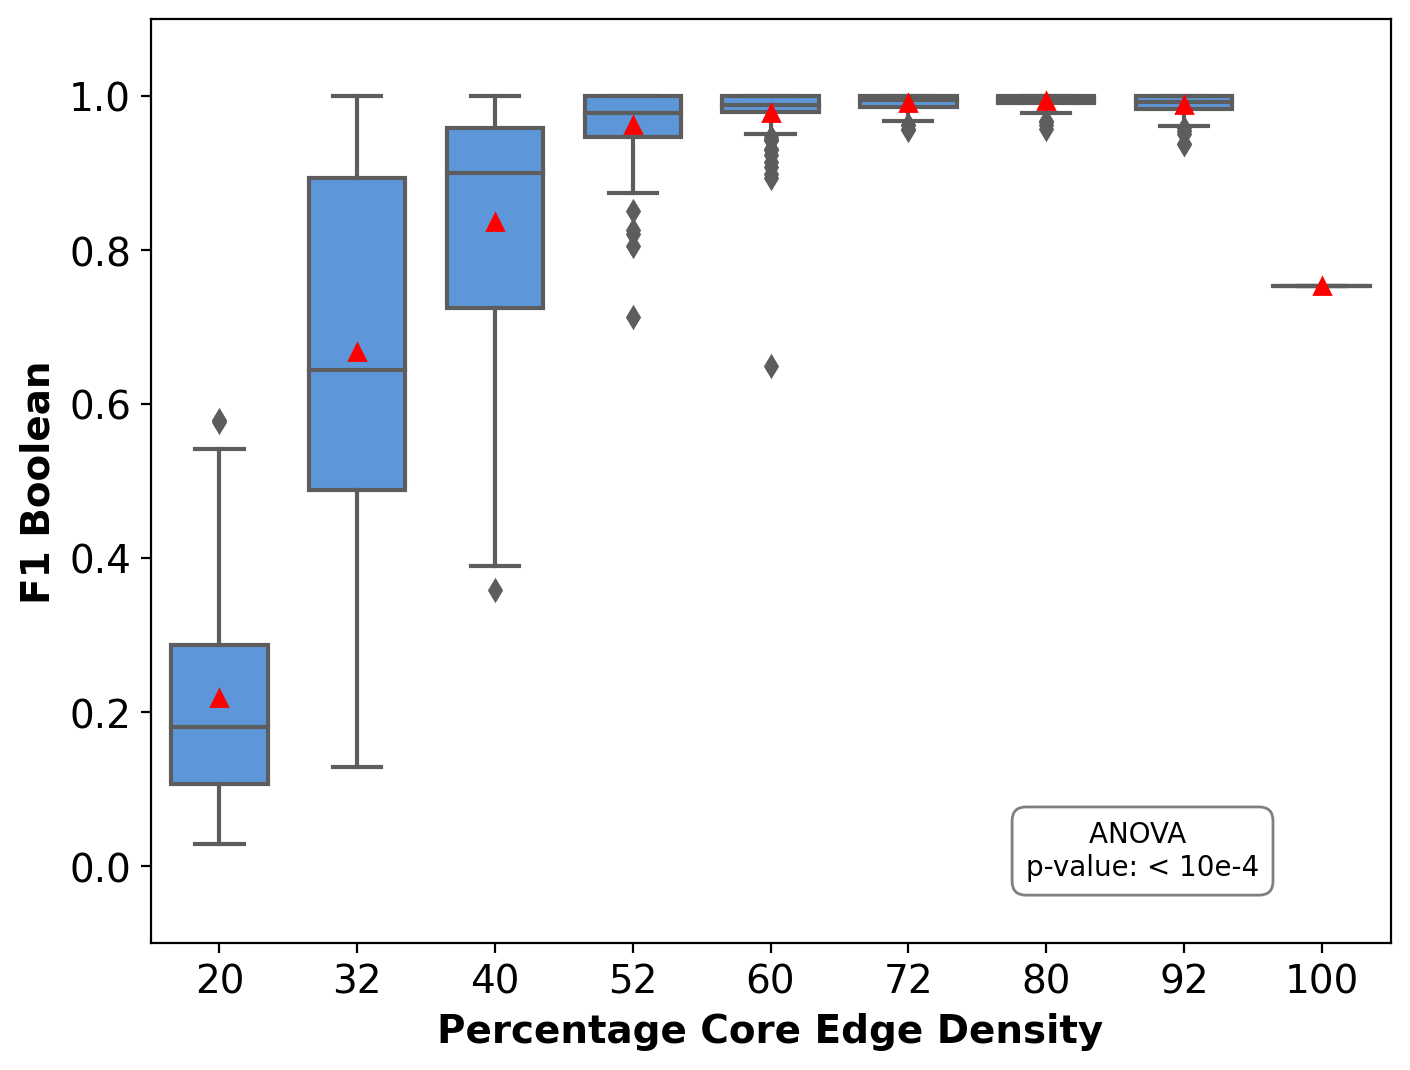

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1',
        x='Core Density',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Density', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Boolean', fontsize=14, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Core Density'] == avg_indegree] for avg_indegree in melt_table_complete['Core Density'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# plt.savefig('F1_Score_vs_Percentage_Core_Density.png')
# Show the plot
plt.show()


In [11]:
def BiC_CC_F1_team_strength_Boolean(folder, TS1 , TS2 , filee ,density,  n_files ,
                            TS1_nodes, TS2_nodes , Self_act_status,Impurity ):
    print(folder)

    global melt_table_complete

    Corr_list = []
    F1_list = []
    TS_list_core = []
    indices = []
    team_size = []
    counts_of_self_act = []
    cols = ['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size','Number_of_Self_Activations','Self Activation Status','Impurity']

    temp_table_complete=pd.DataFrame([[0]*len(cols)]*n_files)
    temp_table_complete.columns = cols
    
    temp_table_complete.loc[:,'Core Density']=density
    temp_table_complete.loc[:,'Impurity']=Impurity
    temp_table_complete.loc[:,'Self Activation Status']=Self_act_status



    for i in range(0, n_files):
        print(i)


        # soln_file = folder+ '/'+ filee  + str(i) + '_solution.dat'
        topo_file =  folder+ '/'+filee+  str(i) +'.topo'
        # Density_20_Network_10N_core

        dataframe = Boolean_file_import(topo_file)

        dataframe = average_finder(dataframe, TS1_nodes, TS2_nodes, TS1,TS2)

        Corr_list.append(stats.spearmanr(dataframe.loc[:,TS1], dataframe.loc[:,TS2])[0])

        F1_list.append( f1_score_new_any_dimension_threshold_toggle_switch_optimized_boolean(dataframe, TS1,TS2 ))
        indices.append(str(density)+ '_'+Self_act_status+'_'+'Network'+ '_' + str(i))
        topo_dataframe = pd.read_csv(topo_file, sep = '\t')
        # influ=influence(pd.read_csv(topo_file, sep = '\t'), 1,10)
        # Core_A, Core_B =  TS1_nodes, TS2_nodes
        # TS_list_core.append(Team_Strength_finder(influ, Core_A, Core_B))
        team_size.append(len(TS1_nodes))
        # counts_of_self_act.append(self_act_counted(topo_dataframe))


    temp_table_complete.loc[:,'CC AB']= Corr_list
    temp_table_complete.loc[:,'F1']=F1_list

    # temp_table_complete.loc[:,'Team_Strength']=TS_list_core
    temp_table_complete.loc[:,'index']=indices
    # temp_table_complete.loc[:,'Team Size']= team_size
    # temp_table_complete.loc[:,'Number_of_Self_Activations']= counts_of_self_act




    melt_table_complete=pd.concat([melt_table_complete, temp_table_complete])


    
    return melt_table_complete





In [13]:
melt_table_complete=pd.DataFrame(columns=['index','Type','Core Density','CC AB','F1','Team_Strength',
                                 'Team Size','Number_of_Self_Activations','Self Activation Status','Impurity'])
melt_table_complete

Empty DataFrame
Columns: [index, Type, Core Density, CC AB, F1, Team_Strength, Team Size, Number_of_Self_Activations, Self Activation Status, Impurity]
Index: []

In [14]:
BiC_CC_F1_team_strength_Boolean('Team_Size_5/all_100', ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"] , '5_missing=15_copy_' ,100,  100 ,
                            'Average_00_01_02_03_04' , 'Average_05_06_07_08_09'  , "With Self Activation" , 0 )

Team_Size_5/all_100
0


KeyError: 'Average_00_01_02_03_04Average_05_06_07_08_09'

In [69]:
BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 
                                '5_missing=0_copy_' ,100,  1 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 0)


BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 
                                '5_missing=3_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 12)

BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=6_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 24)

BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=9_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 36)

BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=12_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 48)

BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=15_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 60)

BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=18_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 72)


BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=21_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 84)


BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=24_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 96)

BiC_CC_F1_team_strength_Boolean('../../Figure3/Toggle_Switch_impurity/Boolean_All_Run', 'Average_00_01_02_03_04' , 
                                'Average_05_06_07_08_09' , '5_missing=25_copy_' ,100,  100 ,
                           ["N0","N1","N2","N3","N4"], ["N5","N6","N7","N8","N9"], "With Self Activation" , 100)


# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_32_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )


# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_40_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )
# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_52_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )


# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_60_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )
# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_72_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )


# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_80_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )
# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_92_Network_10N_core' ,100,  100 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )


# BiC_CC_F1_team_strength_Boolean('.', 'Average_00_01_02_03_04' , 'Average_05_06_07_08_09' , 'Density_100_Network_10N_core' ,100,  1 ,
#                            ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"], "With Self Activation" )



../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

95
96
97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

91
92
93
94
95
96
97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

95
96
97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11
12


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/3197877798.py:50: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

92
93
94
95
96
97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

94
95
96
97
98
99
../../Figure3/Toggle_Switch_impurity/Boolean_All_Run
0
1
2
3
4
5
6
7
8
9
10
11
12


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

89
90
91
92
93
94
95
96
97
98
99


/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,Team1_Nodes + Team2_Nodes] = dataframe.loc[:,Team1_Nodes + Team2_Nodes].astype(int)
/tmp/ipykernel_80385/984631154.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:,'frequency'] =dataframe.loc[:,'frequency'].astype(int)
/tmp/ipykernel_80385/984631154.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

index Type Core Density     CC AB        F1  \
0    100_With Self Activation_Network_0    0          100  0.946917  0.752667   
0    100_With Self Activation_Network_0    0          100 -0.019793  0.949760   
1    100_With Self Activation_Network_1    0          100  0.693276  0.921507   
2    100_With Self Activation_Network_2    0          100 -1.000000  1.000000   
3    100_With Self Activation_Network_3    0          100 -0.800000  0.985570   
..                                  ...  ...          ...       ...       ...   
95  100_With Self Activation_Network_95    0          100  1.000000  0.000000   
96  100_With Self Activation_Network_96    0          100  1.000000  0.000000   
97  100_With Self Activation_Network_97    0          100  1.000000  0.000000   
98  100_With Self Activation_Network_98    0          100  1.000000  0.000000   
99  100_With Self Activation_Network_99    0          100  1.000000  0.000000   

   Team_Strength Team Size Number_of_Self_Activations Self Activation Status  \
0              0         0                          0   With Self Activation   
0              0         0                          0   With Self Activation   
1              0         0                          0   With Self Activation   
2              0         0                          0   With Self Activation   
3              0         0                          0   With Self Activation   
..           ...       ...                        ...                    ...   
95             0         0                          0   With Self Activation   
96             0         0                          0   With Self Activation   
97             0         0                          0   With Self Activation   
98             0         0                          0   With Self Activation   
99             0         0                          0   With Self Activation   

   Impurity  
0         0  
0        12  
1        12  
2        12  
3        12  
..      ...  
95      100  
96      100  
97      100  
98      100  
99      100  

[901 rows x 10 columns]

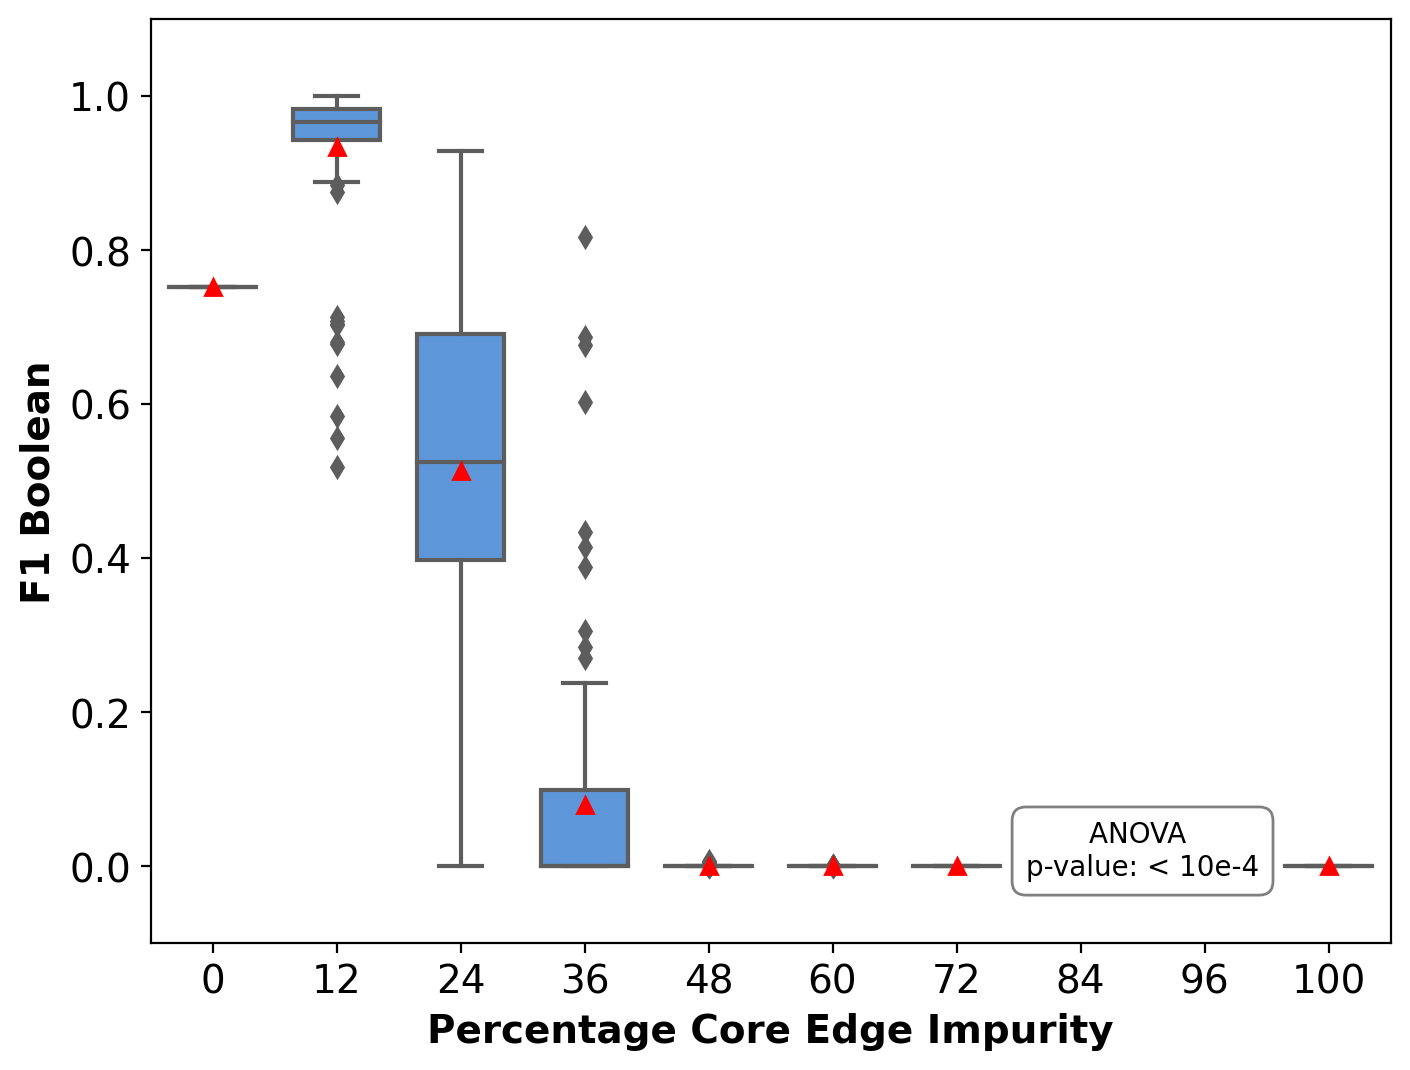

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=200)
plt.ylim(0, -1.04)

# Plot the boxplot
with sns.plotting_context("notebook"):
    ax = sns.boxplot(
        y='F1',
        x='Impurity',
        data=melt_table_complete,
        width=0.7,
        showmeans=True,
    color='#4895EF',
    meanprops={ "markerfacecolor":"red", "markeredgecolor":"red"} 
    )

    # plt.title('F1 Boolean vs Average Outdegree per code Node (Teamed Toggle Switch Embedded)')
    plt.xlabel('Percentage Core Edge Impurity', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Boolean', fontsize=14, fontweight='bold')
    # plt.axhline(y=0.79, linestyle='--', color='#39e75f', label='y=0.55')
    # plt.text(3, 0.73, 'F1 (TSSA)', color='#39e75f', ha='left', va='center', fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.1, 1.1)

# Perform ANOVA across average indegree per code node
result = stats.f_oneway(*[melt_table_complete['F1'][melt_table_complete['Impurity'] == avg_indegree] for avg_indegree in melt_table_complete['Impurity'].unique()])

# Display the p-value from ANOVA
if result.pvalue < 10**-4:
    plt.text(0.8, 0.1, f'ANOVA \np-value: < 10e-4', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
else:
    plt.text(0.8, 0.1, f'ANOVA \np-value: {result.pvalue:.4f}', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# plt.savefig('F1_Score_vs_Percentage_Core_Density.png')
# Show the plot
plt.show()


In [29]:
def Open_All_State_Split(data,nodes_file_name):
    new_columns = data['states'].str.split('_', expand=True)
    new_columns.columns = np.array(nodes_file_name)
    new_columns = new_columns.astype(int)
    df = pd.concat([data, new_columns], axis=1)
    return df

In [30]:
def combined_results_boolean_runs(topo_file_starter):
    combined_dataframe_list = []

    for i in range(100):
        topo_file =  topo_file_starter + str(i) + '.topo'
        dataframe = Boolean_file_import(topo_file)
        combined_dataframe_list.append(dataframe)

    combined_dataframe = pd.concat(combined_dataframe_list, ignore_index=True)
    grouped_dataframe = combined_dataframe.groupby('states').sum()
    Node_names = grouped_dataframe.columns[5:]
    grouped_dataframe =grouped_dataframe.loc[:,:'time']
    grouped_dataframe.loc[:,'states'] = grouped_dataframe.index
    grouped_dataframe = Open_All_State_Split(grouped_dataframe, Node_names )
    grouped_dataframe.loc[:,'N00':] = grouped_dataframe.loc[:,'N00':].astype(int)
    return grouped_dataframe

In [31]:
def team_score_finder(dataframe, Team1_Nodes, Team2_Nodes,Team1_Name,Team2_Name):
    dataframe.loc[:,Team1_Name] = dataframe.loc[:,Team1_Nodes].sum(axis=1)
    dataframe.loc[:,Team2_Name] = dataframe.loc[:,Team2_Nodes].sum(axis=1)
    return dataframe



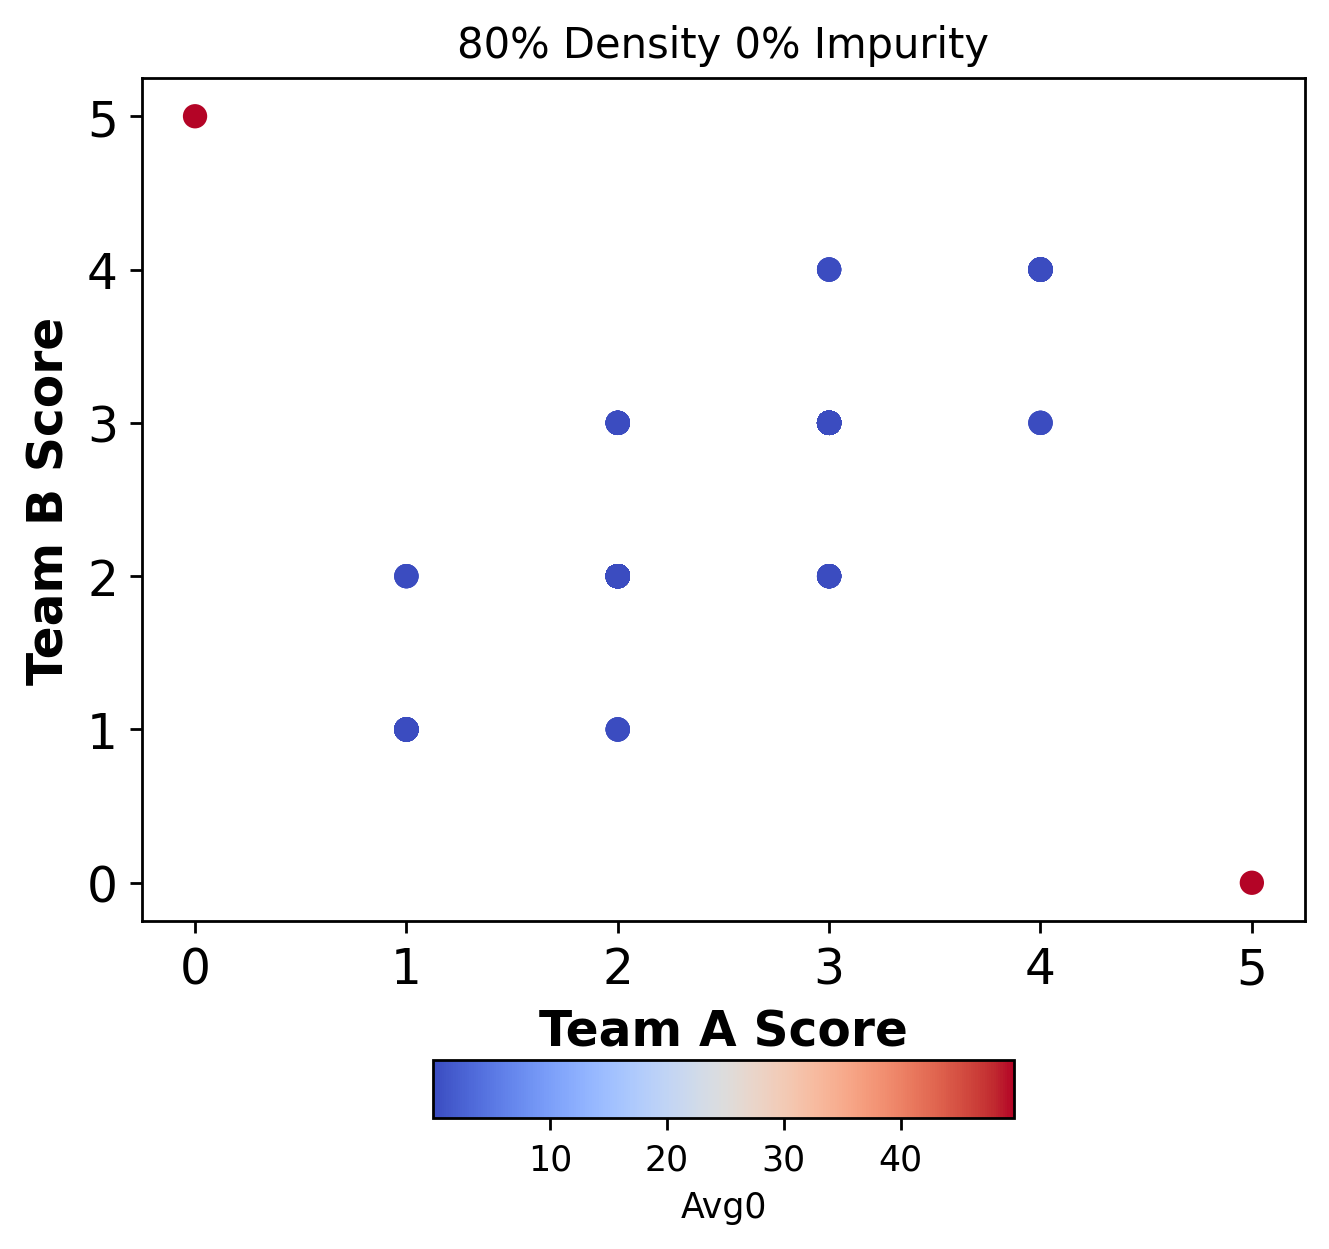

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = combined_results_boolean_runs('all_80/Density_80_Network_10N_core')
df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
spearman_corr = round(spearman_corr, 2)
p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


plt.figure(figsize=(6, 6), dpi=250)

plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#                 verticalalignment='top', bbox=props)



plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


plt.title('80% Density 0% Impurity')
plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


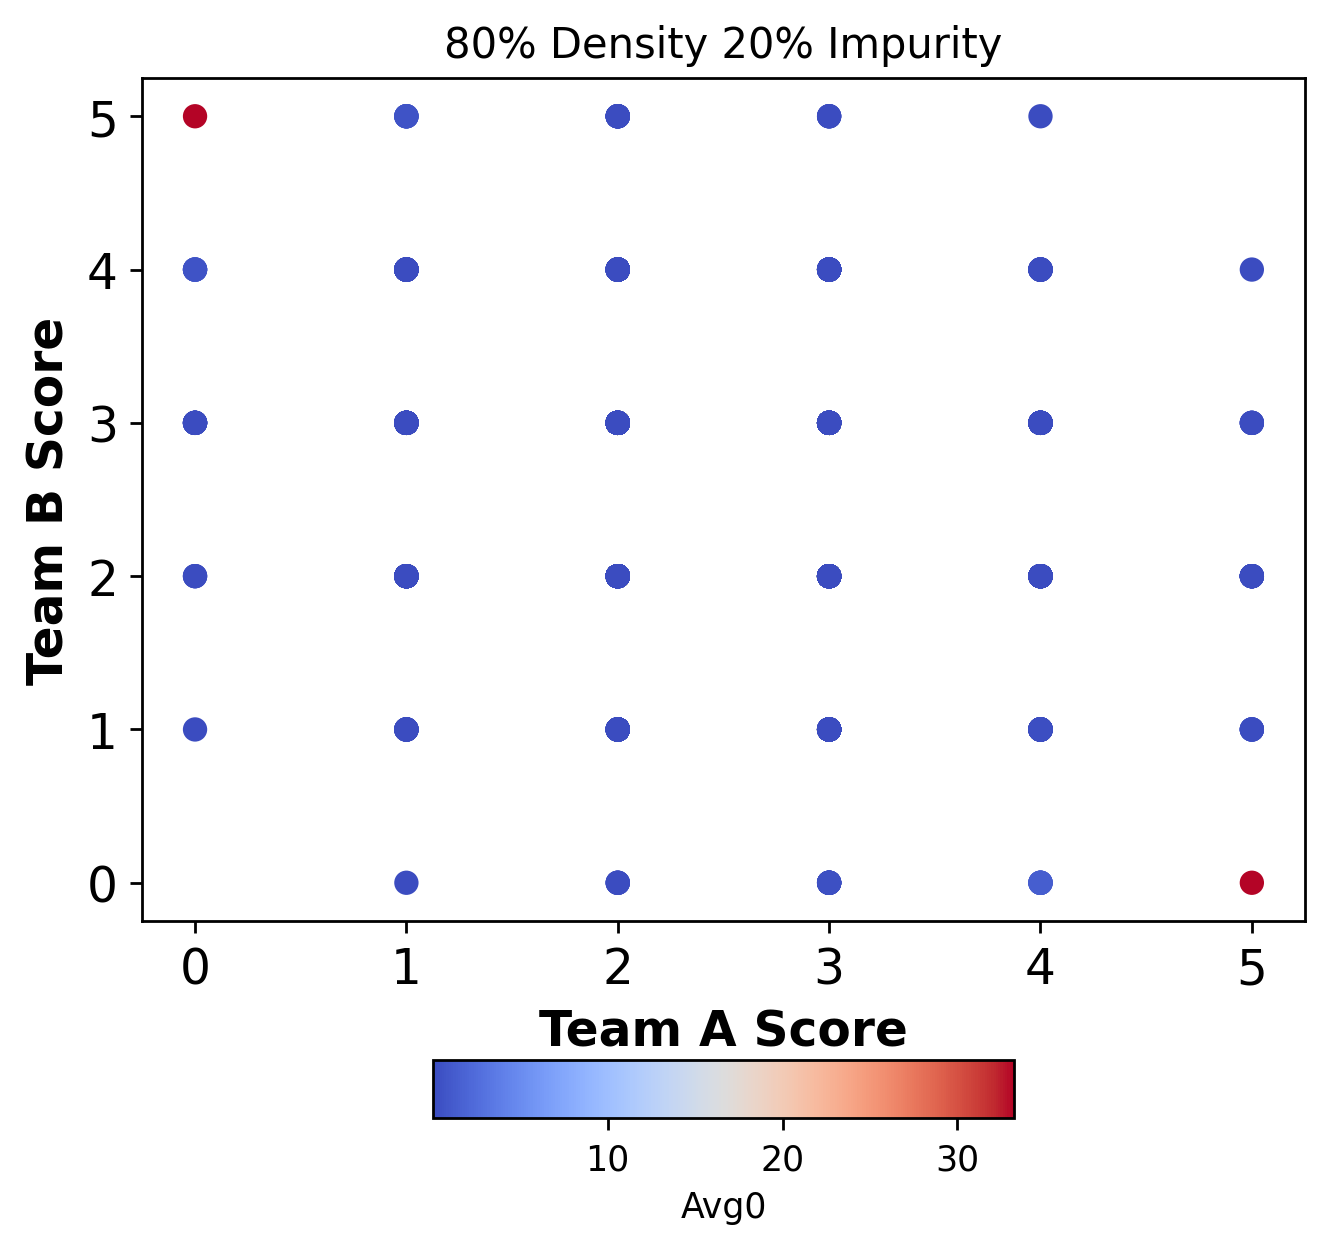

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = combined_results_boolean_runs('all_80/TS_80_Avg_Density_20_impurity_Network_10N_core')
df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
spearman_corr = round(spearman_corr, 2)
p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


plt.figure(figsize=(6, 6), dpi=250)

plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#                 verticalalignment='top', bbox=props)



plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


plt.title('80% Density 20% Impurity')
plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


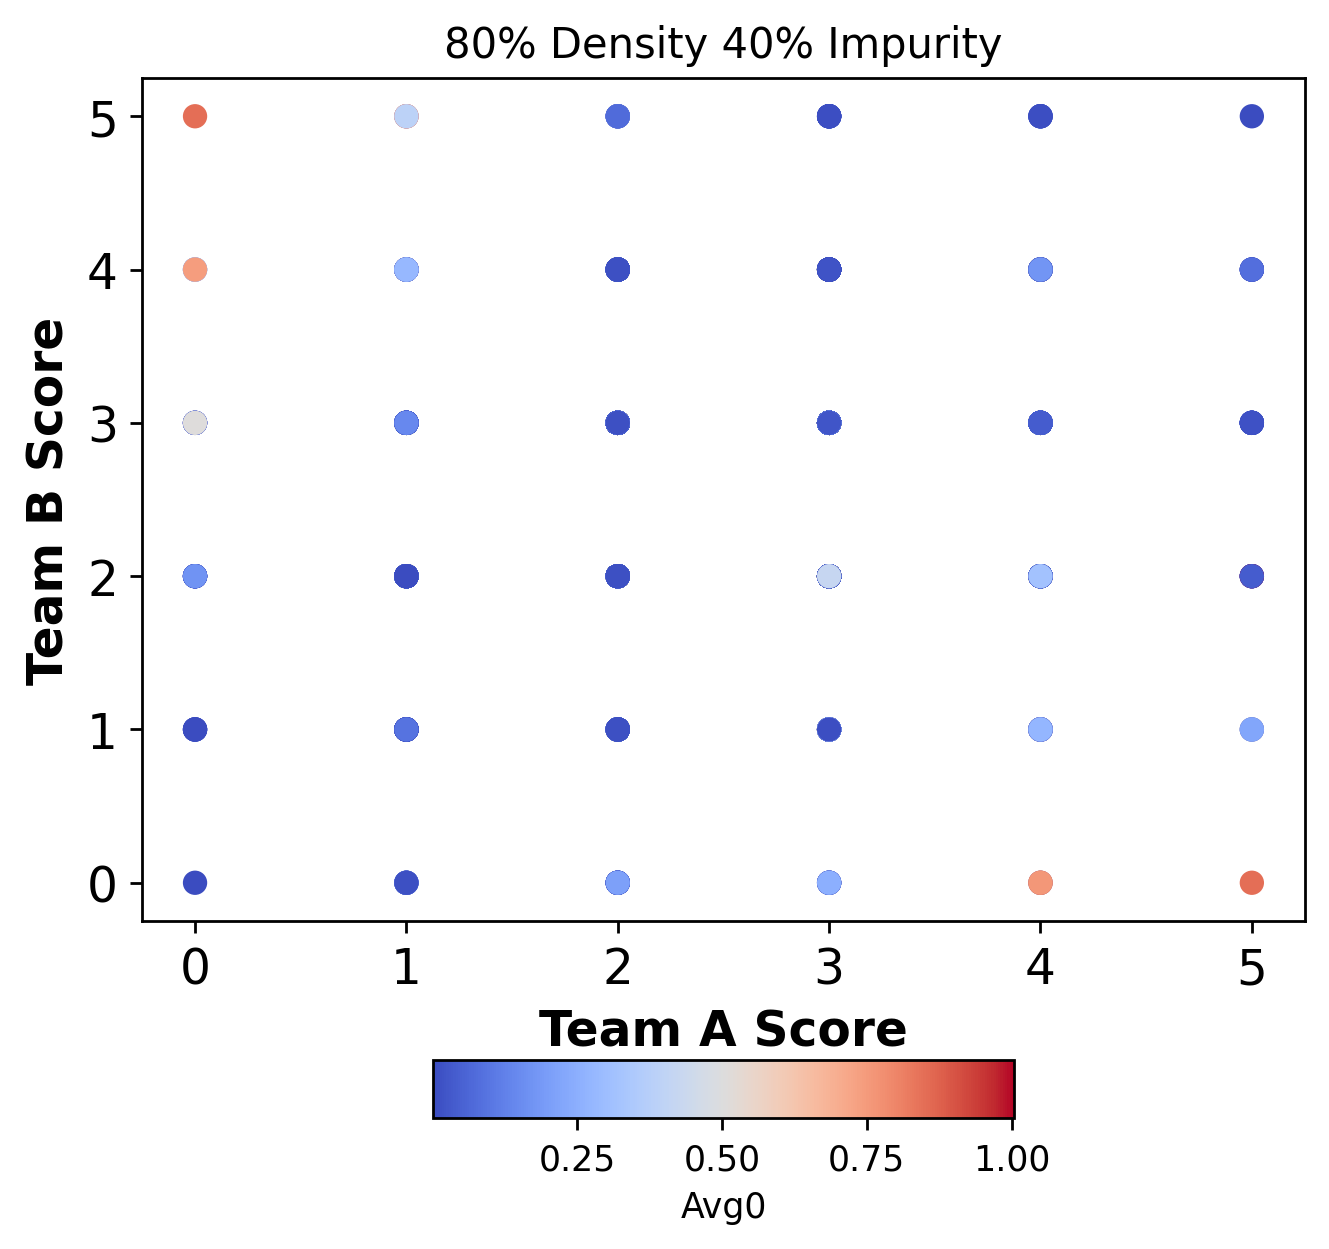

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = combined_results_boolean_runs('all_80/TS_80_Avg_Density_40_impurity_Network_10N_core')
df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
spearman_corr = round(spearman_corr, 2)
p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


plt.figure(figsize=(6, 6), dpi=250)

plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#                 verticalalignment='top', bbox=props)



plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


plt.title('80% Density 40% Impurity')
plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


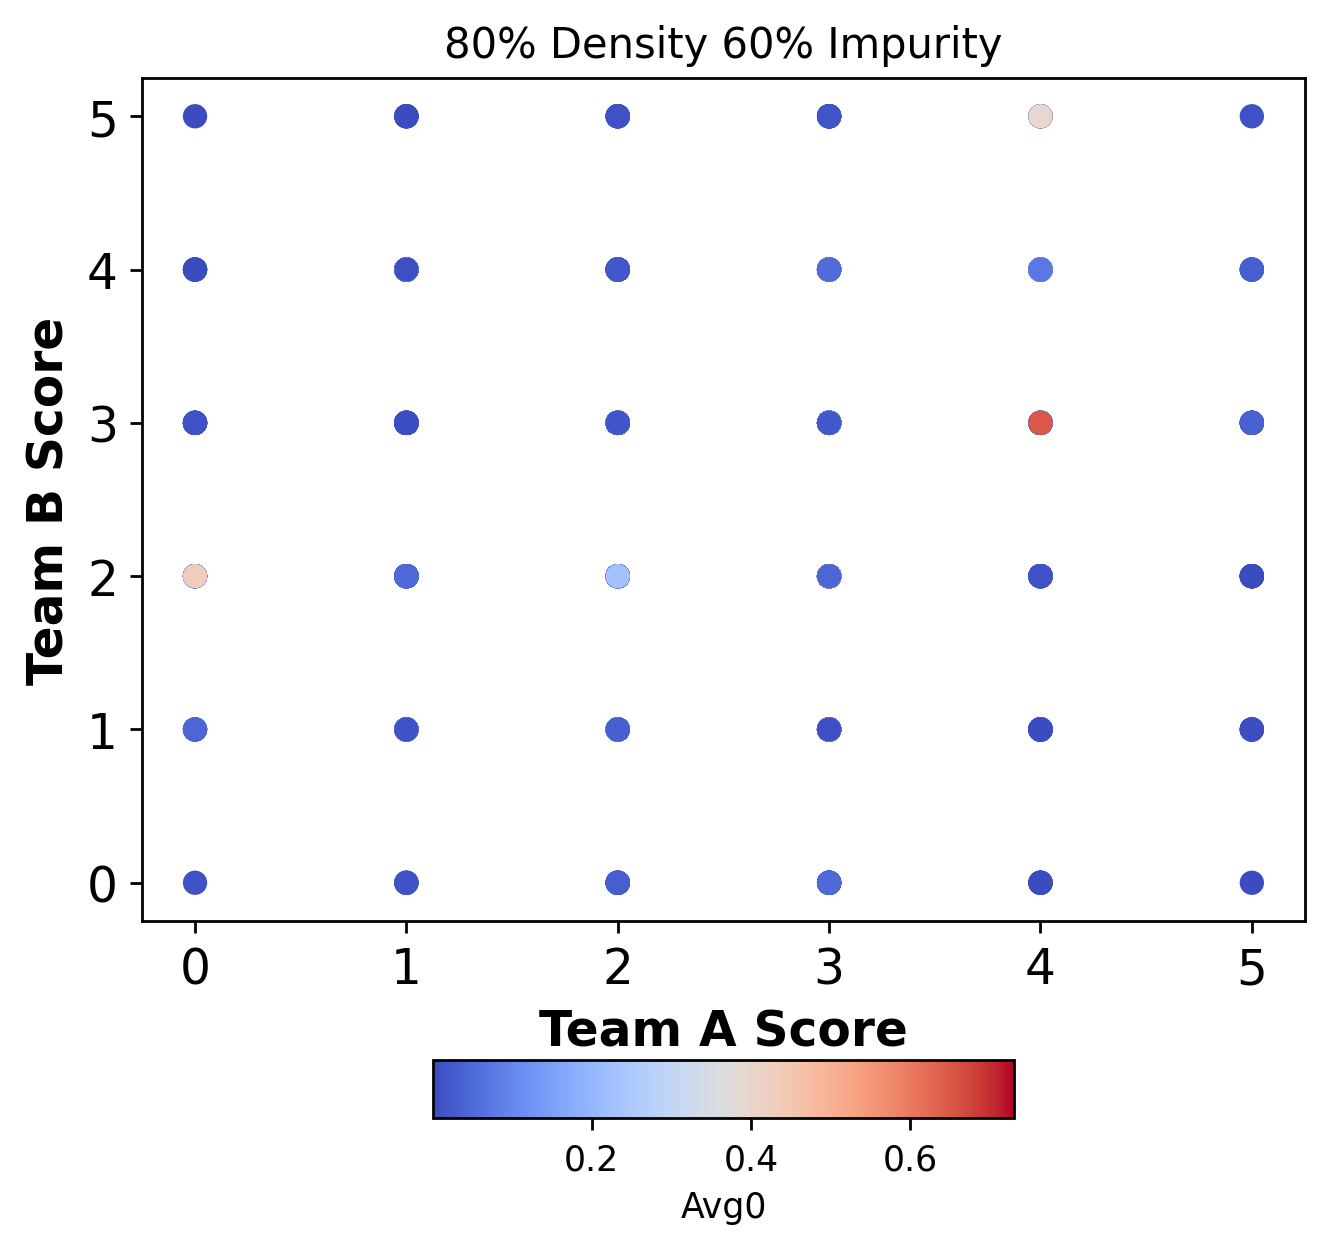

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = combined_results_boolean_runs('all_80/TS_80_Avg_Density_60_impurity_Network_10N_core')
df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
spearman_corr = round(spearman_corr, 2)
p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


plt.figure(figsize=(6, 6), dpi=250)

plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#                 verticalalignment='top', bbox=props)



plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


plt.title('80% Density 60% Impurity')
plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


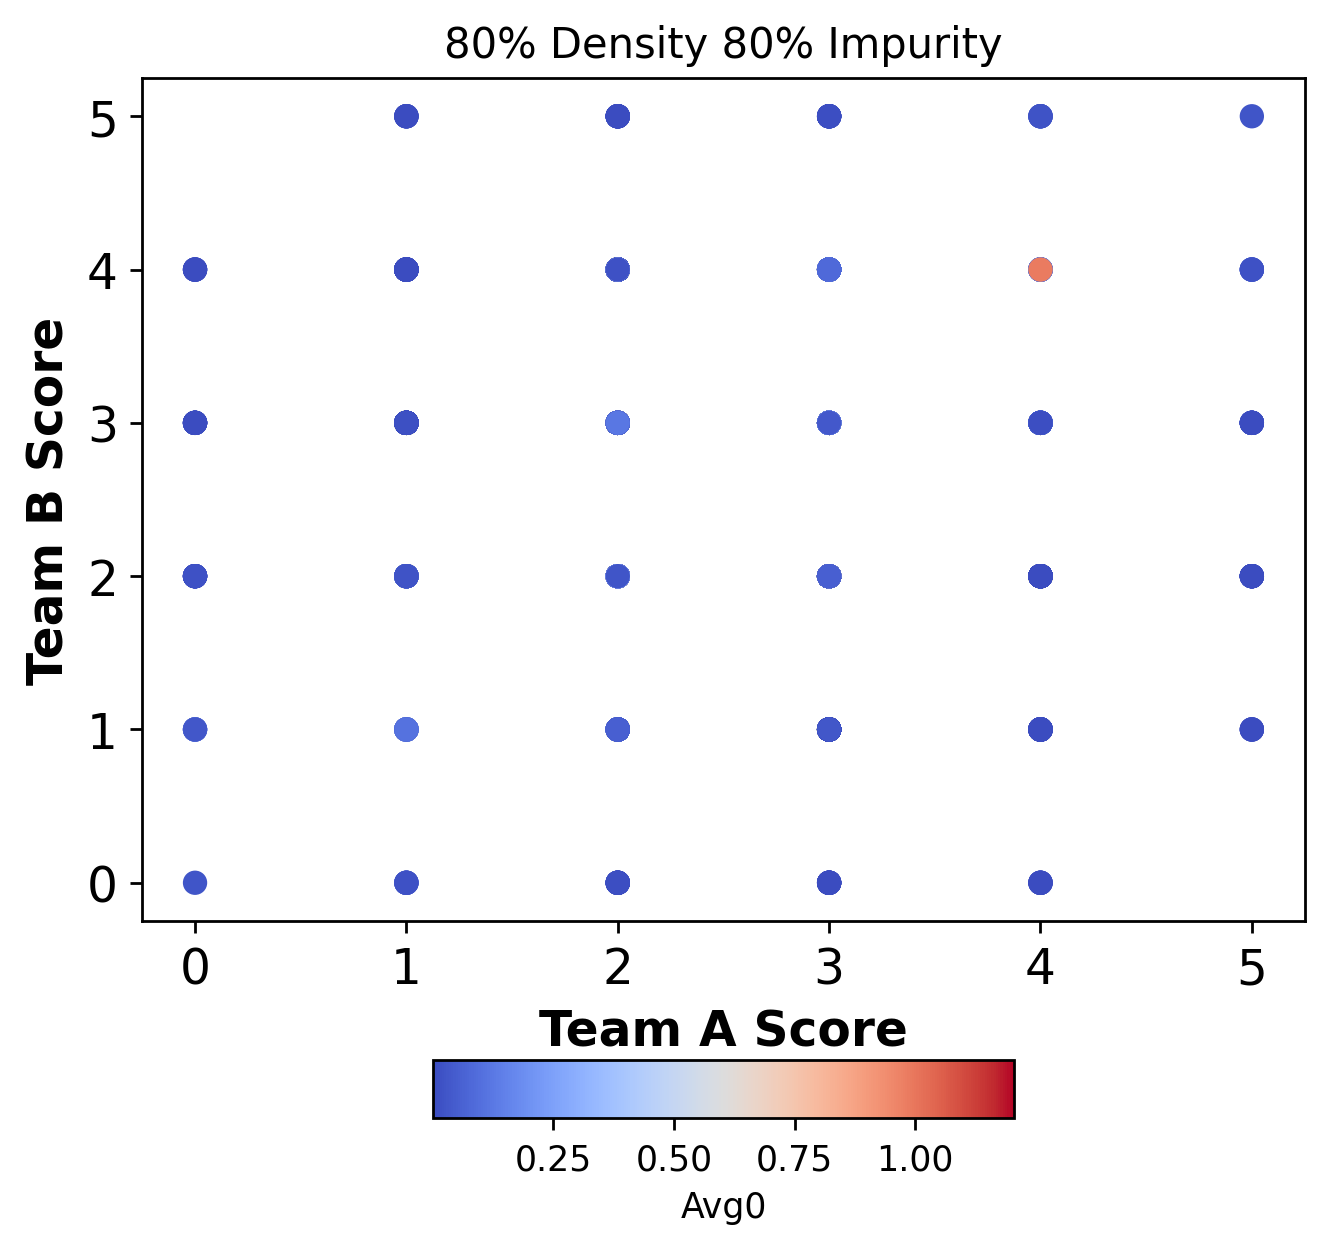

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = combined_results_boolean_runs('all_80/TS_80_Avg_Density_80_impurity_Network_10N_core')
df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
spearman_corr = round(spearman_corr, 2)
p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


plt.figure(figsize=(6, 6), dpi=250)

plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#                 verticalalignment='top', bbox=props)



plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


plt.title('80% Density 80% Impurity')
plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


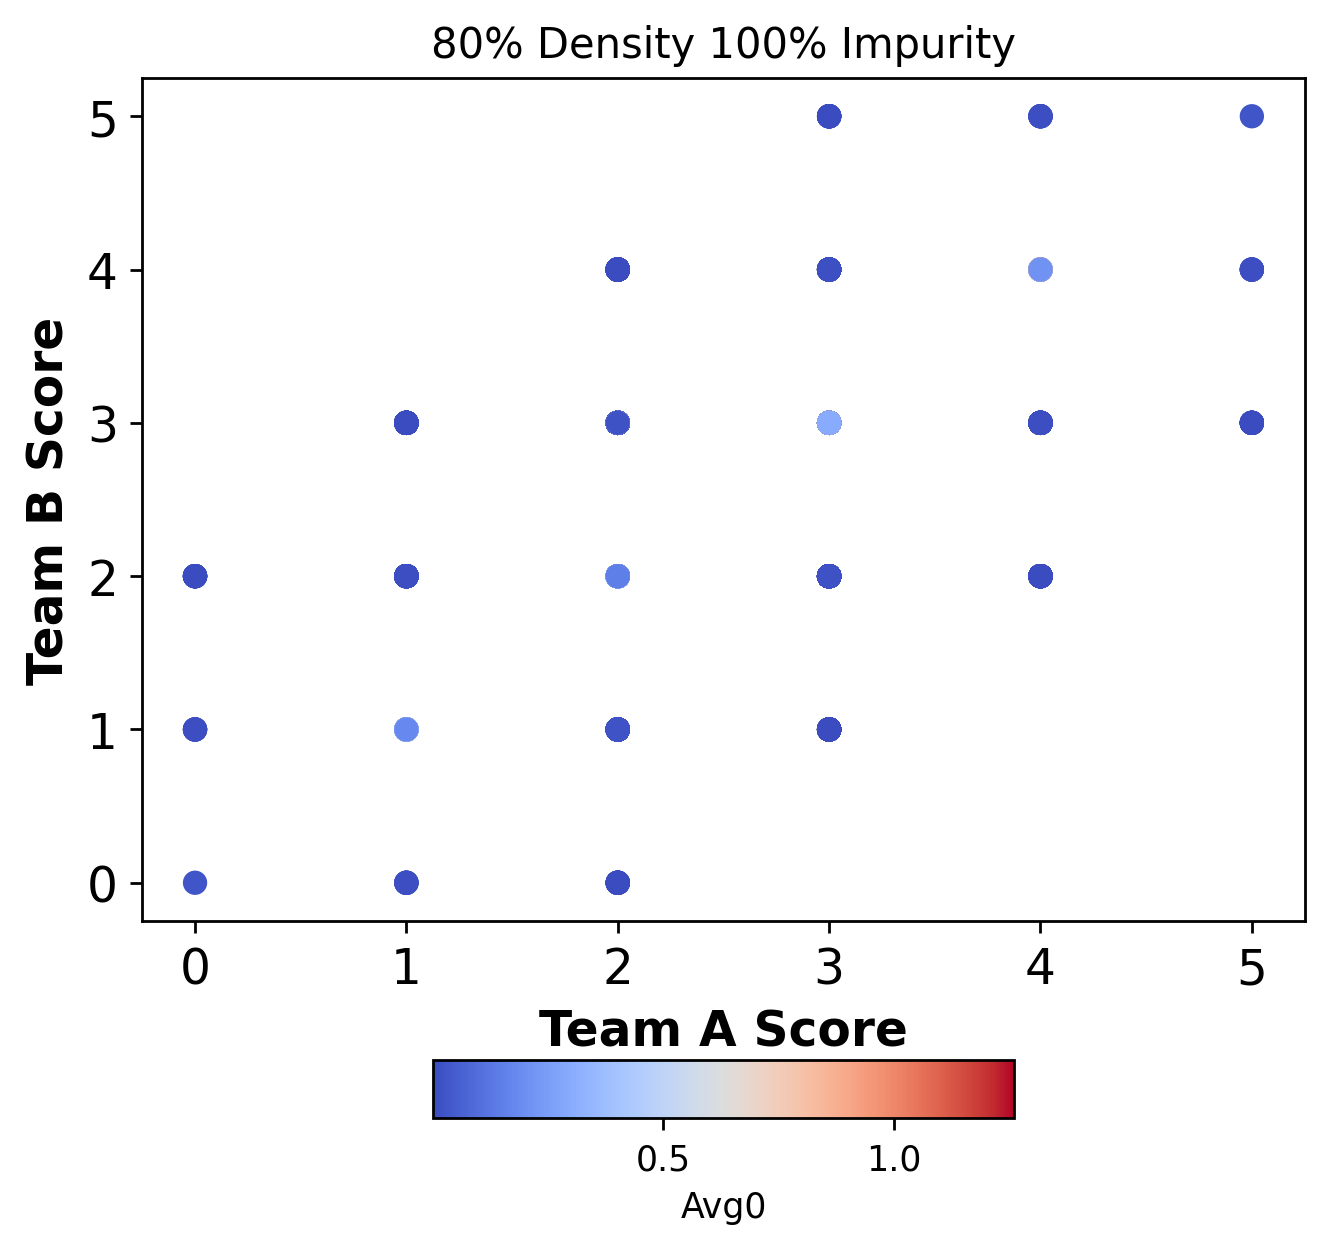

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = combined_results_boolean_runs('all_80/TS_80_Avg_Density_100_impurity_Network_10N_core')
df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
spearman_corr = round(spearman_corr, 2)
p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


plt.figure(figsize=(6, 6), dpi=250)

plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
#                 verticalalignment='top', bbox=props)



plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


plt.title('80% Density 100% Impurity')
plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


In [39]:
df

flag      Avg0       SD0   frust0     time  \
states                                                            
0_0_0_0_0_0_0_0_0_0     0  0.026400  0.002606  35.0000  70070.0   
0_0_0_0_0_0_0_0_0_1     0  0.008990  0.000914  26.5000  51051.0   
0_0_0_0_0_0_0_0_1_0     0  0.007247  0.001107  26.2875  51051.0   
0_0_0_0_0_0_0_0_1_1     0  0.000067  0.000024   2.8500   5005.0   
0_0_0_0_0_0_0_1_0_0     0  0.011243  0.001229  28.2375  55055.0   
...                   ...       ...       ...      ...      ...   
1_1_1_1_1_1_1_0_1_1     0  0.011250  0.001527  29.3875  57057.0   
1_1_1_1_1_1_1_1_0_0     0  0.000070  0.000042   2.2625   4004.0   
1_1_1_1_1_1_1_1_0_1     0  0.007397  0.000997  27.3500  53053.0   
1_1_1_1_1_1_1_1_1_0     0  0.008920  0.000981  27.0750  52052.0   
1_1_1_1_1_1_1_1_1_1     0  0.026953  0.002379  35.0000  70070.0   

                                  states  N00  N01  N02  N03  N04  N05  N06  \
states                                                                        
0_0_0_0_0_0_0_0_0_0  0_0_0_0_0_0_0_0_0_0    0    0    0    0    0    0    0   
0_0_0_0_0_0_0_0_0_1  0_0_0_0_0_0_0_0_0_1    0    0    0    0    0    0    0   
0_0_0_0_0_0_0_0_1_0  0_0_0_0_0_0_0_0_1_0    0    0    0    0    0    0    0   
0_0_0_0_0_0_0_0_1_1  0_0_0_0_0_0_0_0_1_1    0    0    0    0    0    0    0   
0_0_0_0_0_0_0_1_0_0  0_0_0_0_0_0_0_1_0_0    0    0    0    0    0    0    0   
...                                  ...  ...  ...  ...  ...  ...  ...  ...   
1_1_1_1_1_1_1_0_1_1  1_1_1_1_1_1_1_0_1_1    1    1    1    1    1    1    1   
1_1_1_1_1_1_1_1_0_0  1_1_1_1_1_1_1_1_0_0    1    1    1    1    1    1    1   
1_1_1_1_1_1_1_1_0_1  1_1_1_1_1_1_1_1_0_1    1    1    1    1    1    1    1   
1_1_1_1_1_1_1_1_1_0  1_1_1_1_1_1_1_1_1_0    1    1    1    1    1    1    1   
1_1_1_1_1_1_1_1_1_1  1_1_1_1_1_1_1_1_1_1    1    1    1    1    1    1    1   

                     N07  N08  N09  Team A Score  Team B Score  
states                                                          
0_0_0_0_0_0_0_0_0_0    0    0    0             0             0  
0_0_0_0_0_0_0_0_0_1    0    0    1             0             1  
0_0_0_0_0_0_0_0_1_0    0    1    0             0             1  
0_0_0_0_0_0_0_0_1_1    0    1    1             0             2  
0_0_0_0_0_0_0_1_0_0    1    0    0             0             1  
...                  ...  ...  ...           ...           ...  
1_1_1_1_1_1_1_0_1_1    0    1    1             5             4  
1_1_1_1_1_1_1_1_0_0    1    0    0             5             3  
1_1_1_1_1_1_1_1_0_1    1    0    1             5             4  
1_1_1_1_1_1_1_1_1_0    1    1    0             5             4  
1_1_1_1_1_1_1_1_1_1    1    1    1             5             5  

[911 rows x 18 columns]

/home/user/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

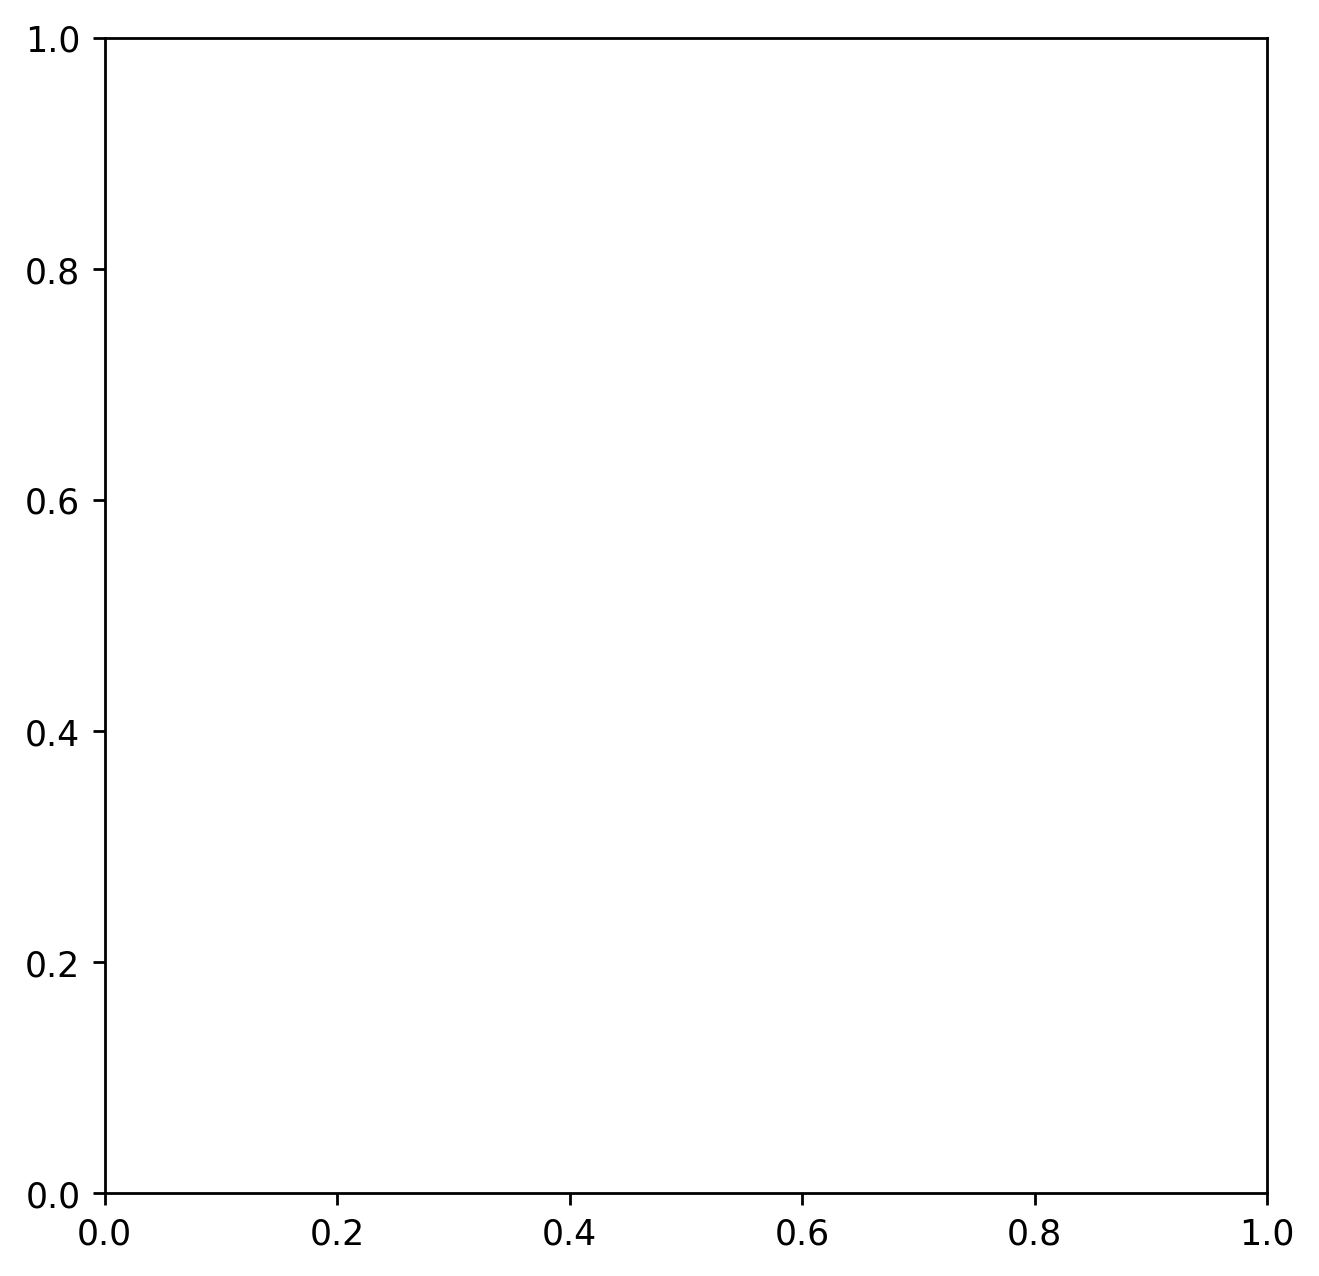

In [40]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# df = combined_results_boolean_runs('all_80/TS_80_Avg_Density_100_impurity_Network_10N_core')
# df = team_score_finder(df, ["N00","N01","N02","N03","N04"], ["N05","N06","N07","N08","N09"],'Team A Score','Team B Score')

# spearman_corr, p_value = spearmanr(df['Team A Score'], df['Team B Score'])
# spearman_corr = round(spearman_corr, 2)
# p_value_text = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"


# plt.figure(figsize=(6, 6), dpi=250)


# x = np.repeat(df['Team A Score'], df['Avg0']*100000)
# y = np.repeat(df['Team B Score'], df['Avg0']*100000)

# # Create KDE plot
# sns.kdeplot(x, y)
# plt.title('KDE Plot')

# # plt.scatter(data=df, x='Team A Score', y='Team B Score', c='Avg0',cmap="coolwarm")
# # textstr = f'Spearman: {spearman_corr}\nP-value: {p_value_text}'
# # props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.8)
# # plt.text(0.1, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
# #                 verticalalignment='top', bbox=props)



# # plt.colorbar( label="Avg0", orientation='horizontal', pad=0.12, aspect=10, shrink=0.5)


# plt.title('80% Density 100% Impurity')
# plt.xlabel('Team A Score', fontsize=14, fontweight='bold')
# plt.ylabel('Team B Score', fontsize=14, fontweight='bold')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.show()
